# Покупка коров для фермы "Вольный луг"

В распоряжении три датасета:
- ferma_main.csv — данные о стаде фермера на текущий момент;
- ferma_dad.csv — имя папы каждой коровы в стаде фермера;
- cow_buy.csv — данные о коровах "ЭкоФермы", которых фермер хочет изучить перед покупкой.

Бизнес-запрос:

Помочь фермеру сделать правильный выбор и купить коров, которые принесут максимальную выгоду. Молоко у коров должно быть вкусным, а удой не менее 6000 килограммов молока в год. Вкус молока оценивается по личным критериям фермера, поэтому в датасете ferma_main.csv есть признак "Вкус молока".

Цель проекта:
- Разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке.
- Модель должна предсказывать удой и вкус молока коров, которых фермер хочет купить.

Ход проекта:

Необходимые данные в датасетах ferma_main.csv, ferma_dad.csv и cow_buy.csv. О состоянии и качестве данных ничего не известно, поэтому сначала нужно прочитать файлы с помощью Pandas и изучить общую информацию.

Предобработка данных:
- Если будут проблемы с наименованием столбцов, то их нужно переименовать, чтобы привести к удобным и читаемым названиям.
- Проверить на явные дубликаты и если такие имеются, то удалить.
- Проверить на наличие пропусков и обработать их.
- Если будет необходимость, то исправить типы данных
- Обработать неявные дубликаты.
- Для удобного анализа в дальнейшем - добавить необходимые столбцы.

Исследовательский анализ данных:
- Провести статистический анализ всех признаков.
- Построить графики для каждого признака.
- Сделать выводы о данных и описать как их улучшить.

Корреляционный анализ признаков в датасете ferma_main.csv:
- Изучить взаимосвязь между признаками: рассчитать коэффициенты корреляции между всеми признаками.
- Построить диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков.
- Определить тип взаимосвязи между целевым и входными признаками.
- Изучить нелинейные связи между целевым и входными признаками и решить, нужно ли вводить в модель дополнительные признаки, чтобы это учесть.
- Наблюдается ли мультиколлинеарность между входными признаками?

Обучить модель линейной регрессии:
- Подготовить данные датасета ferma_main.csv и обучить на них первую модель LinearRegression.
- Подготовить данные с учётом связи входных признаков с целевым и обучить на них вторую модель LinearRegression.
- Добавить в данные новый признак и обучить на них третью модель LinearRegression.
- Сравнить качество трёх моделей линейной регрессии.
- С помощью лучшей модели спрогнозировать удой коров, которых фермер хочет купить.

Обучить модель логистической регрессии:
- Подготовить данные датасета ferma_main.csv и обучить на них модель LogisticRegression.
- Проанализировать модель логистической регрессии.
- С помощью обученной модели спрогнозировать вкус молока коров, которых фермер хочет купить.

Итоговые выводы:
- Добавить прогнозы вкуса молока и удоя коров "ЭкоФермы" в датафрейм с коровами, покупку которых рассматривает фермер.
- Отобрать коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.
- Сделать выводы о моделях линейной регрессии и логистической регрессии.

## Загрузка и изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [2]:
farm_main_data = pd.read_csv('datasets/ferma_main.csv', sep=';')
farm_dad_data = pd.read_csv('datasets/ferma_dad.csv', sep=';')
cow_buy_data = pd.read_csv('datasets/cow_buy.csv', sep=';')

Первые строки каждого датасета и общая информация о них.

In [3]:
farm_main_data.head()

id  Удой, кг ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                  14,2              1743   
1   2      5529                                  12,8              2138   
2   3      5810                                    14              1854   
3   4      5895                                  12,4              2012   
4   5      5302                                  12,8              1675   

  СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0,89   Вис Бик Айдиал    Равнинное   
1                                 0,89   Вис Бик Айдиал    Равнинные   
2                                0,885  РефлешнСоверинг    Холмистое   
3                                0,885  РефлешнСоверинг    Холмистое   
4                                0,885   Вис Бик Айдиал    Равнинные   

  порода папы_быка Жирность,% Белок,% Вкус молока      Возраст  
0           Айдиал       3,58   3,076      вкусно  более_2_лет  
1          Соверин       3,54   3,079      вкусно  менее_2_лет  
2          Соверин       3,59   3,074   не вкусно  более_2_лет  
3           Айдиал        3,4   3,075   не вкусно  более_2_лет  
4          Соверин       3,73   3,073      вкусно  менее_2_лет

In [4]:
farm_main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [5]:
farm_dad_data.head()

id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

In [6]:
farm_dad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [7]:
cow_buy_data.head()

Порода Тип пастбища порода папы_быка  Имя_папы Текущая_жирность,%  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес               3,58   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный               3,54   
2  РефлешнСоверинг    равнинное          Соверин     Барин               3,59   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный                3,4   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный               3,64   

  Текущий_уровень_белок,%      Возраст  
0                   3,076  более_2_лет  
1                   3,081  менее_2_лет  
2                   3,074  более_2_лет  
3                   3,061  более_2_лет  
4                   3,074  более_2_лет

In [8]:
cow_buy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


Датасеты читаются корректно, все необходимые данные загружены.
Названия столбцов в датасетах farm_main_data, farm_dad_data и cow_buy_data требуют изменений, так как они на русском языке и не соответствуют snake_case.
Из общей информации о данных видно, что пропусков нет, но типы данных для некоторых столбцов необходимо исправить.

##  Предобработка данных

### Изменение названий столбцов

In [9]:
farm_main_new_columns = ['id', 'milk_yield_kg', 'energy_feed_unit', 'raw_protein_g', 'sugar_protein_ratio', 'cow_breed', 'pasture_type', 'dad_cow_breed', 'fat_percentage', 'protein_percentage', 'is_milk_tasty', 'over_2_years_old']
farm_dad_new_columns = ['id', 'dad_name']
cow_buy_new_columns = ['cow_breed', 'pasture_type', 'dad_cow_breed', 'dad_name', 'fat_percentage', 'protein_percentage', 'over_2_years_old']

farm_main_data.columns = farm_main_new_columns
farm_dad_data.columns = farm_dad_new_columns
cow_buy_data.columns = cow_buy_new_columns

Нужно проверить, что названия столбцов изменены корректно.

In [10]:
farm_main_data.head()

id  milk_yield_kg energy_feed_unit  raw_protein_g sugar_protein_ratio  \
0   1           5863             14,2           1743                0,89   
1   2           5529             12,8           2138                0,89   
2   3           5810               14           1854               0,885   
3   4           5895             12,4           2012               0,885   
4   5           5302             12,8           1675               0,885   

         cow_breed pasture_type dad_cow_breed fat_percentage  \
0   Вис Бик Айдиал    Равнинное        Айдиал           3,58   
1   Вис Бик Айдиал    Равнинные       Соверин           3,54   
2  РефлешнСоверинг    Холмистое       Соверин           3,59   
3  РефлешнСоверинг    Холмистое        Айдиал            3,4   
4   Вис Бик Айдиал    Равнинные       Соверин           3,73   

  protein_percentage is_milk_tasty over_2_years_old  
0              3,076        вкусно      более_2_лет  
1              3,079        вкусно      менее_2_лет  
2              3,074     не вкусно      более_2_лет  
3              3,075     не вкусно      более_2_лет  
4              3,073        вкусно      менее_2_лет

In [11]:
farm_dad_data.head()

id  dad_name
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

In [12]:
cow_buy_data.head()

cow_breed pasture_type dad_cow_breed  dad_name fat_percentage  \
0   Вис Бик Айдиал    холмистое        Айдиал  Геркулес           3,58   
1   Вис Бик Айдиал    равнинное       Соверин    Буйный           3,54   
2  РефлешнСоверинг    равнинное       Соверин     Барин           3,59   
3  РефлешнСоверинг    холмистое        Айдиал    Буйный            3,4   
4  РефлешнСоверинг    равнинное        Айдиал    Буйный           3,64   

  protein_percentage over_2_years_old  
0              3,076      более_2_лет  
1              3,081      менее_2_лет  
2              3,074      более_2_лет  
3              3,061      более_2_лет  
4              3,074      более_2_лет

Изменения наименований столбцов прошли успешно.

### Изменение типов данных

Изменю тип данных для столбца `over_2_years_old` в датасетах **farm_main_data** и **cow_buy_data** на булевый.

То же самое сделаю для столбца `is_milk_tasty` в датасете **farm_main_data**.

In [13]:
for df in [farm_main_data, cow_buy_data]:
    df['over_2_years_old'] = df['over_2_years_old'].apply(lambda x: True if x == 'более_2_лет' else False)
    if df is farm_main_data:
        df['is_milk_tasty'] = df['is_milk_tasty'].apply(lambda x: True if x == 'вкусно' else False)

Для столбцов `energy_feed_unit`, `raw_protein_g`, `sugar_protein_ratio`, `fat_percentage` и `protein_percentage` в датасете **farm_main_data** изменю тип данных на float.

То же самое сделаю для столбцов `fat_percentage` и `protein_percentage` в датасете **cow_buy_data**.

In [14]:
def convert_columns(dataframe, columns):
    for c in columns:
        if dataframe[c].dtype == 'object':
            dataframe[c] = dataframe[c].str.replace(',', '.').astype('float')

convert_columns(farm_main_data, ['energy_feed_unit', 'raw_protein_g', 'sugar_protein_ratio', 'fat_percentage', 'protein_percentage'])
convert_columns(cow_buy_data, ['fat_percentage', 'protein_percentage'])

Проверю, что типы данных изменены корректно.

In [15]:
farm_main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   634 non-null    int64  
 1   milk_yield_kg        634 non-null    int64  
 2   energy_feed_unit     634 non-null    float64
 3   raw_protein_g        634 non-null    int64  
 4   sugar_protein_ratio  634 non-null    float64
 5   cow_breed            634 non-null    object 
 6   pasture_type         634 non-null    object 
 7   dad_cow_breed        634 non-null    object 
 8   fat_percentage       634 non-null    float64
 9   protein_percentage   634 non-null    float64
 10  is_milk_tasty        634 non-null    bool   
 11  over_2_years_old     634 non-null    bool   
dtypes: bool(2), float64(4), int64(3), object(3)
memory usage: 50.9+ KB


In [16]:
cow_buy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cow_breed           20 non-null     object 
 1   pasture_type        20 non-null     object 
 2   dad_cow_breed       20 non-null     object 
 3   dad_name            20 non-null     object 
 4   fat_percentage      20 non-null     float64
 5   protein_percentage  20 non-null     float64
 6   over_2_years_old    20 non-null     bool   
dtypes: bool(1), float64(2), object(4)
memory usage: 1.1+ KB


Типы данных изменены корректно.

### Объединение датасетов

Объединю датасеты **farm_main_data** и **farm_dad_data** по столбцу `id`. В данном случае нет смысла держать имена пап коров в отдельном датасете.
Тем более, что в датасете **cow_buy_data** есть столбец `dad_name`.

In [17]:
farm_main_data = farm_main_data.merge(farm_dad_data, on='id', how='left')

Проверю, что объединение прошло успешно.

In [18]:
farm_main_data.head()

id  milk_yield_kg  energy_feed_unit  raw_protein_g  sugar_protein_ratio  \
0   1           5863              14.2           1743                0.890   
1   2           5529              12.8           2138                0.890   
2   3           5810              14.0           1854                0.885   
3   4           5895              12.4           2012                0.885   
4   5           5302              12.8           1675                0.885   

         cow_breed pasture_type dad_cow_breed  fat_percentage  \
0   Вис Бик Айдиал    Равнинное        Айдиал            3.58   
1   Вис Бик Айдиал    Равнинные       Соверин            3.54   
2  РефлешнСоверинг    Холмистое       Соверин            3.59   
3  РефлешнСоверинг    Холмистое        Айдиал            3.40   
4   Вис Бик Айдиал    Равнинные       Соверин            3.73   

   protein_percentage  is_milk_tasty  over_2_years_old  dad_name  
0               3.076           True              True    Буйный  
1               3.079           True             False  Соловчик  
2               3.074          False              True     Барин  
3               3.075          False              True    Буйный  
4               3.073           True             False     Барин

In [19]:
farm_main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   634 non-null    int64  
 1   milk_yield_kg        634 non-null    int64  
 2   energy_feed_unit     634 non-null    float64
 3   raw_protein_g        634 non-null    int64  
 4   sugar_protein_ratio  634 non-null    float64
 5   cow_breed            634 non-null    object 
 6   pasture_type         634 non-null    object 
 7   dad_cow_breed        634 non-null    object 
 8   fat_percentage       634 non-null    float64
 9   protein_percentage   634 non-null    float64
 10  is_milk_tasty        634 non-null    bool   
 11  over_2_years_old     634 non-null    bool   
 12  dad_name             634 non-null    object 
dtypes: bool(2), float64(4), int64(3), object(4)
memory usage: 55.9+ KB


Объединение прошло успешно.

### Проверка на дубликаты

Проверю датасеты на наличие явных дубликатов.

In [20]:
print(f"Дубликаты в farm_main_data: {farm_main_data.duplicated().sum()}\nДубликаты в cow_buy_data: {cow_buy_data.duplicated().sum()}")

Дубликаты в farm_main_data: 5
Дубликаты в cow_buy_data: 4


Удалю дубликаты только из датасета **farm_main_data**, так как в датасете **cow_buy_data** они могут быть допустимыми из-за того, что это список коров, которых фермер хочет купить.

In [21]:
farm_main_data = farm_main_data.drop_duplicates().reset_index(drop=True)

Необходимо проверить данные на неявные дубликаты.

Для начала все строковые значения приведу к нижнему регистру.

In [22]:
dataframes = {'farm_main_data': farm_main_data, 'cow_buy_data': cow_buy_data} # Словарь для удобства

for df in dataframes.values():
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.lower()

Проверю на не явные дубликаты, для этого посмотрю на уникальные значения в категориальных столбцах.
Также это поможет найти пропуски, если они закрыты заглушками.

In [23]:
for df_name, df in dataframes.items():
    print(f"Датафрейм: {df_name}")
    for col in df.columns:
        if df[col].dtype == 'object':
            print(f"Уникальные значения в столбце {col}:\n{df[col].unique()}\n")

Датафрейм: farm_main_data
Уникальные значения в столбце cow_breed:
['вис бик айдиал' 'рефлешнсоверинг']

Уникальные значения в столбце pasture_type:
['равнинное' 'равнинные' 'холмистое']

Уникальные значения в столбце dad_cow_breed:
['айдиал' 'соверин' 'айдиалл']

Уникальные значения в столбце dad_name:
['буйный' 'соловчик' 'барин' 'геркулес']

Датафрейм: cow_buy_data
Уникальные значения в столбце cow_breed:
['вис бик айдиал' 'рефлешнсоверинг']

Уникальные значения в столбце pasture_type:
['холмистое' 'равнинное']

Уникальные значения в столбце dad_cow_breed:
['айдиал' 'соверин']

Уникальные значения в столбце dad_name:
['геркулес' 'буйный' 'барин' 'соловчик']



В данных довольно много неявных дубликатов, из-за того, что некоторые названия вводились некорректно и не единообразно.

Соответственно, нужно привести данные к единому виду.

In [24]:
def replace_values(dataframe, column, replacements):
    for key, value in replacements.items():
        dataframe[column] = dataframe[column].str.replace(key, value)
    return dataframe

replacements_breed = {'вис бик айдиал': 'айдиал', 'рефлешнсоверинг': 'соверин', 'айдиалл': 'айдиал'}

farm_main_data = replace_values(farm_main_data, 'cow_breed', replacements_breed)
farm_main_data = replace_values(farm_main_data, 'pasture_type', {'равнинные': 'равнинное'})
farm_main_data = replace_values(farm_main_data, 'dad_cow_breed', replacements_breed)
cow_buy_data = replace_values(cow_buy_data, 'dad_cow_breed', replacements_breed)
cow_buy_data = replace_values(cow_buy_data, 'cow_breed', replacements_breed)

Проверю, что данные приведены к единому виду.

In [25]:
unique_columns_values = []

for df_name, df in dataframes.items():
    print(f"Датафрейм: {df_name}")
    for col in df.columns:
        if df[col].dtype == 'object':
            unique_columns_values.append(df[col].unique())
            print(f"Уникальные значения в столбце {col}:\n{df[col].unique()}\n")

print(f"Уникальные значения в категориальных столбцах из обоих датафреймов:\n{set(np.concatenate(unique_columns_values))}")

Датафрейм: farm_main_data
Уникальные значения в столбце cow_breed:
['айдиал' 'соверин']

Уникальные значения в столбце pasture_type:
['равнинное' 'холмистое']

Уникальные значения в столбце dad_cow_breed:
['айдиал' 'соверин']

Уникальные значения в столбце dad_name:
['буйный' 'соловчик' 'барин' 'геркулес']

Датафрейм: cow_buy_data
Уникальные значения в столбце cow_breed:
['айдиал' 'соверин']

Уникальные значения в столбце pasture_type:
['холмистое' 'равнинное']

Уникальные значения в столбце dad_cow_breed:
['айдиал' 'соверин']

Уникальные значения в столбце dad_name:
['геркулес' 'буйный' 'барин' 'соловчик']

Уникальные значения в категориальных столбцах из обоих датафреймов:
{'буйный', 'холмистое', 'геркулес', 'соловчик', 'равнинное', 'соверин', 'барин', 'айдиал'}


Теперь данные приведены к единому виду.

После нужно опять проверить на явные дубликаты.

In [26]:
print(f"Дубликаты в farm_main_data: {farm_main_data.duplicated().sum()}\nДубликаты в cow_buy_data: {cow_buy_data.duplicated().sum()}")

Дубликаты в farm_main_data: 0
Дубликаты в cow_buy_data: 4


Явные дубликаты остались только в датасете **cow_buy_data**, но оттуда их я удалять опять же не буду, так как это список коров, которых фермер хочет купить.

### Выводы по предобработке данных

- Названия столбцов в датасетах farm_main_data, farm_dad_data и cow_buy_data изменены на более удобные и читаемые.
- Типы данных для столбцов `over_2_years_old` в датасетах farm_main_data и cow_buy_data изменены на булевый.
- Типы данных для столбцов `energy_feed_unit`, `raw_protein_g`, `sugar_protein_ratio`, `fat_percentage` и `protein_percentage` в датасете farm_main_data изменены на float.
- Типы данных для столбцов `fat_percentage` и `protein_percentage` в датасете cow_buy_data изменены на float.
- Датасеты farm_main_data и farm_dad_data объединены по столбцу `id`.
- Удалены явные дубликаты в датасете farm_main_data.
- Все строковые значения приведены к нижнему регистру и удалены неявные дубликаты в датасете farm_main_data.

## Исследовательский анализ данных

### Статистический анализ признаков для датафрейма farm_main_data (коровы фермера)

Начну с признаков, которые описывают характеристики коровы: `cow_breed`, `dad_cow_breed`, `dad_name`, `over_2_years_old`.

Среди характеристик коровы только категориальные признаки, поэтому построю графики для них.

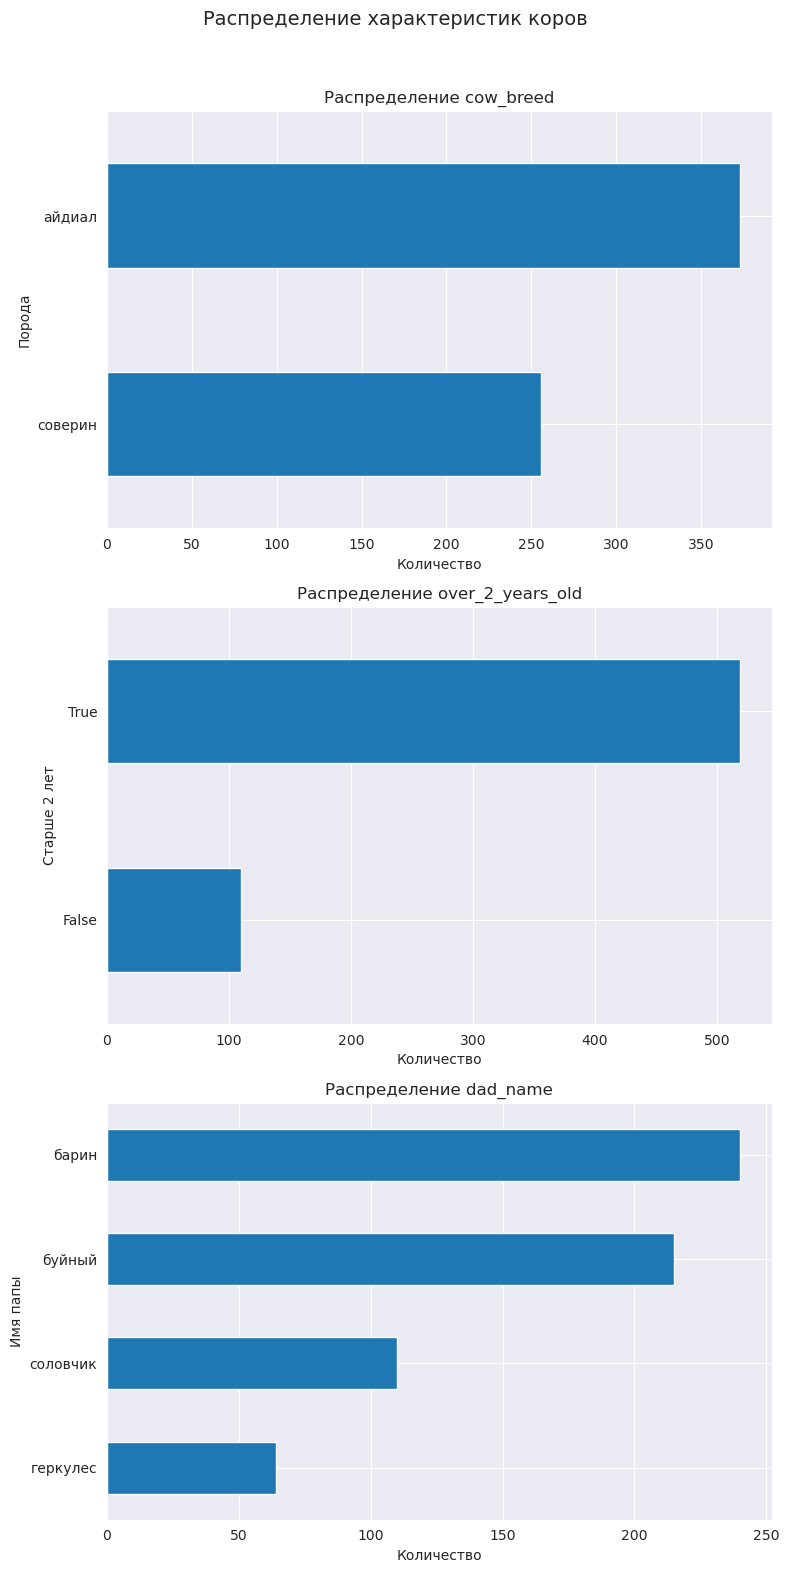

In [27]:
label_cow_columns = {'cow_breed': 'Порода', 'over_2_years_old': 'Старше 2 лет', 'dad_name': 'Имя папы'}

fig, axs = plt.subplots(3, 1, figsize=(8, 16))
fig.suptitle('Распределение характеристик коров', fontsize=14)

for i, col in enumerate(['cow_breed', 'over_2_years_old', 'dad_name']):
    sorted_counts = farm_main_data[col].value_counts().sort_values()
    sorted_counts.plot(kind='barh', ax=axs[i])
    axs[i].set_title(f'Распределение {col}', fontsize=12)
    axs[i].set_xlabel('Количество')
    axs[i].set_ylabel(label_cow_columns[col])
    axs[i].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Посмотрю какие породы есть у каждого имени папы, поскольку графики подсказывают, что это папы может повториться и у них могут быть разные породы.

In [28]:
farm_main_data.groupby('dad_name')['dad_cow_breed'].unique()

dad_name
барин       [соверин, айдиал]
буйный               [айдиал]
геркулес             [айдиал]
соловчик    [соверин, айдиал]
Name: dad_cow_breed, dtype: object

По графикам видно, что:
- Большинство коров имеют породу Вис Бэк Айдиал (`айдиал` на графике) - больше 350 голов, остальные Рефлекшн Соверинг (`соверин` на графике) - около 250 голов.
- Большинству коров старше 2 лет - около 500 голов, около 100 коров моложе 2 лет.
- Если посмотреть на имена пап, то на первом месте "Барин" около 240 коров, на втором месте "Буйный" около 220 коров, дальше идёт "Соловчик" с примерно 110 коров и замыкает "Геркулес" с примерно 60 коров.
- Если посмотреть на породы отцов, то видно, что разные быки могут иметь одинаковы имена. Так у имени "Барин" две породы - Рефлекшн Соверинг (`соверин` на графике) и Вис Бэк Айдиал (`айдиал` на графике). То же самое и с именем "Соловчик". Это значит, что имена отцов не уникальны и из-за них модель может повлиять на прогноз будущей модели.

Теперь посмотрю на характеристики корма: `energy_feed_unit`, `raw_protein_g`, `sugar_protein_ratio`.

Характеристики только корма - количественные признаки, поэтому сначала выведу общее описание статистик, а затем построю графики.

In [29]:
farm_main_data[['energy_feed_unit', 'raw_protein_g', 'sugar_protein_ratio']].describe()

energy_feed_unit  raw_protein_g  sugar_protein_ratio
count        629.000000     629.000000           629.000000
mean          14.543879    1923.364070             0.913116
std            1.306408     182.956251             0.032203
min           10.900000    1660.000000             0.840000
25%           13.500000    1771.000000             0.890000
50%           14.700000    1888.000000             0.930000
75%           15.600000    2062.000000             0.940000
max           16.800000    2349.000000             0.960000

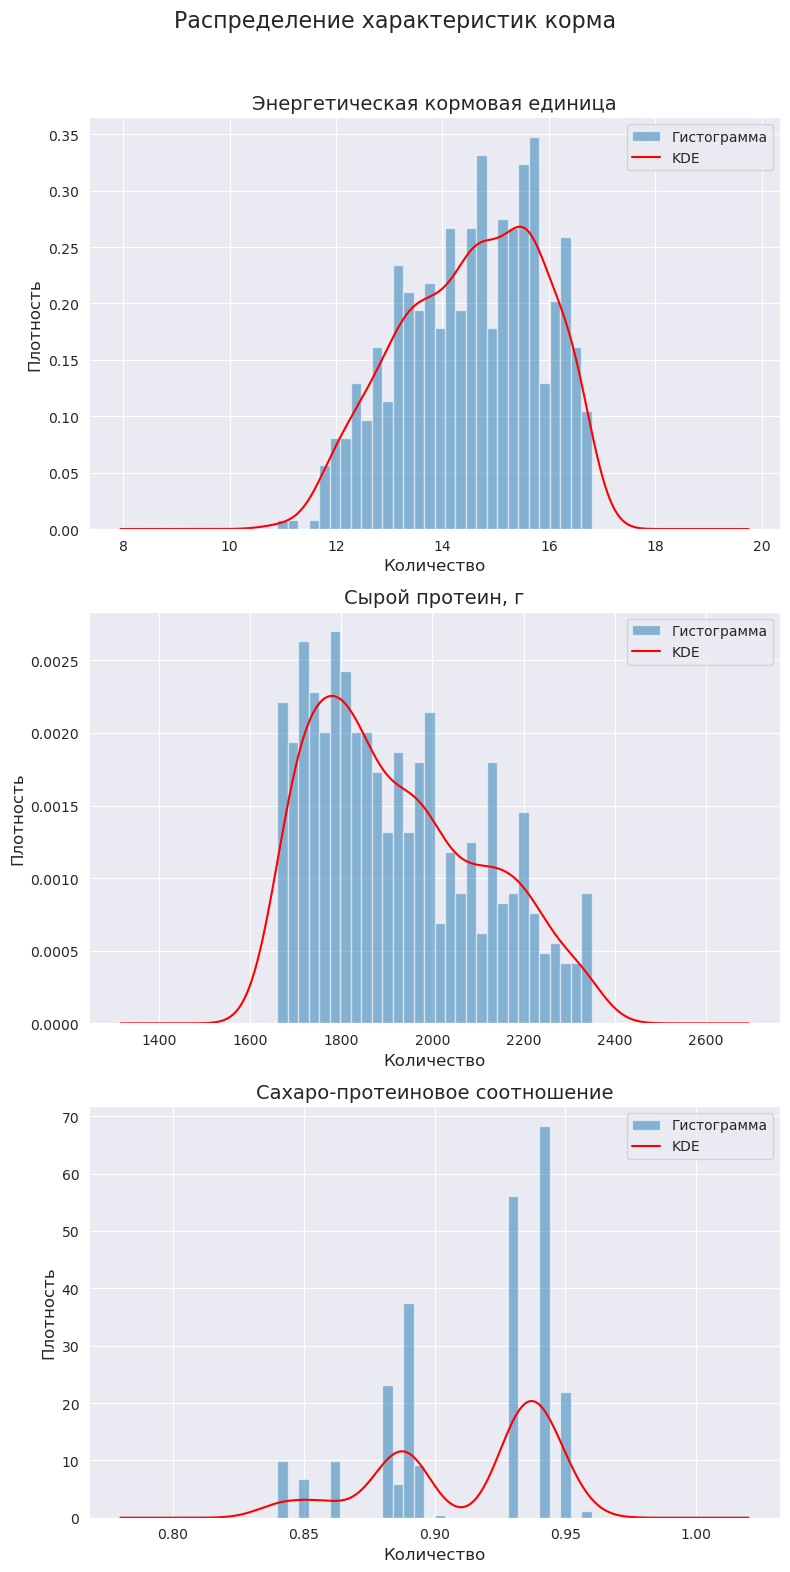

In [30]:
feed_columns = ['energy_feed_unit', 'raw_protein_g', 'sugar_protein_ratio']
x_labels_feed = ['Энергетическая кормовая единица', 'Сырой протеин, г', 'Сахаро-протеиновое соотношение']

fig, axs = plt.subplots(3, 1, figsize=(8, 16))
fig.suptitle('Распределение характеристик корма', fontsize=16)

for i, col in enumerate(feed_columns):
    farm_main_data[col].plot(kind='hist', bins=30, density=True, alpha=0.5, ax=axs[i], label='Гистограмма')
    farm_main_data[col].plot(kind='kde', color='red', ax=axs[i], label='KDE')
    axs[i].set_title(f'{x_labels_feed[i]}', fontsize=14)
    axs[i].set_xlabel('Количество', fontsize=12)
    axs[i].set_ylabel('Плотность', fontsize=12)
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Для оценки выбросов построю ящики с усами.

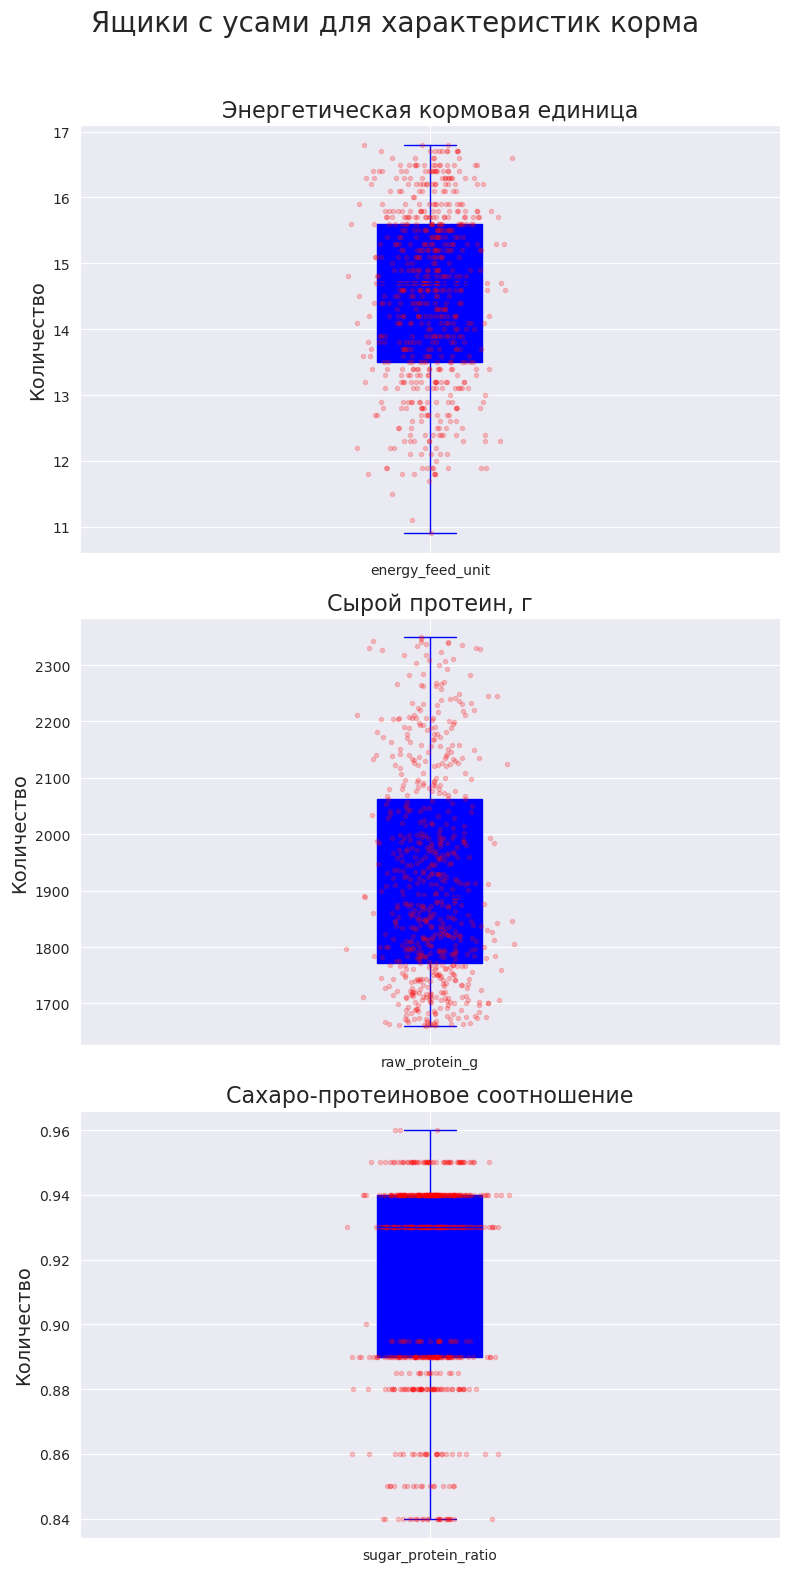

In [31]:
fig, axs = plt.subplots(3, 1, figsize=(8, 16))
fig.suptitle('Ящики с усами для характеристик корма', fontsize=20)

for i, col in enumerate(feed_columns):
    farm_main_data[col].plot(kind='box', ax=axs[i], color='blue', patch_artist=True)
    axs[i].set_title(f'{x_labels_feed[i]}', fontsize=16)
    axs[i].set_ylabel('Количество', fontsize=14)
    axs[i].grid(True)

    y = farm_main_data[col]
    x = np.random.normal(1, 0.04, size=len(y))
    axs[i].plot(x, y, 'r.', alpha=0.2)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

По графикам видно, что:
- Большинство коров потребляют корм с количеством энергетической кормовой единицы от \~13.5 до \~15.6.
- Сырого протеина в корме коровы больше всего от \~1700 до \~2000 г.
- Графики у ЭКЕ и сырого протеина имеют множество пиков, из этого можно сделать вывод, что коров кормят разными кормами. В том числе и смешивают их в разных пропорциях.
- Это ярко видно на графике сахаро-протеинового соотношения. Тут явно прослеживаются, что для кормов используют конкретные пропорции сахара и протеина. При чём разным коровам дают разные пропорции. Большинству коров дают корм с соотношениями \~0.93 и \~0.94.
- Выбросов во всех трёх признаках нет. Это значит, что коров кормят регулярно по одним и тем же схемам.
- В целом, из графиков видно, что в большинстве используют корм, где много ЭКЕ, мало сырого протеина и много сахара.

Теперь посмотрю на характеристику пастбища: `pasture_type`.

Поскольку это категориальный признак, построю график.

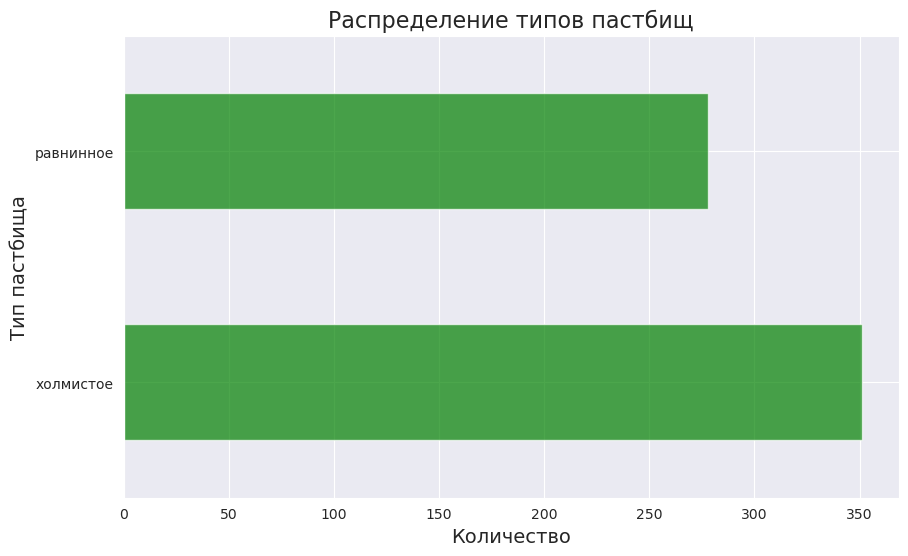

In [32]:
pasture_type_counts = farm_main_data['pasture_type'].value_counts()

pasture_type_counts.plot(kind='barh', figsize=(10, 6), color='green', alpha=0.7)
plt.title('Распределение типов пастбищ', fontsize=16)
plt.xlabel('Количество', fontsize=14)
plt.ylabel('Тип пастбища', fontsize=14)
plt.grid(True)
plt.show()

По графику видно, что:
- Большинство коров пасутся на холмистых пастбищах - около 350 голов, остальные на равнинных - около 270 голов.
- Это значит, что коровы пасутся на разных ландшафтах, что может влиять на их здоровье и удой.

Теперь посмотрю на характеристики молока: `milk_yield_kg`, `fat_percentage`, `protein_percentage`, `is_milk_tasty`.

Первые три признака количественные, поэтому сначала выведу общее описание статистик, а затем построю графики.
После построю график для категориального признака `is_milk_tasty`.

In [33]:
milk_columns = ['milk_yield_kg', 'fat_percentage', 'protein_percentage']
x_labels_milk = ['Удой, кг', 'Жирность, %', 'Белок, %']

farm_main_data[milk_columns].describe()

milk_yield_kg  fat_percentage  protein_percentage
count     629.000000      629.000000          629.000000
mean     6188.750397        3.603657            3.075671
std      1644.795489        0.168656            0.002549
min      5204.000000        2.990000            3.069000
25%      5751.000000        3.590000            3.074000
50%      6133.000000        3.650000            3.076000
75%      6501.000000        3.720000            3.077000
max     45616.000000        3.750000            3.085000

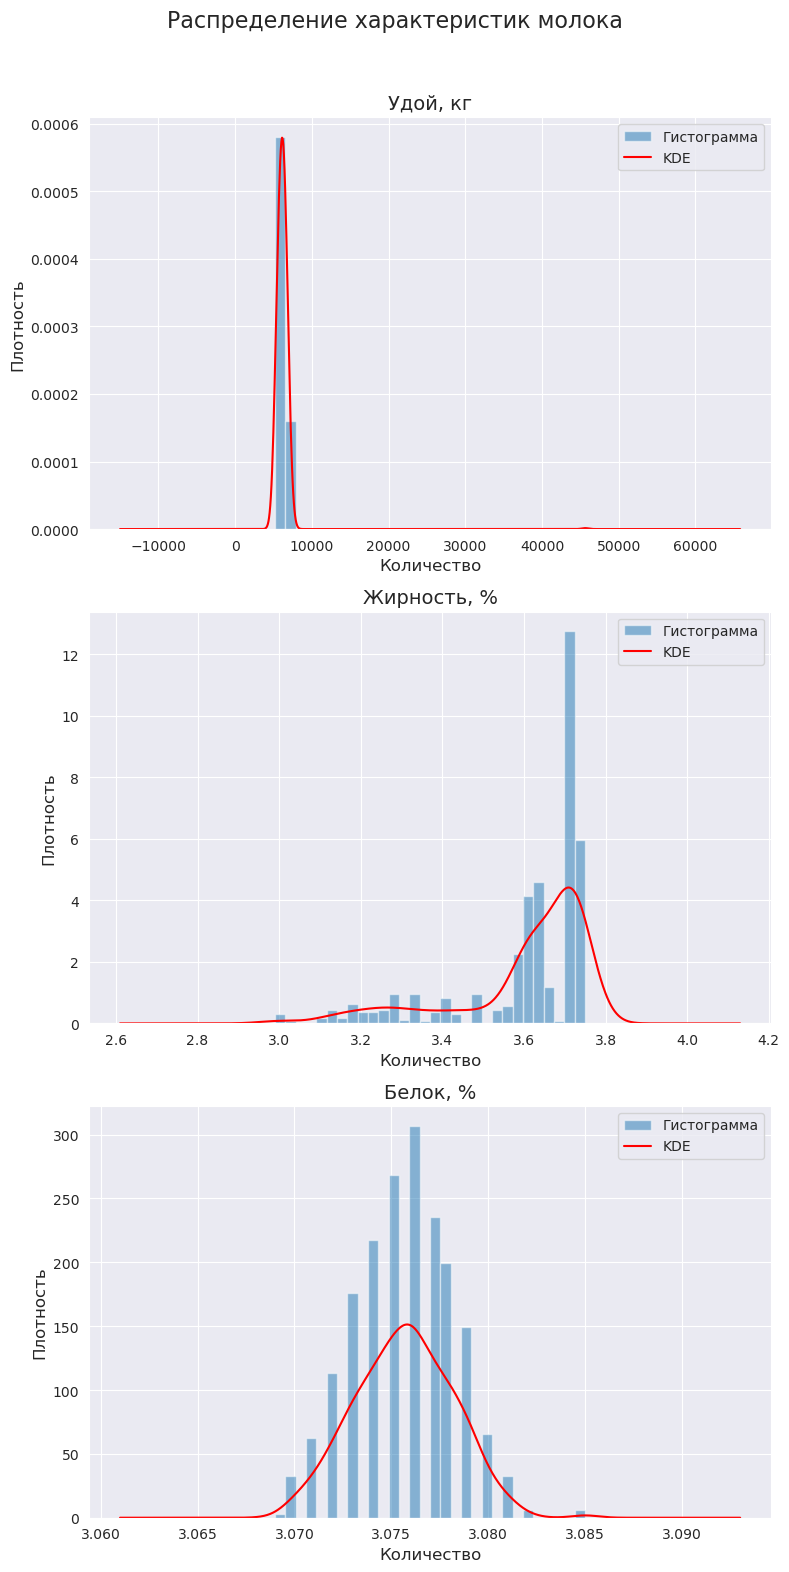

In [34]:
fig, axs = plt.subplots(3, 1, figsize=(8, 16))
fig.suptitle('Распределение характеристик молока', fontsize=16)

for i, col in enumerate(milk_columns):
    farm_main_data[col].plot(kind='hist', bins=30, density=True, alpha=0.5, ax=axs[i], label='Гистограмма')
    farm_main_data[col].plot(kind='kde', color='red', ax=axs[i], label='KDE')
    axs[i].set_title(f'{x_labels_milk[i]}', fontsize=14)
    axs[i].set_xlabel('Количество', fontsize=12)
    axs[i].set_ylabel('Плотность', fontsize=12)
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Построю графики "Ящик с усами" для количественных признаков, чтобы оценить выбросы.

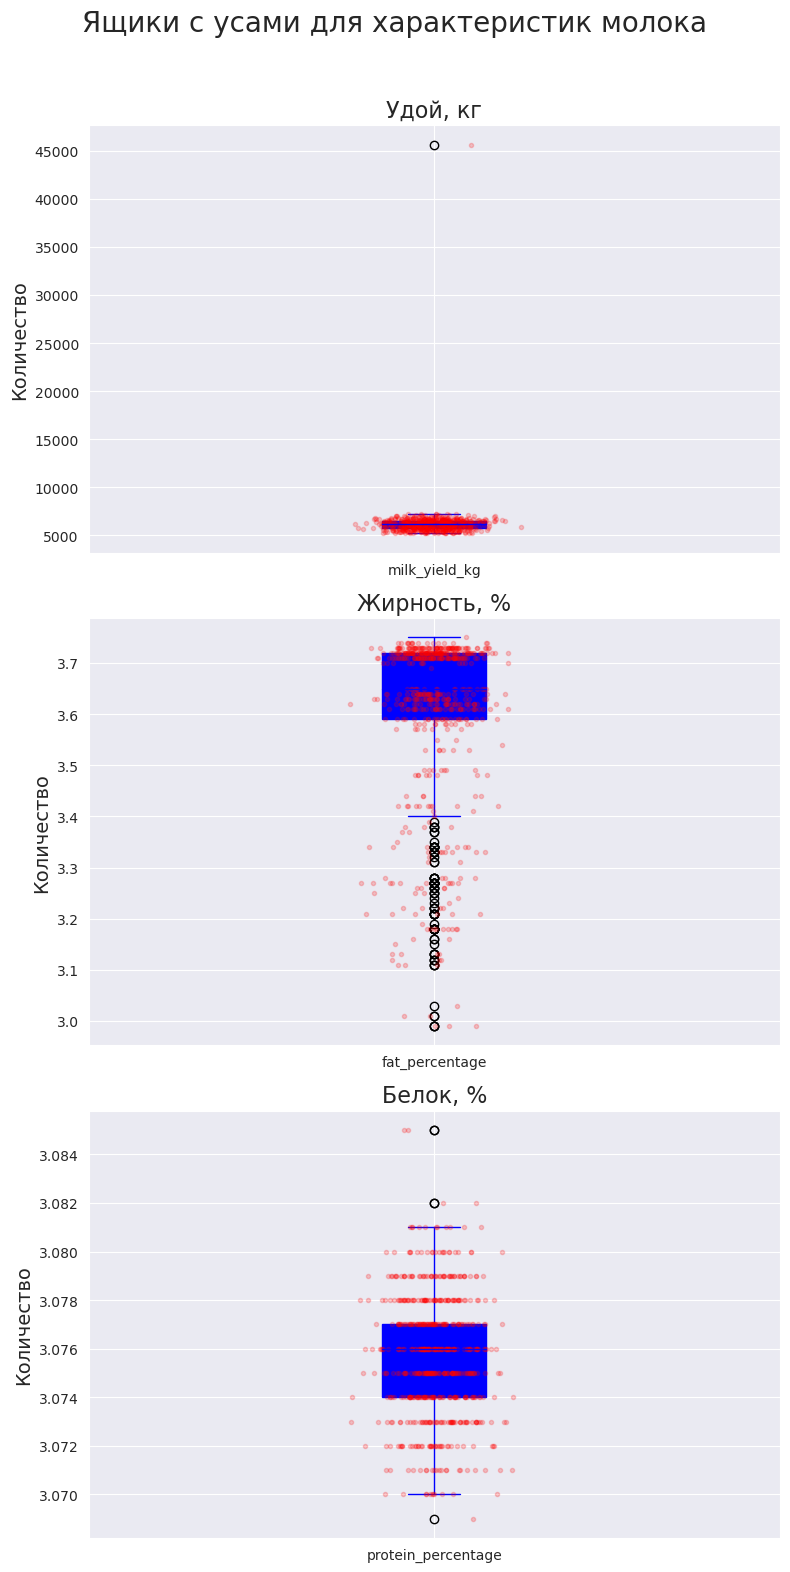

In [35]:
fig, axs = plt.subplots(3, 1, figsize=(8, 16))
fig.suptitle('Ящики с усами для характеристик молока', fontsize=20)

for i, col in enumerate(milk_columns):
    farm_main_data[col].plot(kind='box', ax=axs[i], color='blue', patch_artist=True)
    axs[i].set_title(f'{x_labels_milk[i]}', fontsize=16)
    axs[i].set_ylabel('Количество', fontsize=14)
    axs[i].grid(True)

    y = farm_main_data[col]
    x = np.random.normal(1, 0.04, size=len(y))
    axs[i].plot(x, y, 'r.', alpha=0.2)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Есть явный выброс в признаке `milk_yield_kg` - это \~45000 кг. Это ошибка в данных, так как такой удой нереально получить от одной коровы. Нужно удалить эту запись.

In [36]:
farm_main_data = farm_main_data[farm_main_data['milk_yield_kg'] < 45000]

Проверю, что выброс удалён.

In [37]:
farm_main_data['milk_yield_kg'].max()

7222

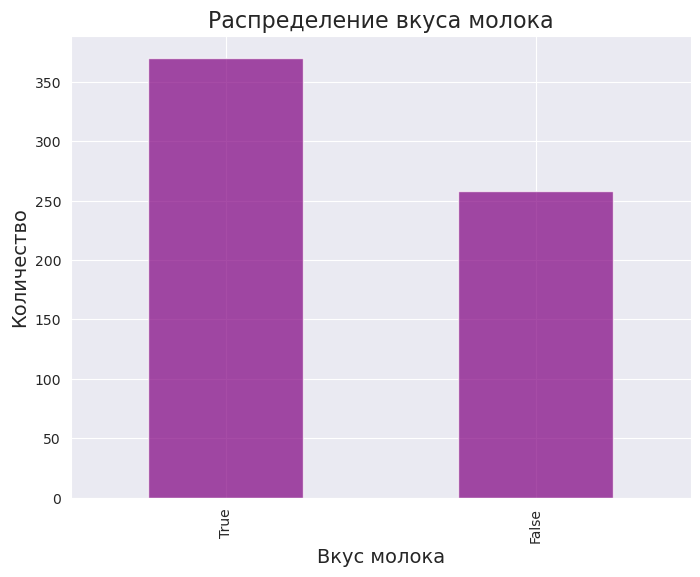

In [38]:
milk_tasty_counts = farm_main_data['is_milk_tasty'].value_counts()

milk_tasty_counts.plot(kind='bar', figsize=(8, 6), color='purple', alpha=0.7)
plt.title('Распределение вкуса молока', fontsize=16)
plt.xlabel('Вкус молока', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.grid(True)
plt.show()

По графикам видно, что:
- Большинство коров дают удой от \~5700 до \~6500 кг.
- Содержание жиров в молоке больше всего от \~3.6 до \~3.7 %.
- Содержание белков в молоке больше всего от \~3.07 до \~3.08 %. Белок почти не меняется.
- Был явный выброс в признаке `milk_yield_kg` - это \~45000 кг. Это явно ошибка в данных, так как такой удой нереально получить от одной коровы. Эту запись я удалил.
- Есть выбросы в жирности, но они не настолько критичны, так как не сильно отличаются от основного распределения.
- Есть три выброса в белке, но они тоже не критичны.
- Большинство коров дают вкусное молоко - около 370 голов, остальные не вкусное - около 250 голов.

### Статистический анализ признаков для датафрейма cow_buy_data (коровы "ЭкоФермы")

Характеристик в cow_buy_data меньше, чем в farm_main_data:
- Есть только хар-ки коровы: `cow_breed`, `over_2_years_old`, `dad_name`, `dad_cow_breed`.
- Хар-ки молока: `fat_percentage`, `protein_percentage`.
- И тип пастбища: `pasture_type`.

Сначала построю графики для характеристик коровы: `cow_breed`, `over_2_years_old`, `dad_name`, `dad_cow_breed`.

Все эти признаки категориальные, поэтому построю графики.

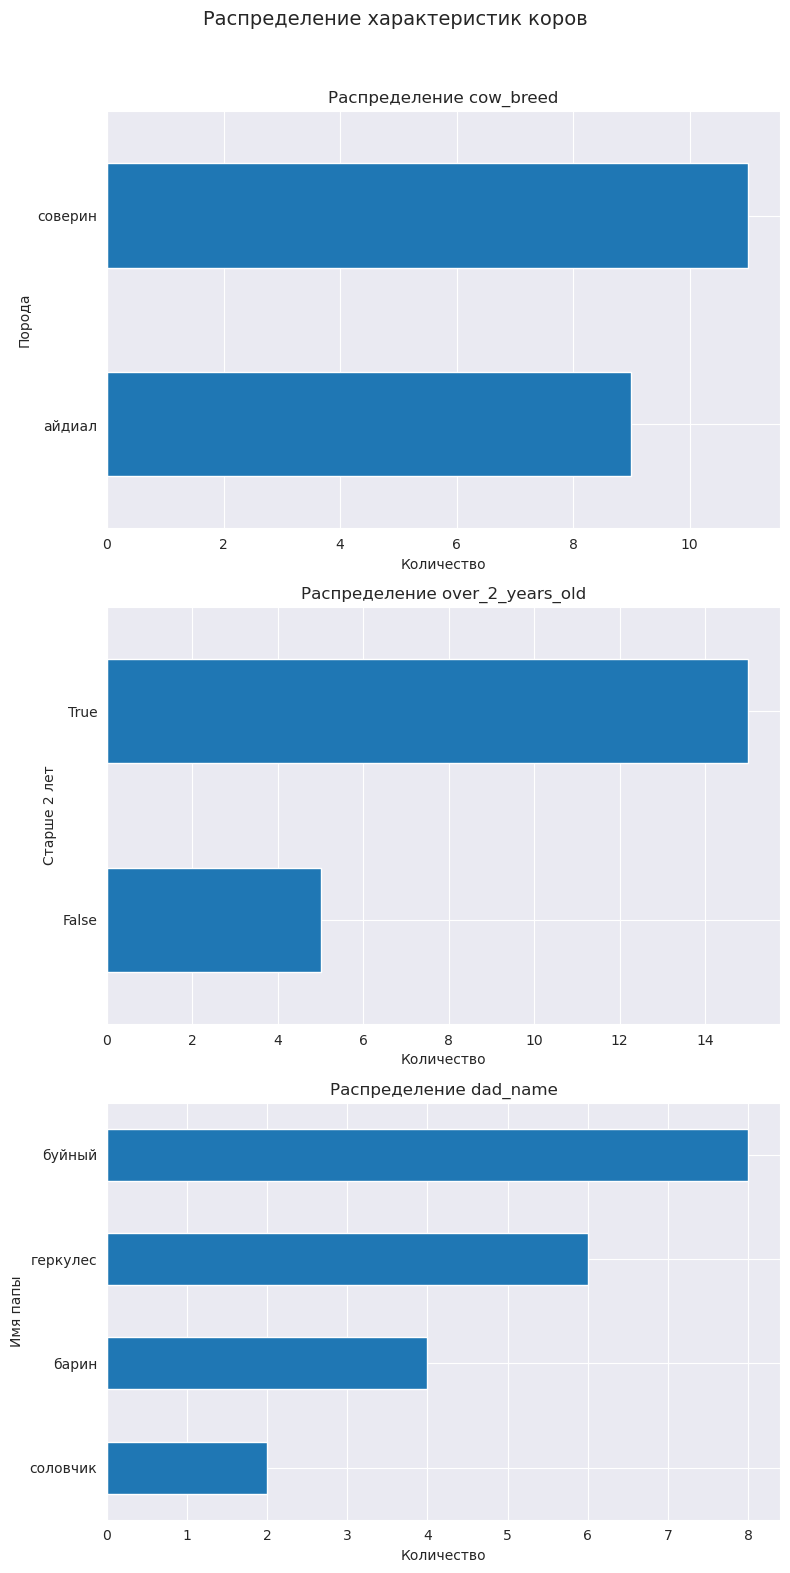

In [39]:
label_cow_buy_columns = {'cow_breed': 'Порода', 'over_2_years_old': 'Старше 2 лет', 'dad_name': 'Имя папы'}

fig, axs = plt.subplots(3, 1, figsize=(8, 16))
fig.suptitle('Распределение характеристик коров', fontsize=14)

for i, col in enumerate(['cow_breed', 'over_2_years_old', 'dad_name']):
    sorted_counts = cow_buy_data[col].value_counts().sort_values()
    sorted_counts.plot(kind='barh', ax=axs[i])
    axs[i].set_title(f'Распределение {col}', fontsize=12)
    axs[i].set_xlabel('Количество')
    axs[i].set_ylabel(label_cow_buy_columns[col])
    axs[i].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [40]:
cow_buy_data.groupby('dad_name')['dad_cow_breed'].unique()

dad_name
барин               [соверин]
буйный      [соверин, айдиал]
геркулес    [айдиал, соверин]
соловчик            [соверин]
Name: dad_cow_breed, dtype: object

По графикам видно, что:
- 9 коров породы "Вис Бэк Айдиал" и 11 "Рефлекшн Соверинг".
- 15 коров старше 2 лет, 5 моложе 2 лет.
- С именами отцов, та же ситуация, что и в farm_main_data. Имена не уникальны и у одних и тех же имён отцов разные породы. В данном случае - это Буйный и Геркулес. Это может повлиять на прогноз модели.

Теперь посмотрю на характеристики молока: `fat_percentage`, `protein_percentage`.

Эти признаки количественные, поэтому сначала выведу общее описание статистик, а затем построю графики.

In [41]:
cow_buy_data[['fat_percentage', 'protein_percentage']].describe()

fat_percentage  protein_percentage
count       20.000000           20.000000
mean         3.577500            3.069500
std          0.126818            0.010339
min          3.340000            3.046000
25%          3.510000            3.064000
50%          3.590000            3.074000
75%          3.650000            3.076000
max          3.770000            3.081000

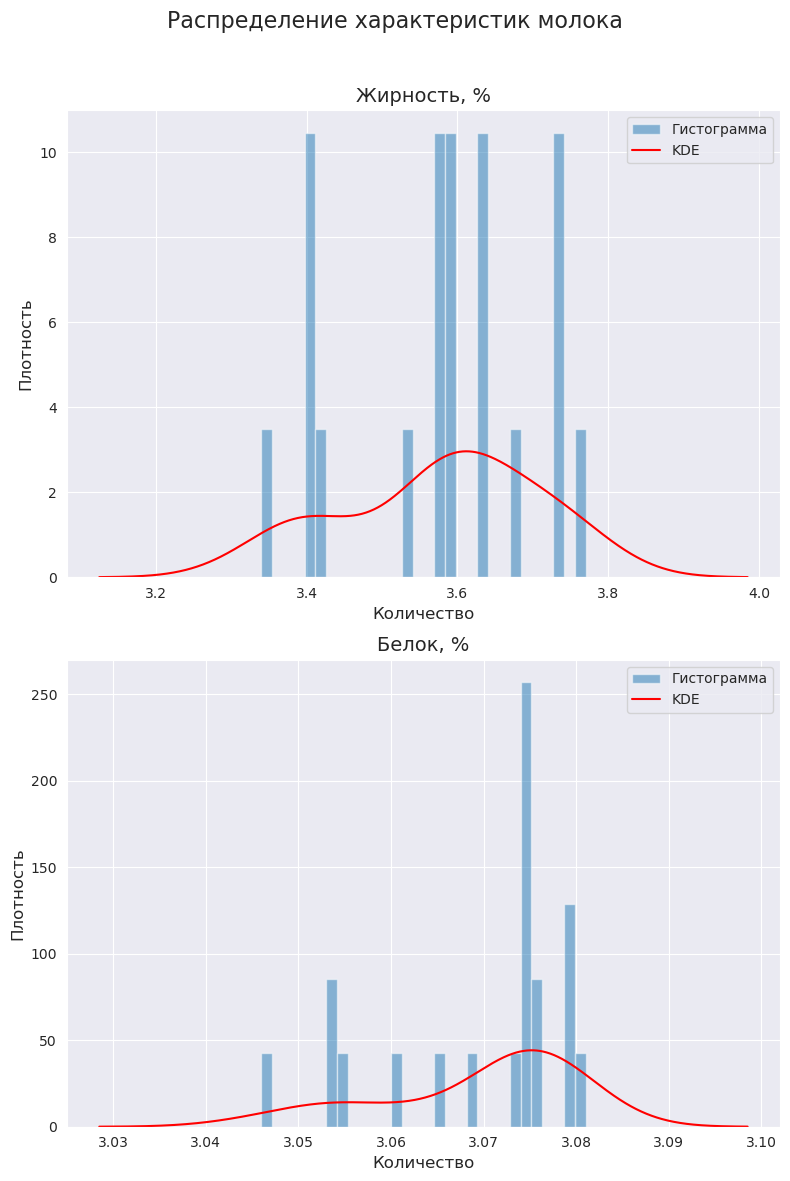

In [42]:
milk_columns_cow_buy = ['fat_percentage', 'protein_percentage']
x_labels_milk_cow_buy = ['Жирность, %', 'Белок, %']

fig, axs = plt.subplots(2, 1, figsize=(8, 12))
fig.suptitle('Распределение характеристик молока', fontsize=16)

for i, col in enumerate(milk_columns_cow_buy):
    cow_buy_data[col].plot(kind='hist', bins=30, density=True, alpha=0.5, ax=axs[i], label='Гистограмма')
    cow_buy_data[col].plot(kind='kde', color='red', ax=axs[i], label='KDE')
    axs[i].set_title(f'{x_labels_milk_cow_buy[i]}', fontsize=14)
    axs[i].set_xlabel('Количество', fontsize=12)
    axs[i].set_ylabel('Плотность', fontsize=12)
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Построю графики "Ящик с усами" для количественных признаков, чтобы оценить выбросы.

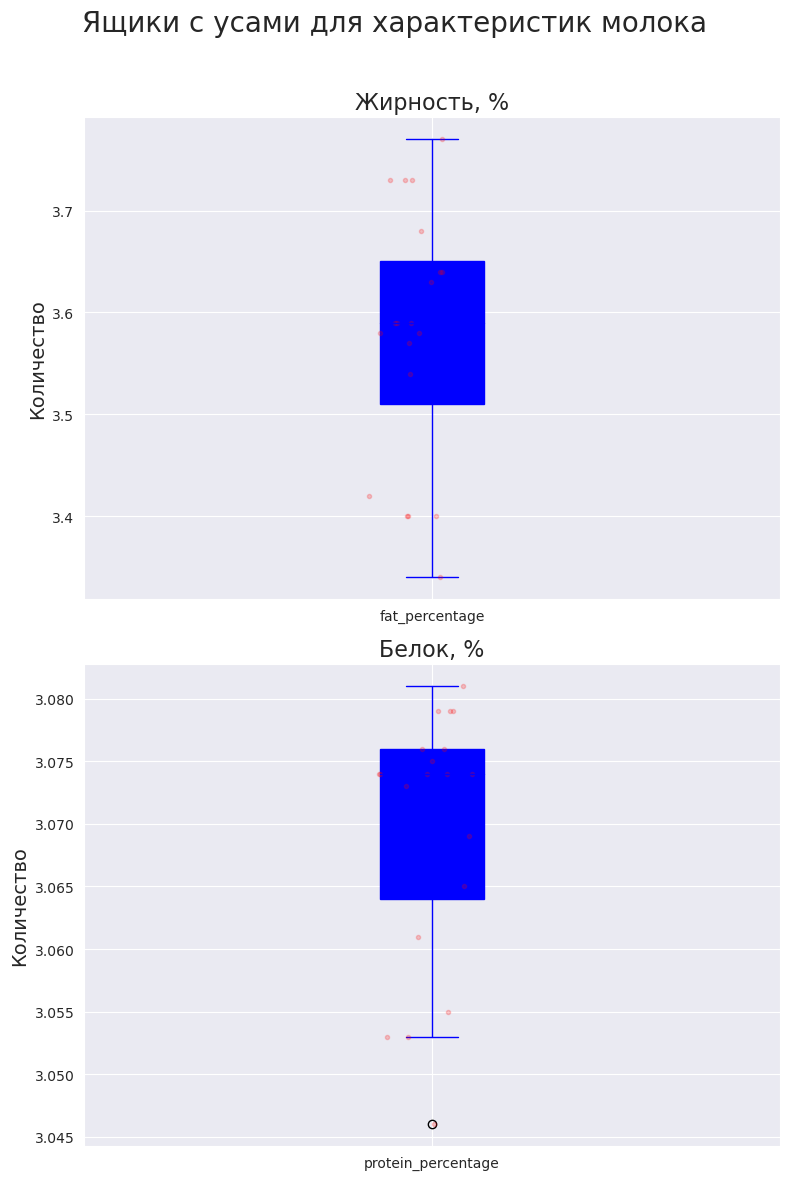

In [43]:
fig, axs = plt.subplots(2, 1, figsize=(8, 12))
fig.suptitle('Ящики с усами для характеристик молока', fontsize=20)

for i, col in enumerate(milk_columns_cow_buy):
    cow_buy_data[col].plot(kind='box', ax=axs[i], color='blue', patch_artist=True)
    axs[i].set_title(f'{x_labels_milk_cow_buy[i]}', fontsize=16)
    axs[i].set_ylabel('Количество', fontsize=14)
    axs[i].grid(True)

    y = cow_buy_data[col]
    x = np.random.normal(1, 0.04, size=len(y))
    axs[i].plot(x, y, 'r.', alpha=0.2)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

По графикам видно, что:
- Содержание жиров в молоке больше всего от \~3.4 до \~3.7 %.
- Содержание белков в молоке больше всего от \~3.06 до \~3.08 %.
- Выбросов в обоих признаках нет.
- В целом, коровы "ЭкоФермы" дают молоко с жирностью от \~3.4 до \~3.7 % и белком от \~3.06 до \~3.08 %.

Теперь посмотрю на характеристику пастбища: `pasture_type`.

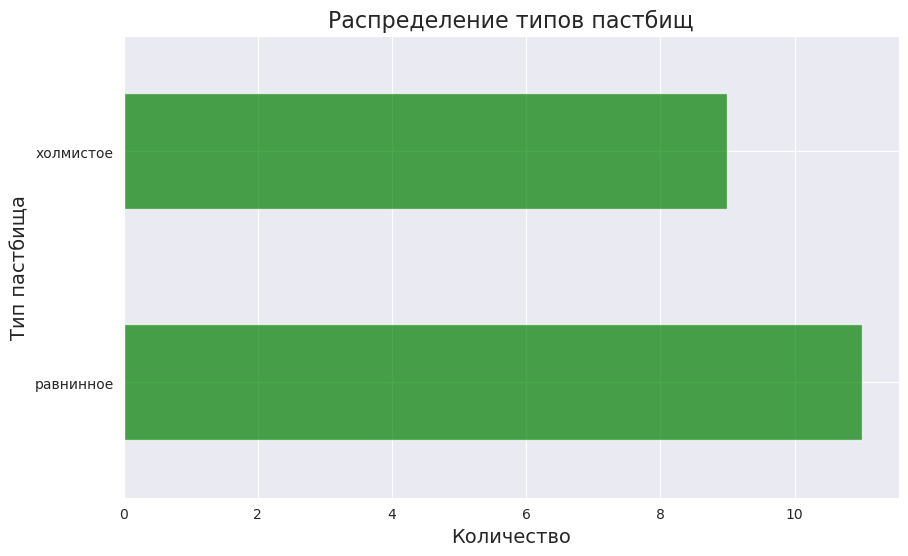

In [44]:
pasture_type_counts_cow_buy = cow_buy_data['pasture_type'].value_counts()

pasture_type_counts_cow_buy.plot(kind='barh', figsize=(10, 6), color='green', alpha=0.7)
plt.title('Распределение типов пастбищ', fontsize=16)
plt.xlabel('Количество', fontsize=14)
plt.ylabel('Тип пастбища', fontsize=14)
plt.grid(True)
plt.show()

По графику видно, что:
- 9 коров от "ЭкоФермы" пасутся на холмистых пастбищах, 11 на равнинных.

### Выводы по исследовательскому анализу данных

Коровы фермера:
- Большинство коров имеют породу Вис Бэк Айдиал (`айдиал` на графике) - больше 350 голов, остальные Рефлекшн Соверинг (`соверин` на графике) - около 250 голов.
- Большинству коров старше 2 лет - около 500 голов, около 100 коров моложе 2 лет.
- Большинство коров пасутся на холмистых пастбищах - около 350 голов, остальные на равнинных - около 270 голов.
- Большинство коров дают удой от \~5700 до \~6500 кг.
- В данных удоя был явный выброс - это \~45000 кг. Это ошибка в данных, так как такой удой нереально получить от одной коровы. Эту запись я удалил.
- Содержание жиров в молоке больше всего от \~3.6 до \~3.7 %.
- Содержание белков в молоке больше всего от \~3.07 до \~3.08 %.
- В данных по жирам и белкам есть выбросы, но они не критичны, поэтому я их оставил.
- Большинство коров дают вкусное молоко - около 370 голов, остальные не вкусное - около 250 голов.

Коровы "ЭкоФермы":
- Половина коров пасутся на холмистых пастбищах, другая половина на равнинных.
- Коровы дают молоко с жирностью от \~3.4 до \~3.7 % и белком от \~3.06 до \~3.08 %.
- 9 коров породы "Вис Бэк Айдиал" и 11 "Рефлекшн Соверинг".
- 15 коров старше 2 лет, 5 моложе 2 лет.
- Выбросов в данных "ЭкоФермы" нет.

С именами отцов в обоих датафреймах проблема, что они не уникальны и у одних и тех же имён отцов разные породы. В случае "ЭкоФермы" - это Буйный и Геркулес, а у фермера - Соловчик и Барин. Это может повлиять на прогноз модели. При условии, что тут другие имена отцов не уникальные, то это точно значит, что при обучении модели точно не стоит использовать имя отца.

## Корреляционный анализ признаков в датасете ferma_main.csv

Построю матрицу корреляции для количественных признаков в датасете ferma_main.csv.

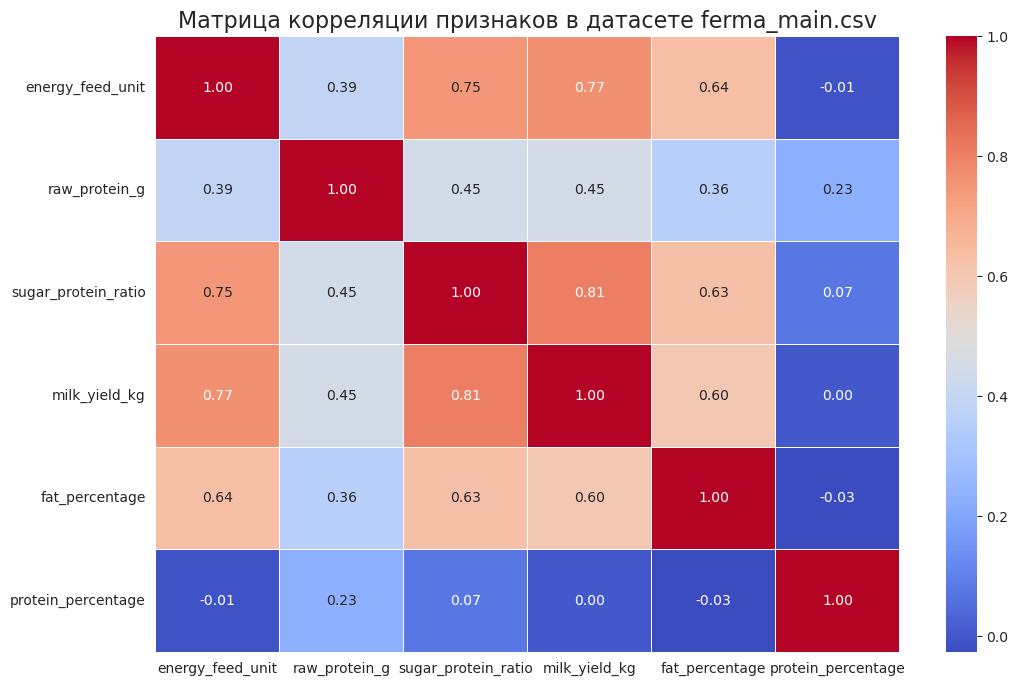

In [45]:
corr_matrix = farm_main_data[['energy_feed_unit', 'raw_protein_g', 'sugar_protein_ratio', 'milk_yield_kg', 'fat_percentage', 'protein_percentage']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5, cmap='coolwarm')
plt.title('Матрица корреляции признаков в датасете ferma_main.csv', fontsize=16)
plt.show()

По матрице корреляции видно, что:
- Содержание жиров в молоке коррелирует с удоем молока на 0.6 - это средняя корреляция.
- Содержание протеина в молоке никак не коррелирует с удоем молока.
- Содержание протеина в корме коровы коррелирует с удоем молока на 0.45 - это слабая корреляция.
- Сахаро-протеиновое соотношение в корме коровы коррелирует с удоем молока на 0.81 - это высокая корреляция.
- Энергетическая кормовая единица коррелирует с удоем молока на 0.77 - это высокая корреляция.
- Энергетическая кормовая единица коррелирует с Сахаро-протеиновым соотношением на 0.75 (высокая корреляция) и с содержанием жира в молоке на 0.64 (средняя корреляция). Это, в целом, логично, чем больше сахара, тем больше энергии в корме и жира в молоке.

Построю диаграммы рассеяния для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков.

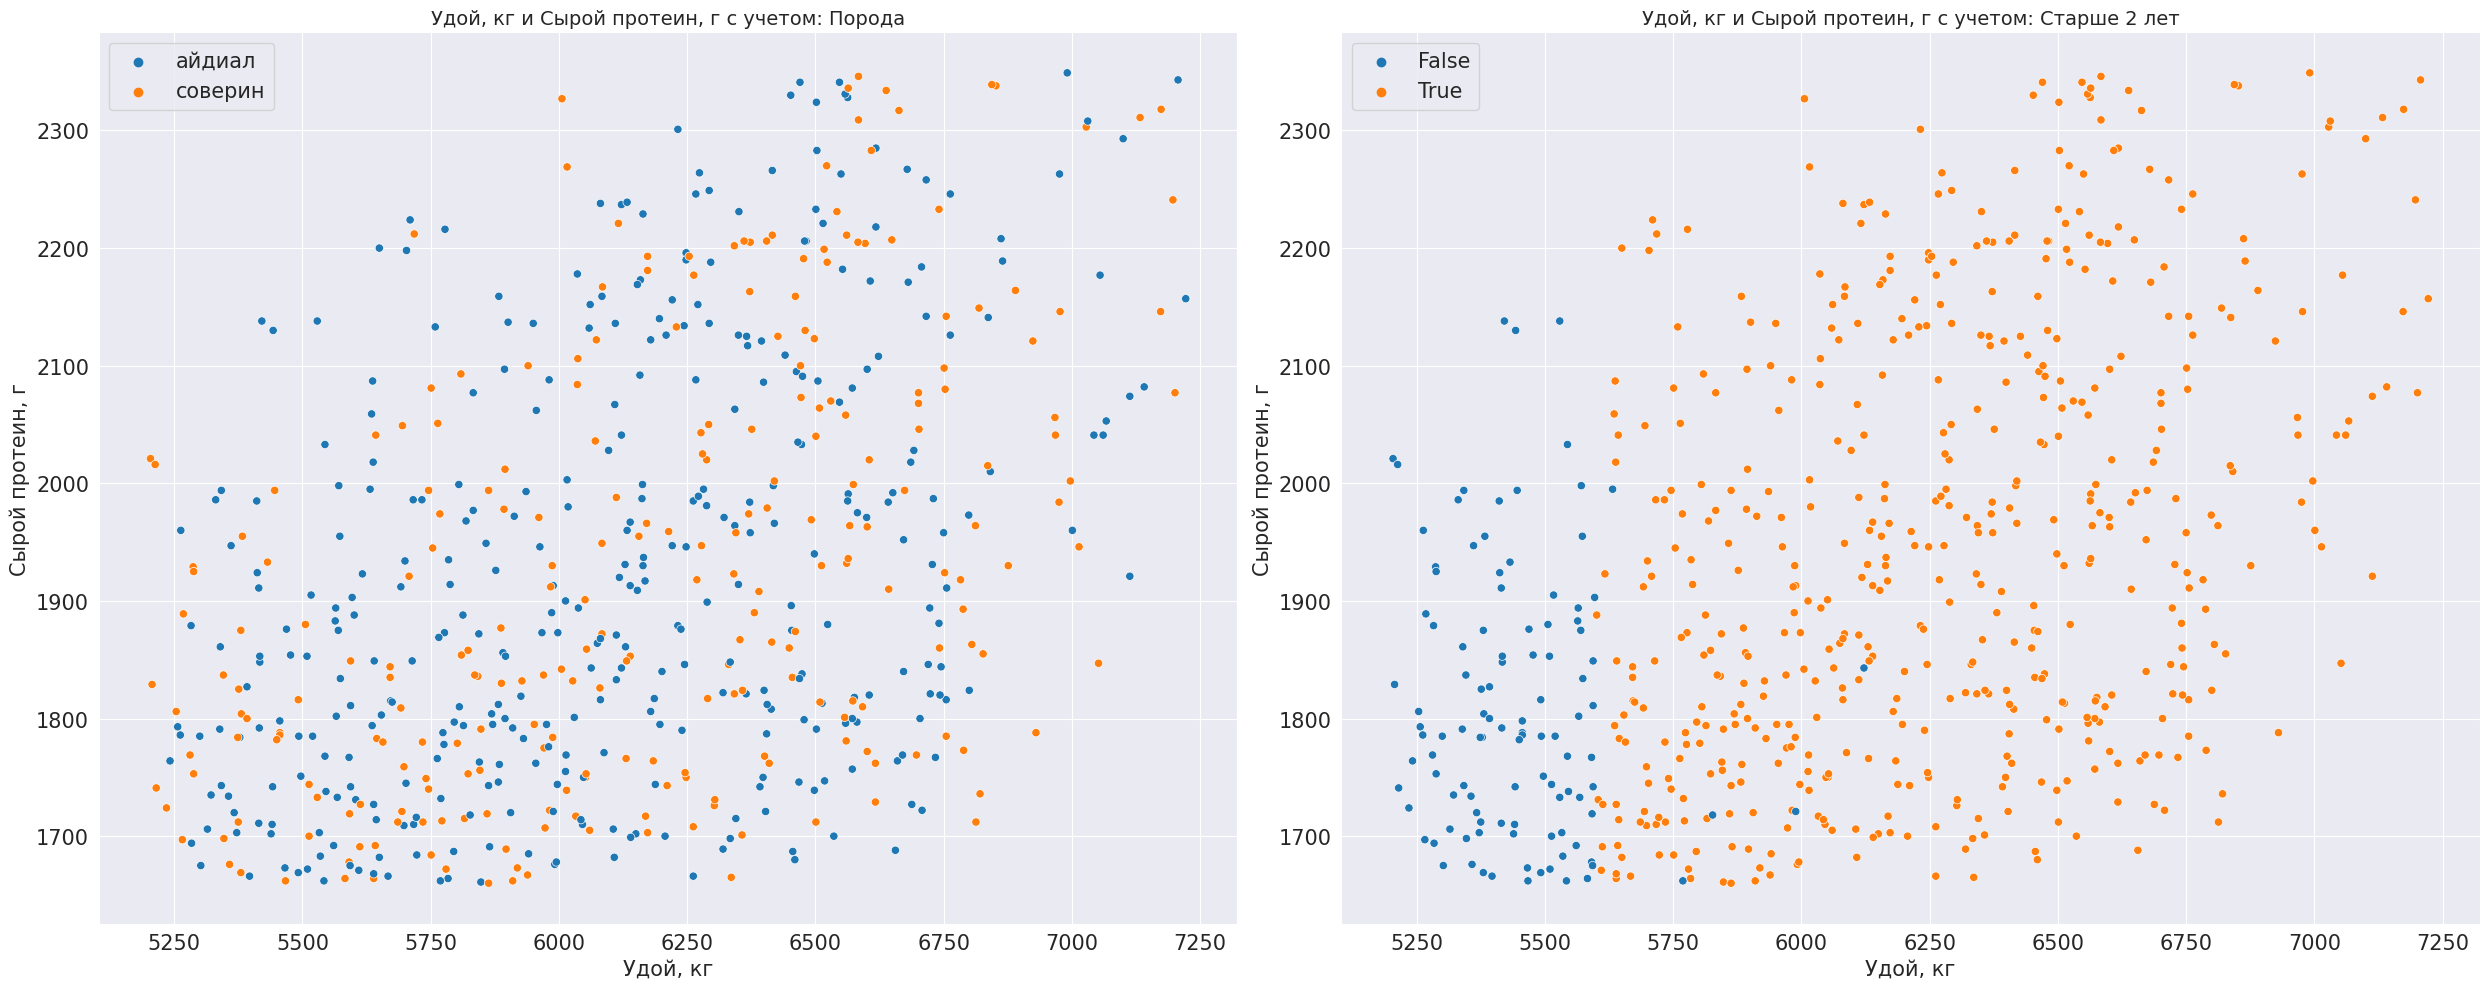

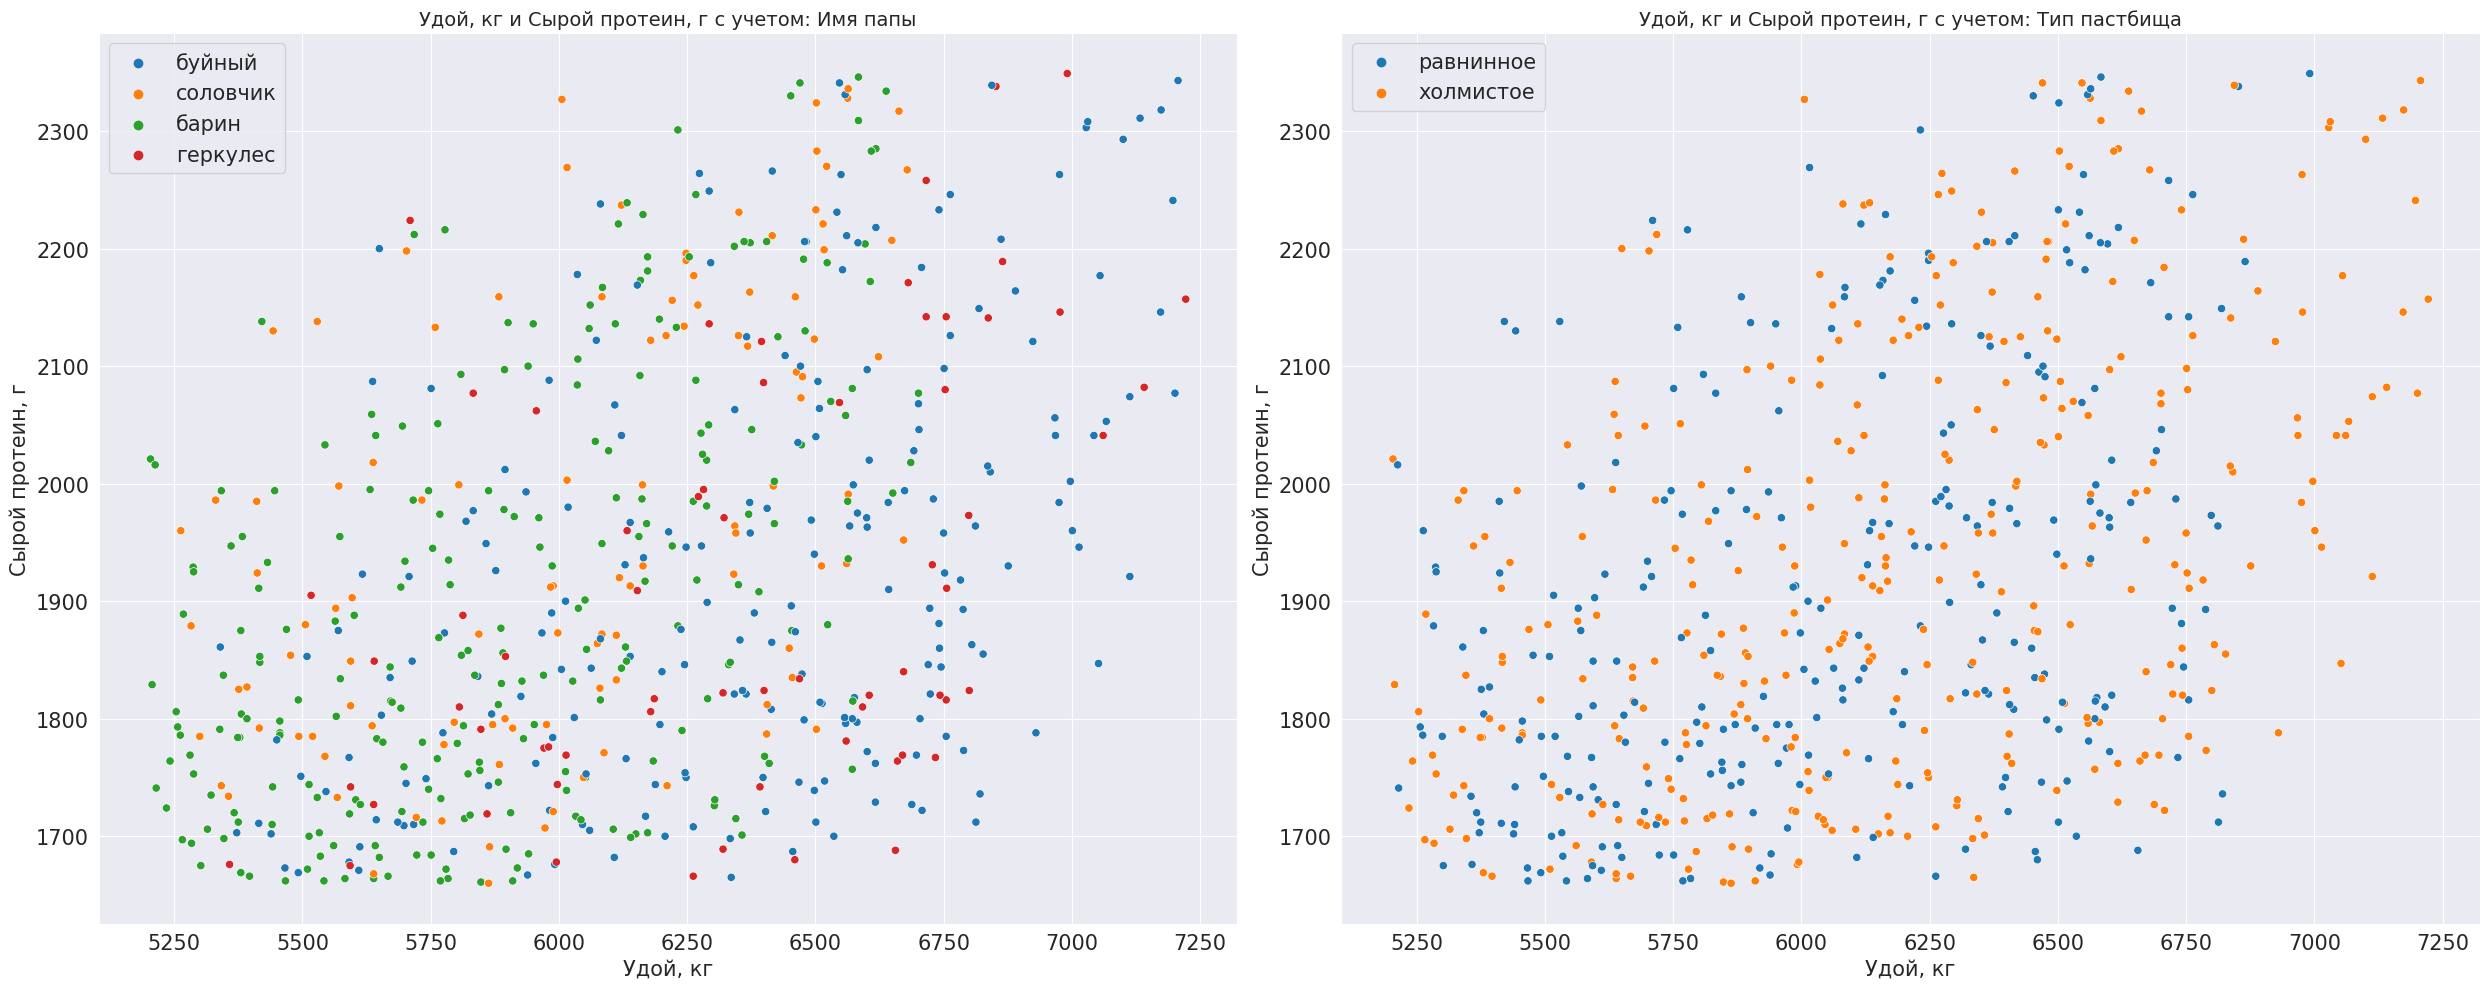

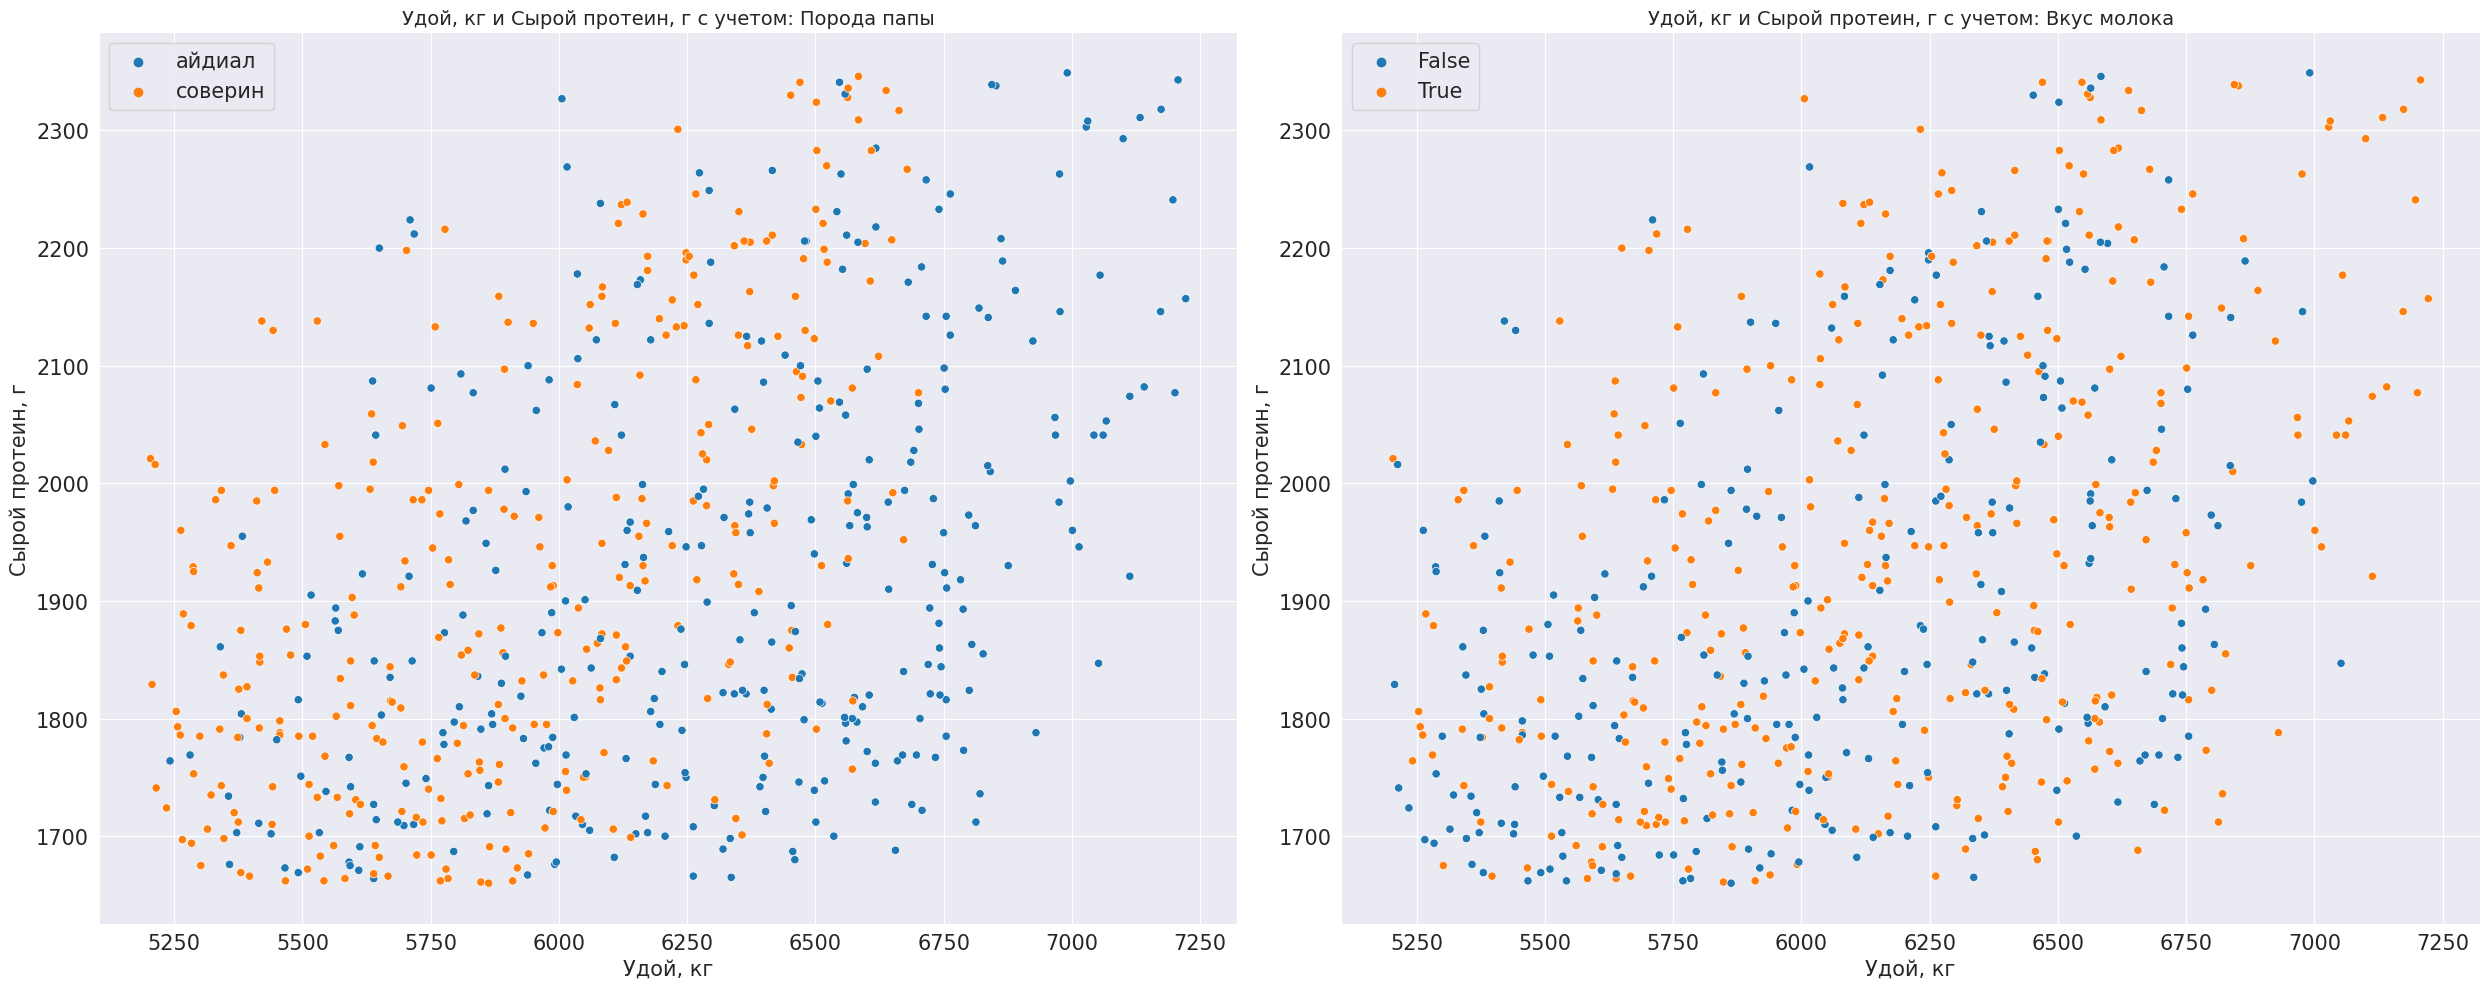

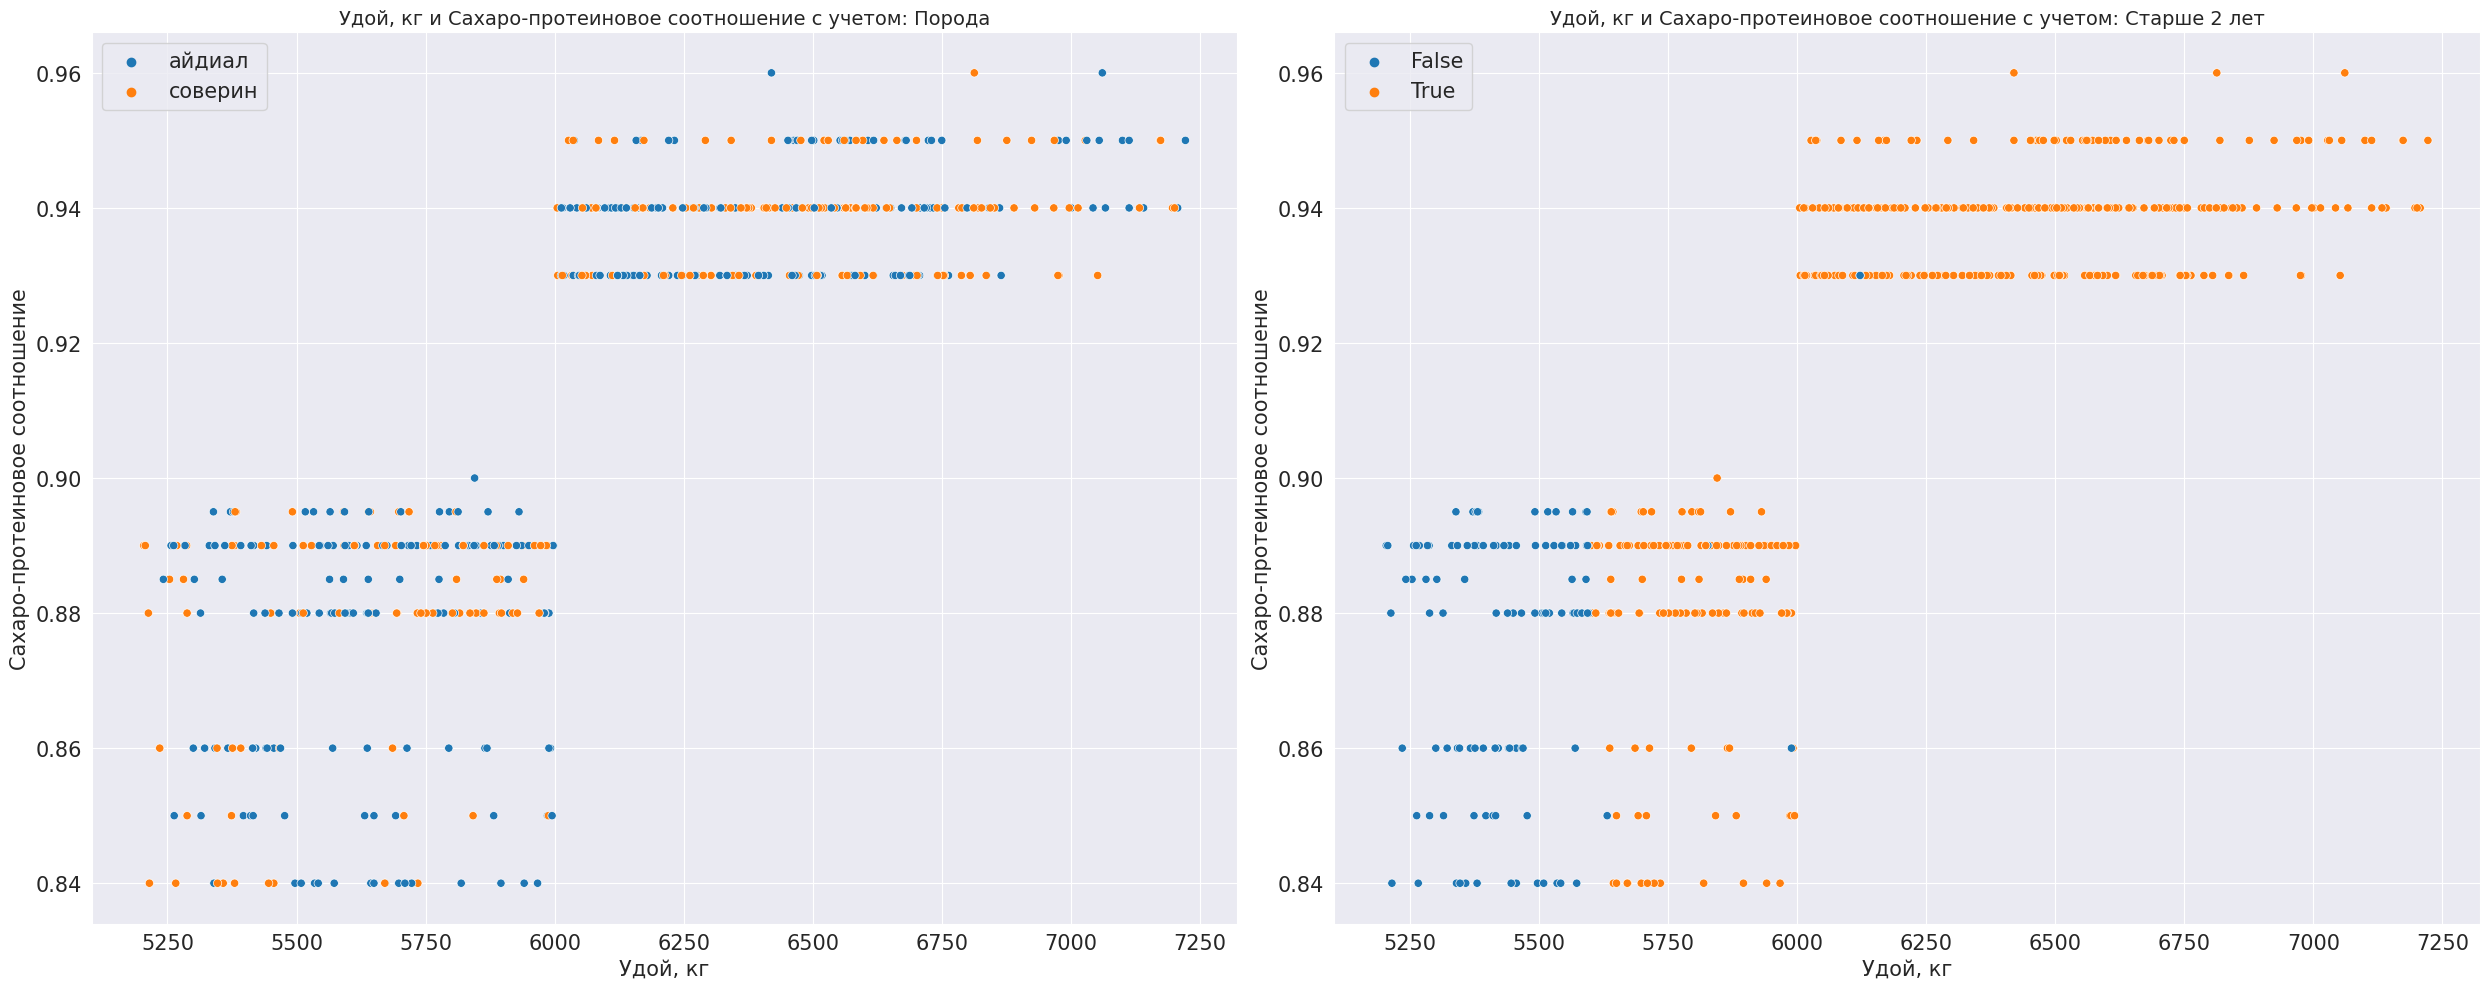

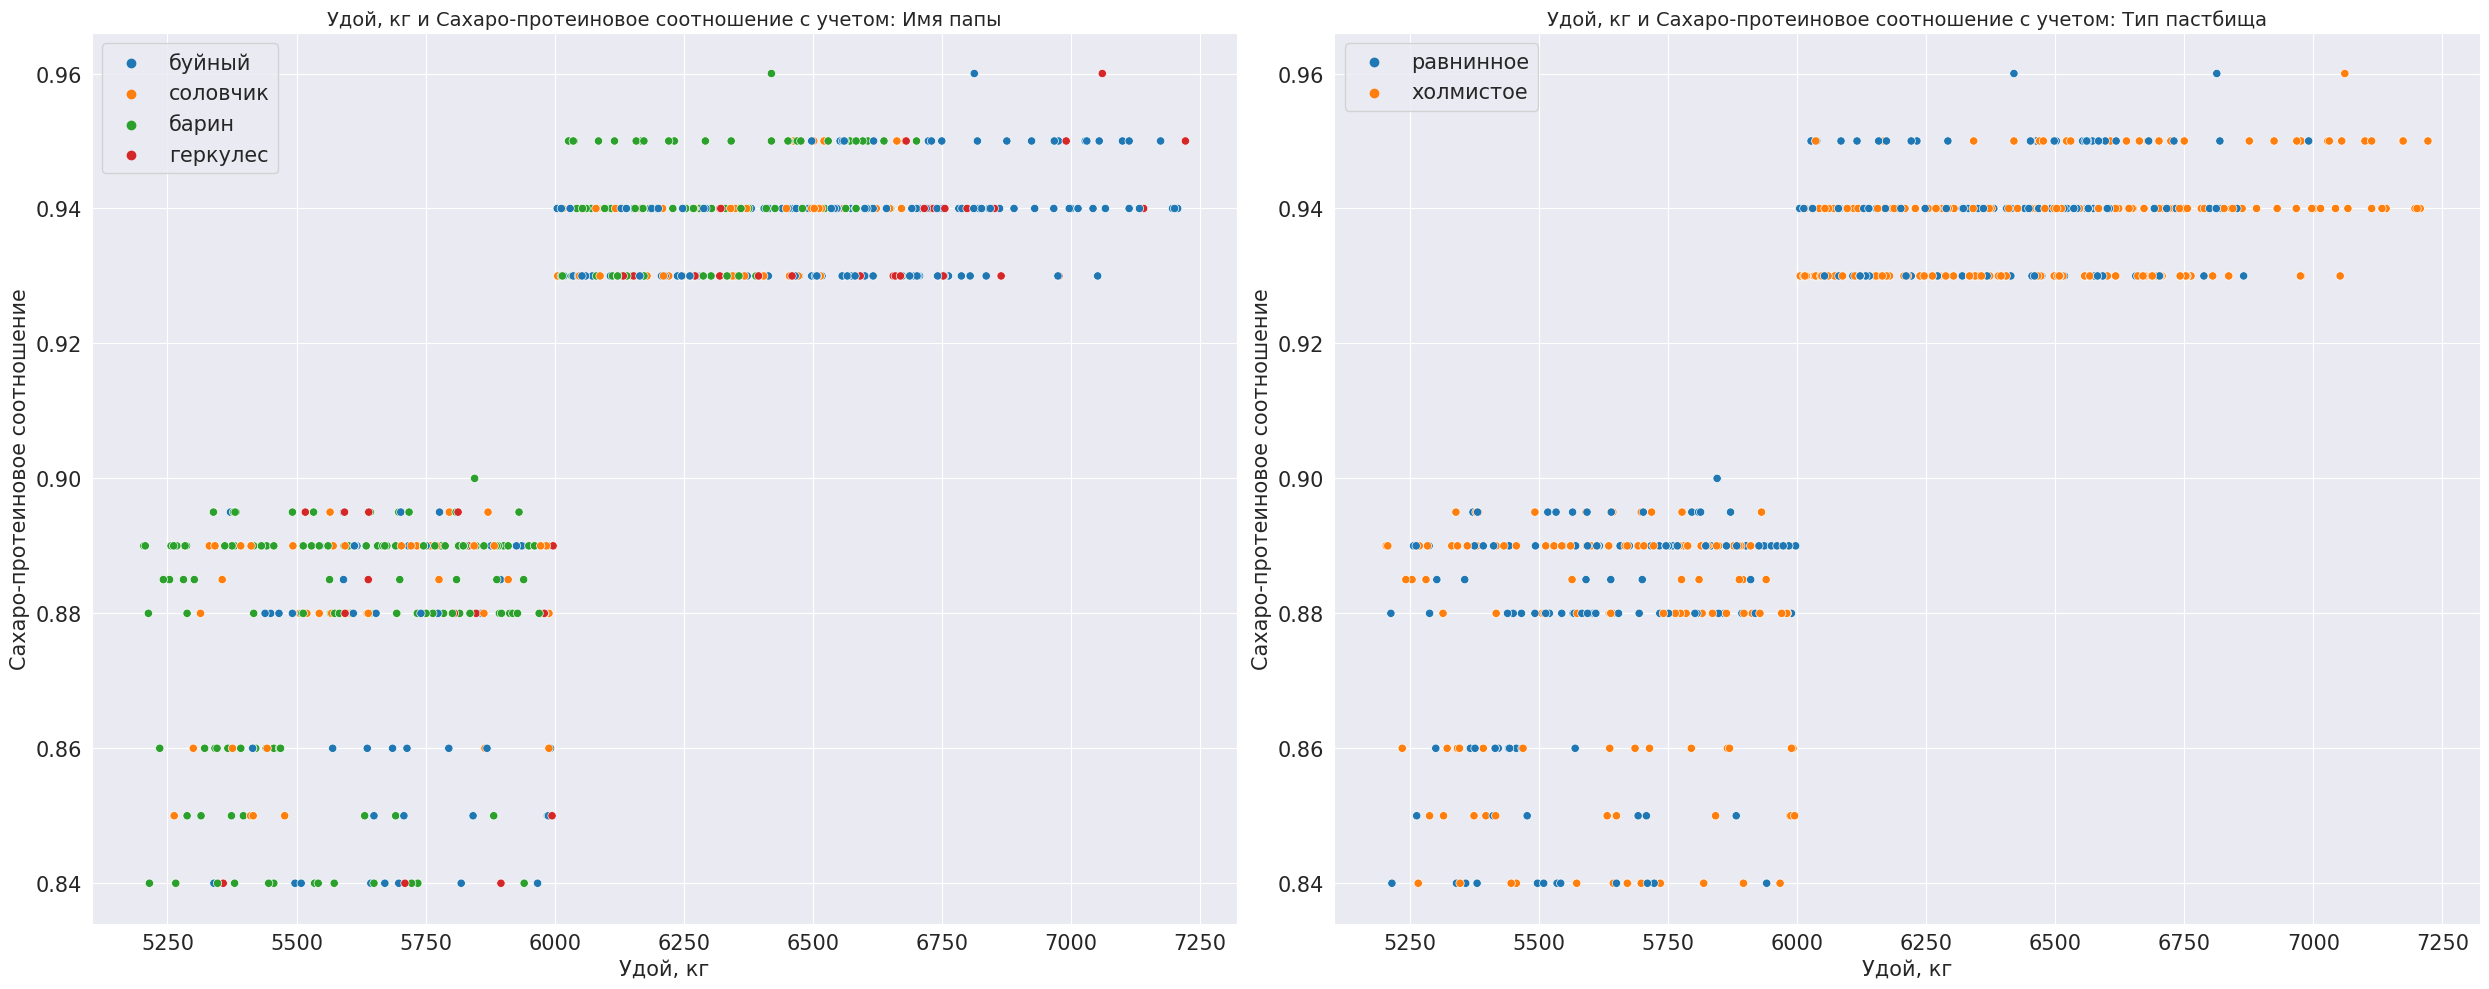

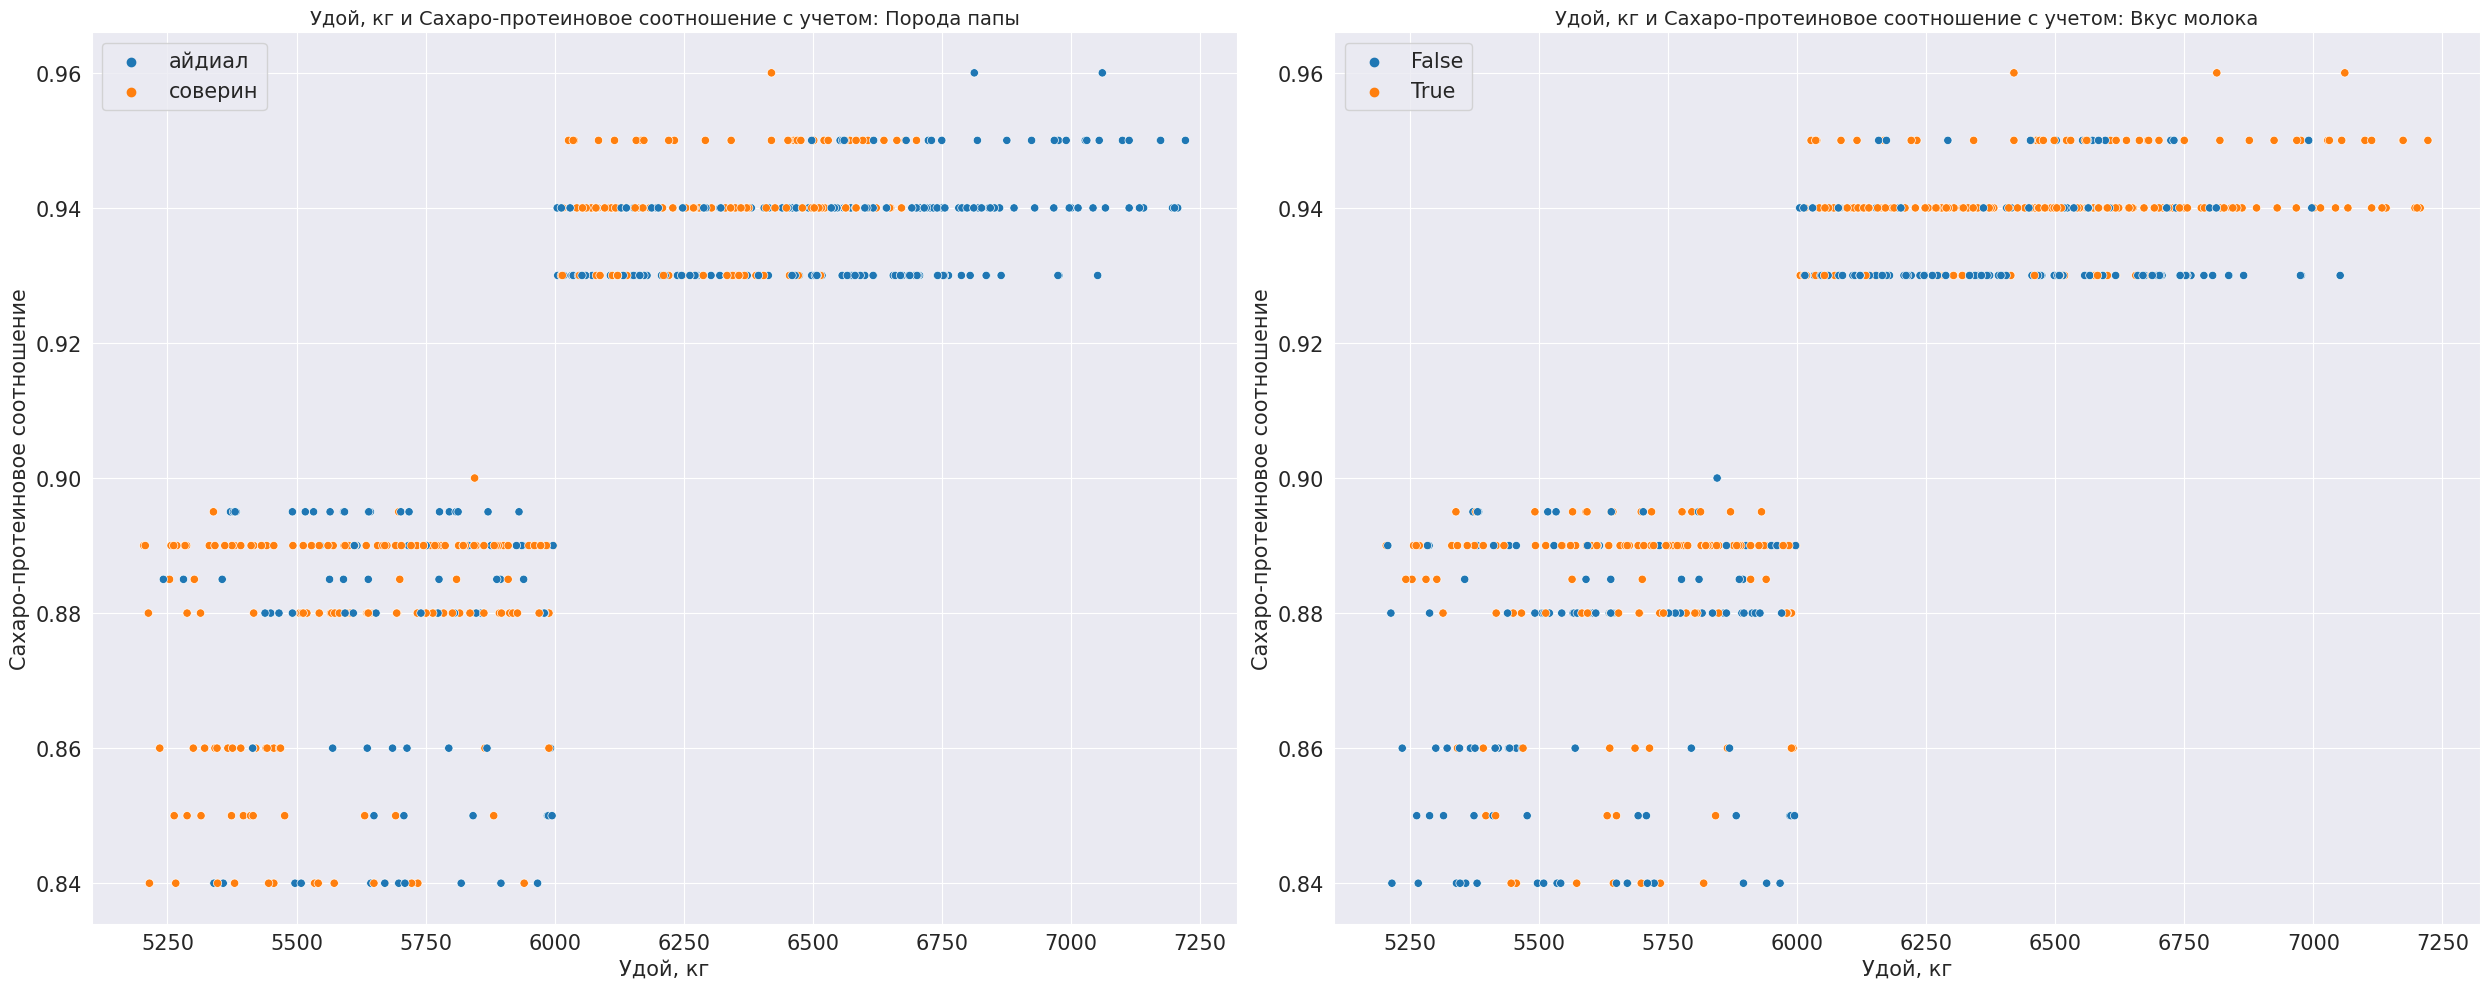

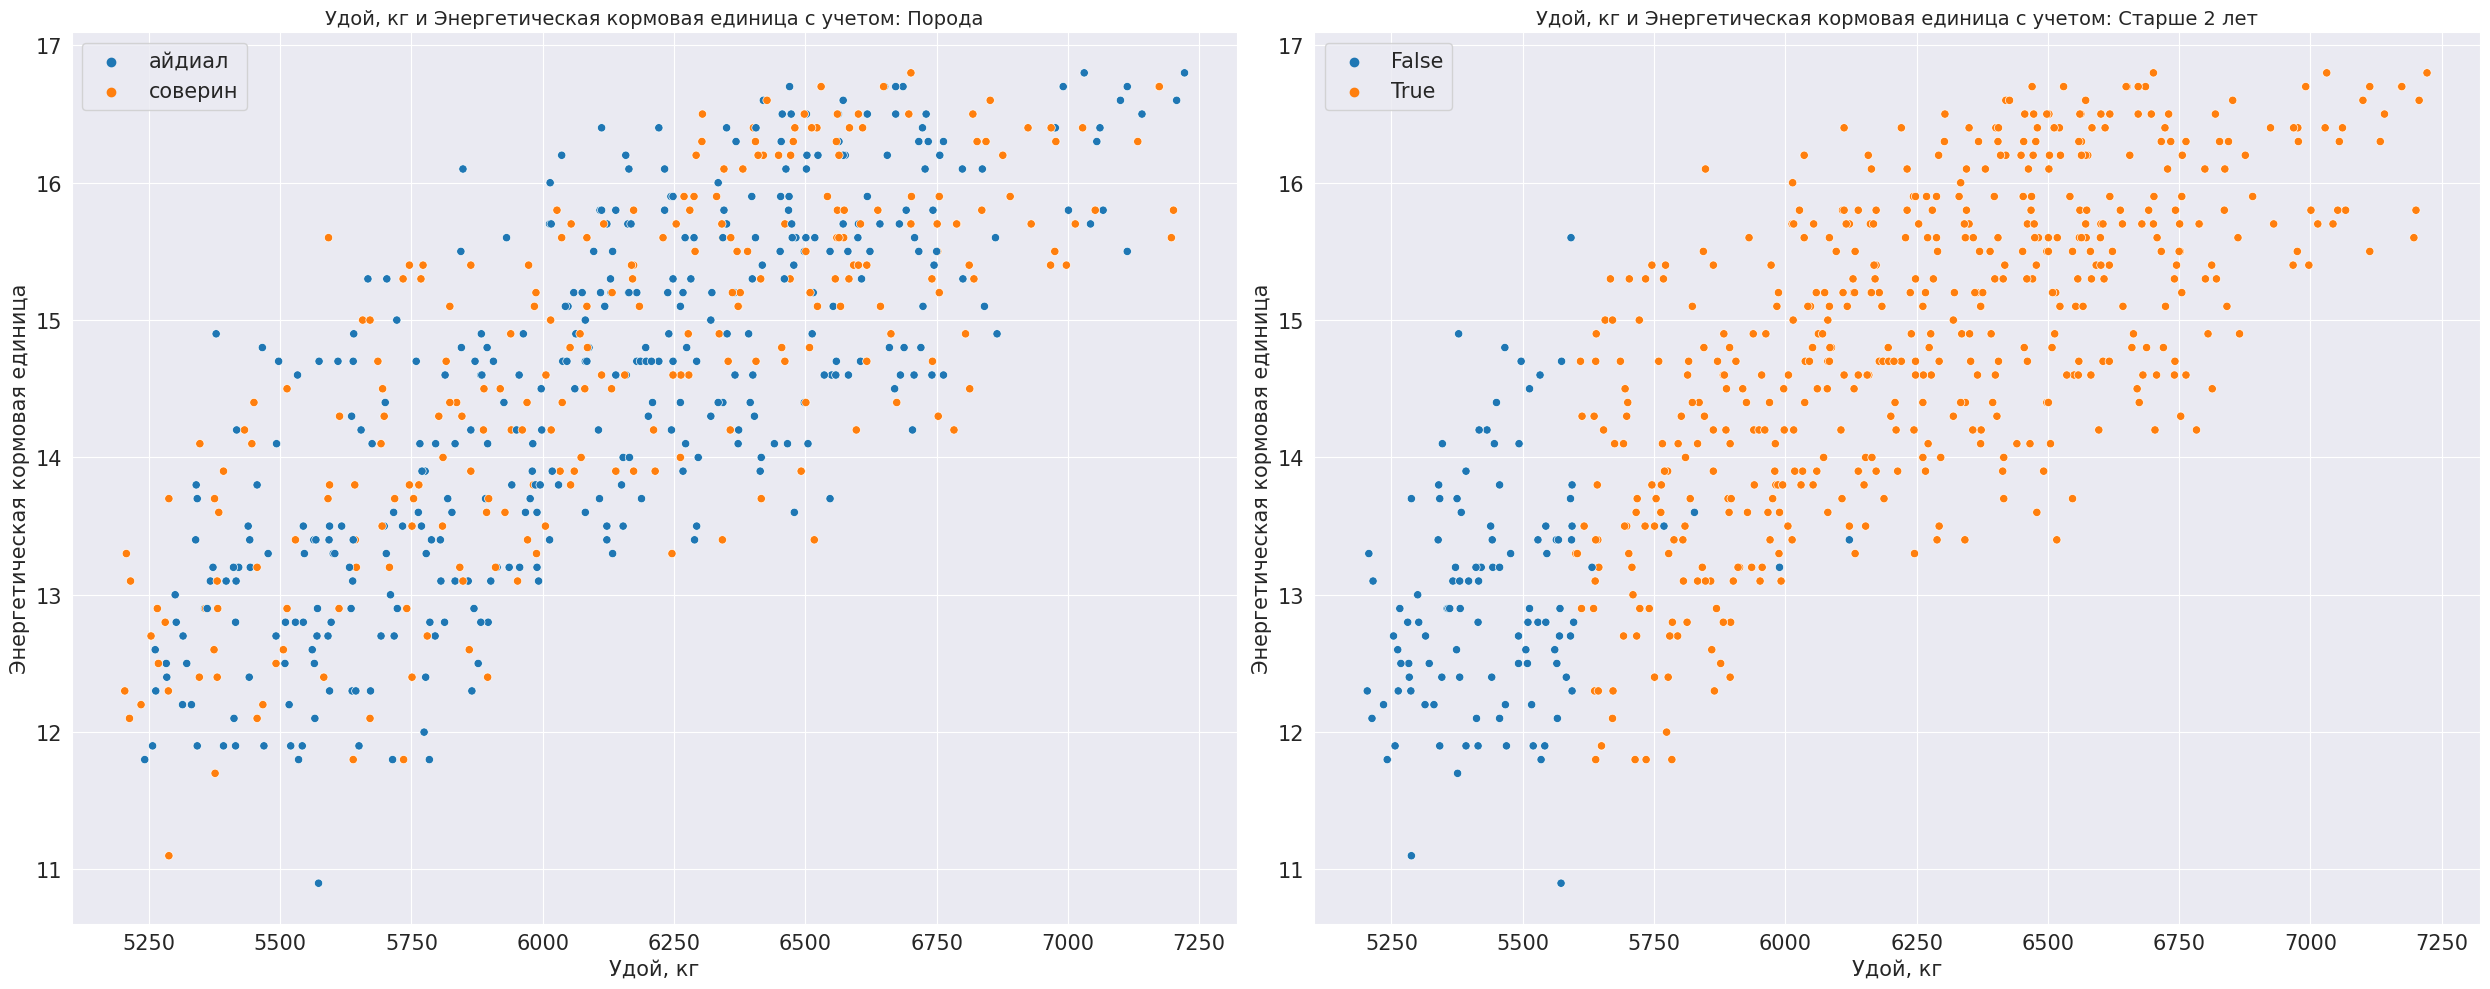

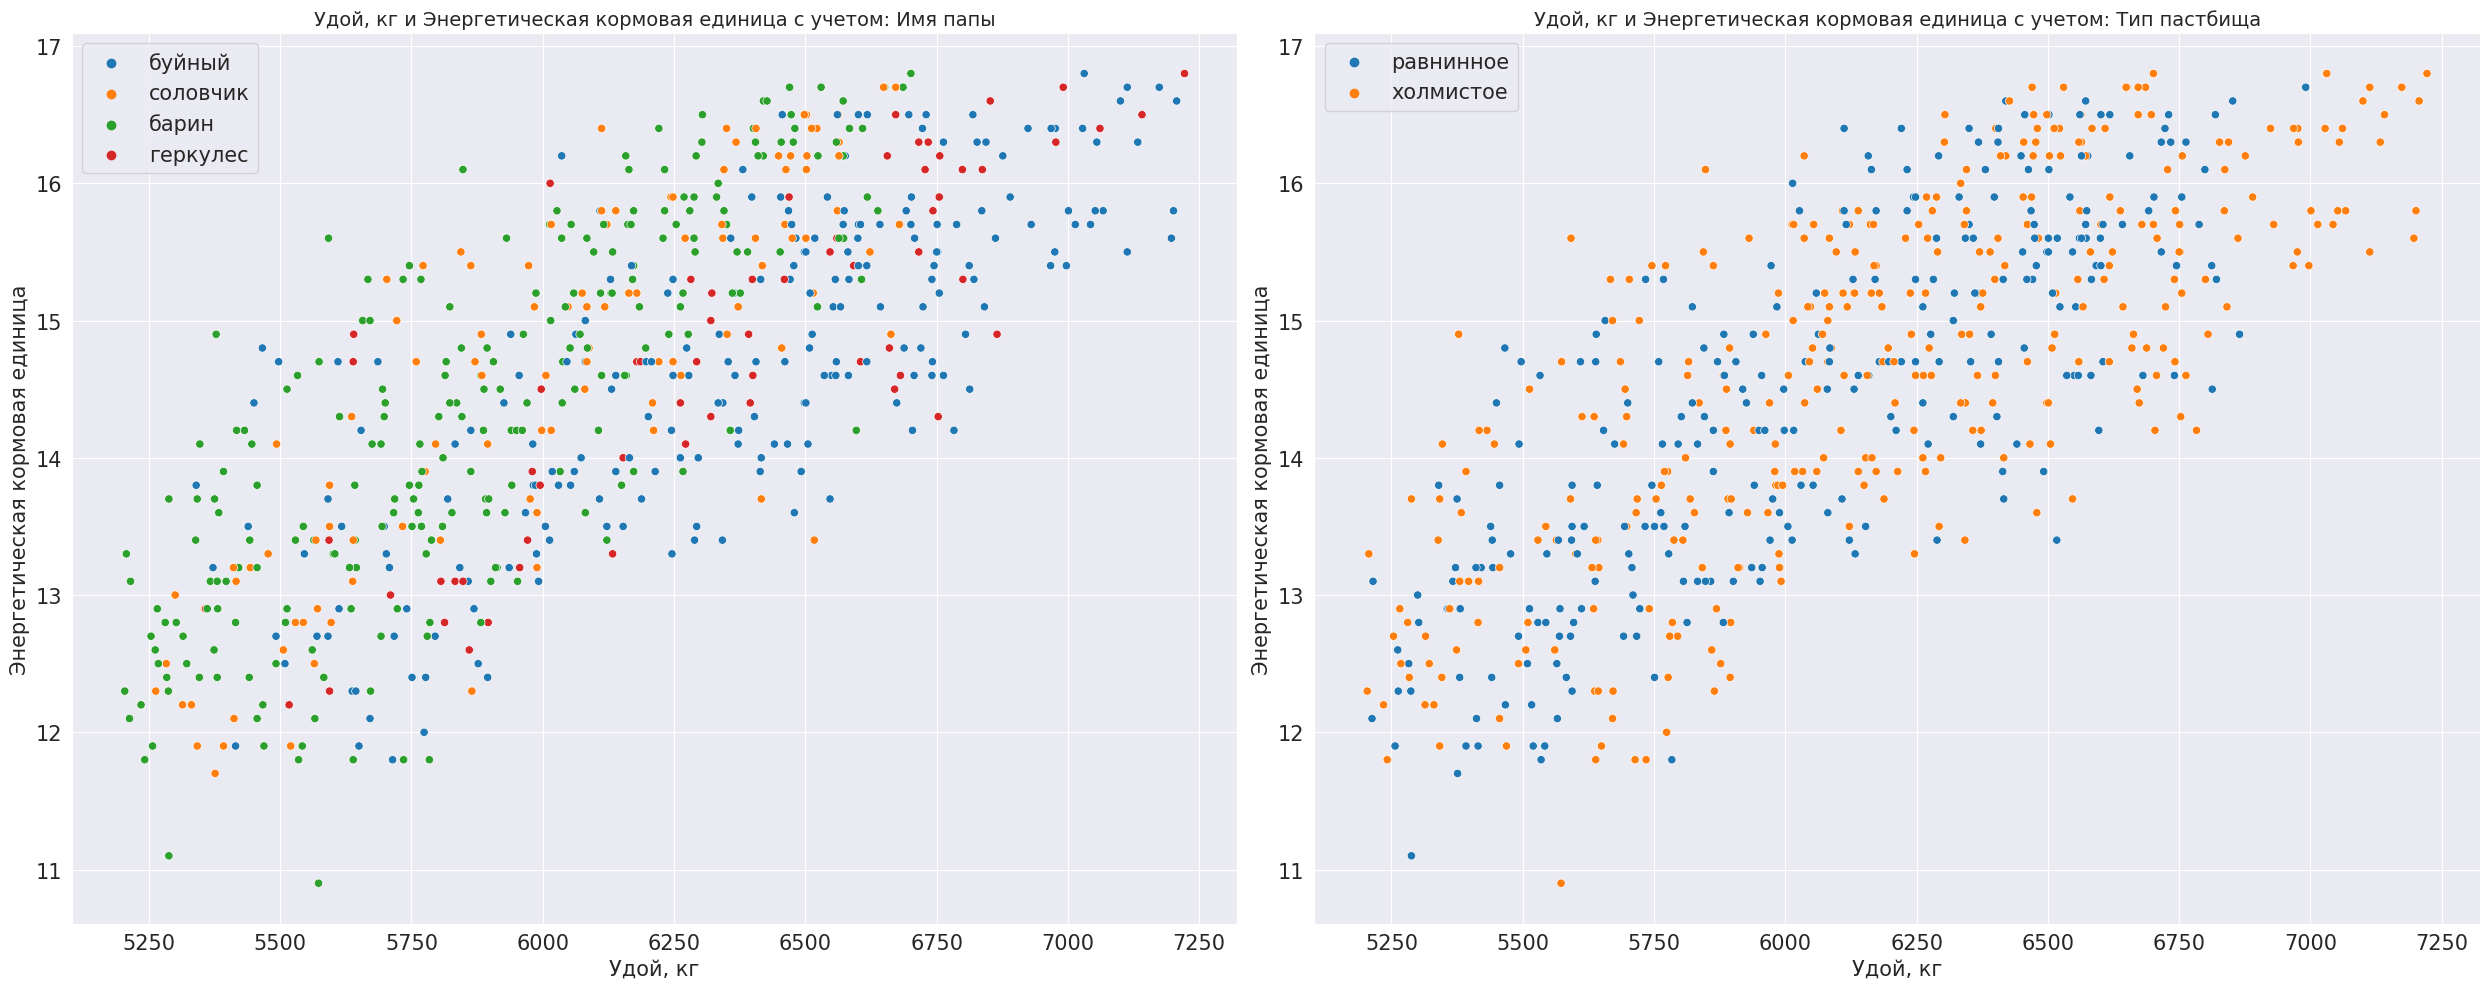

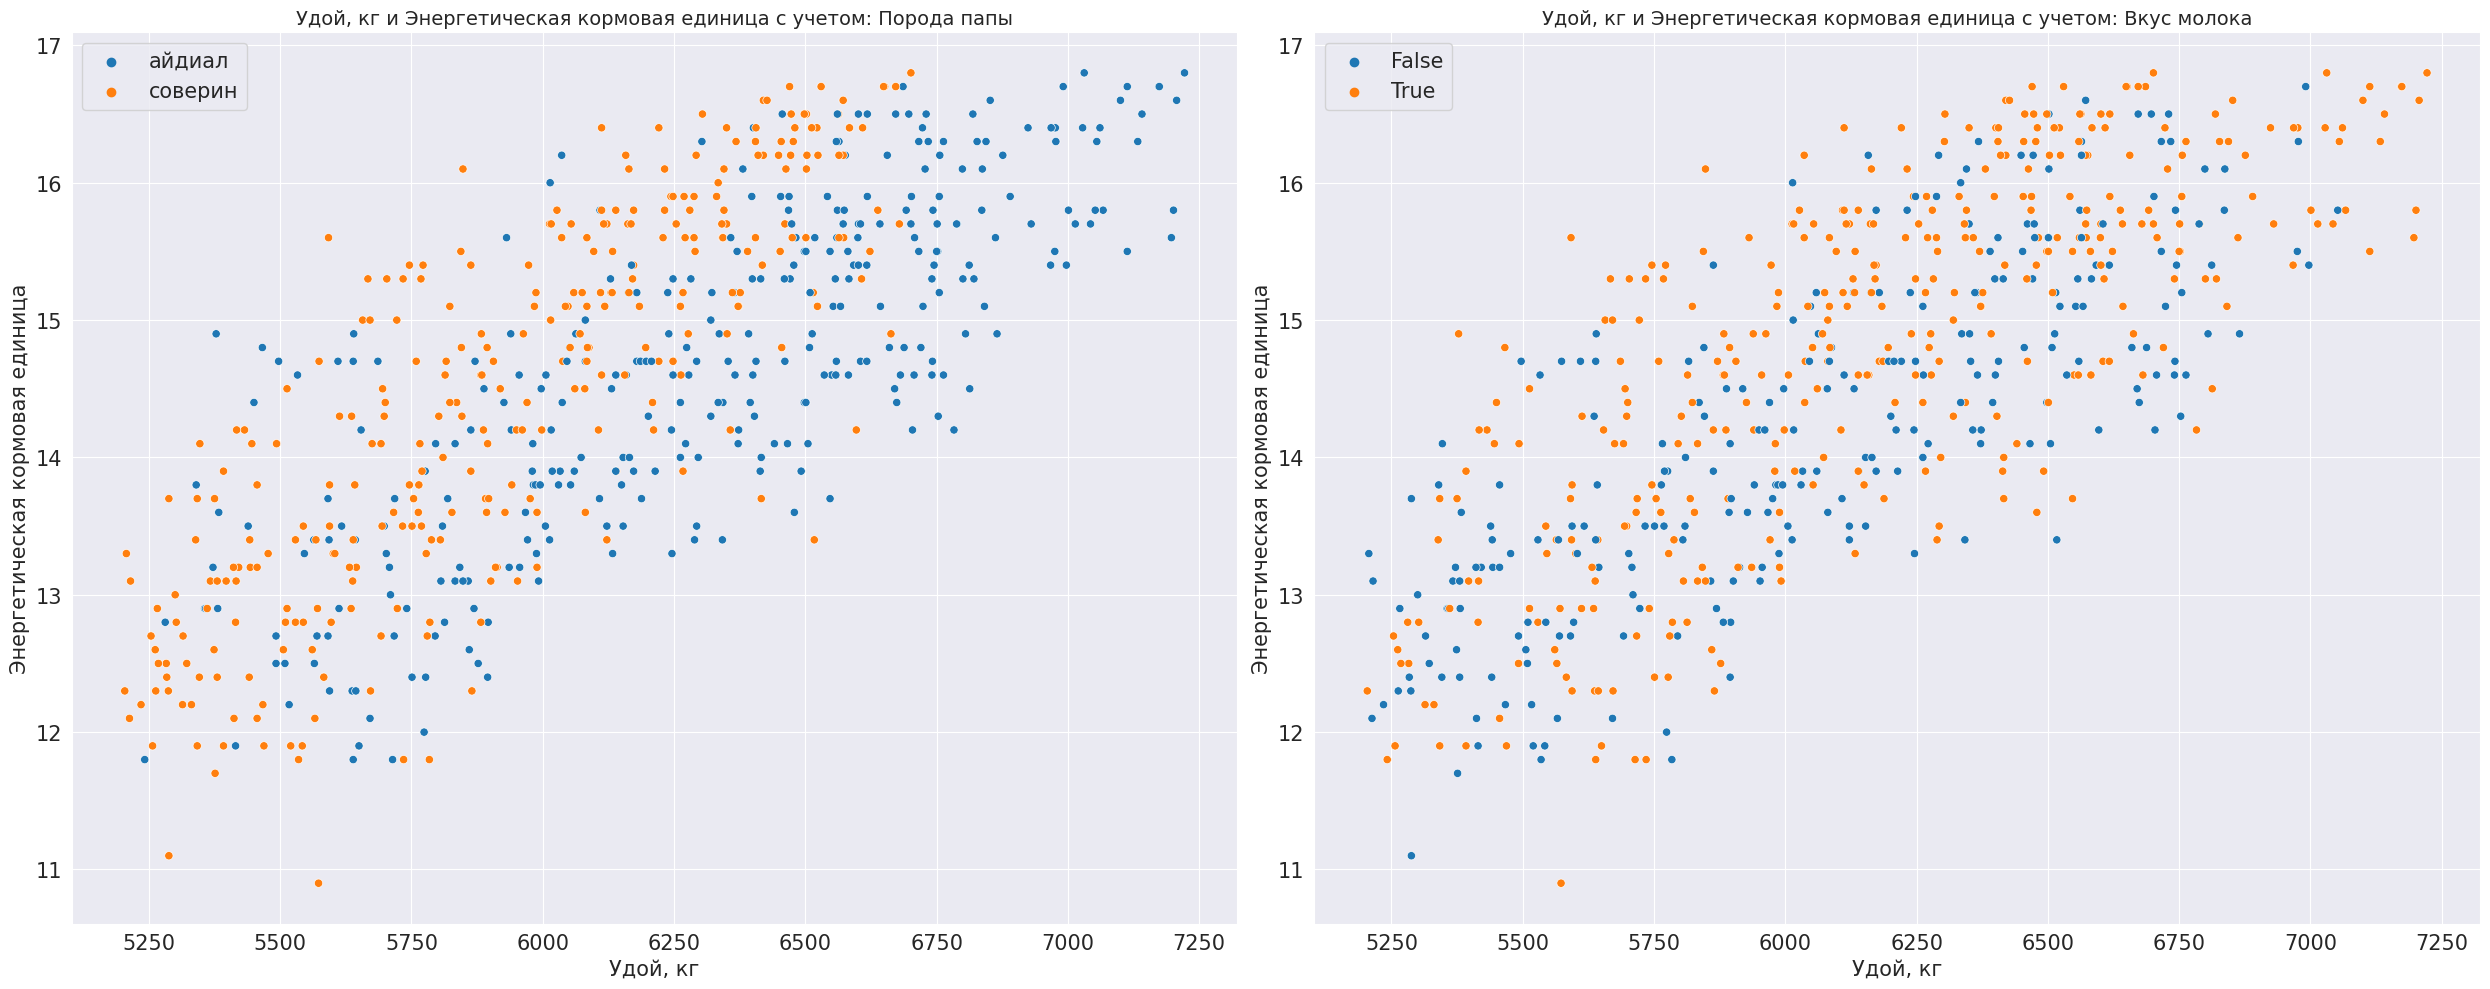

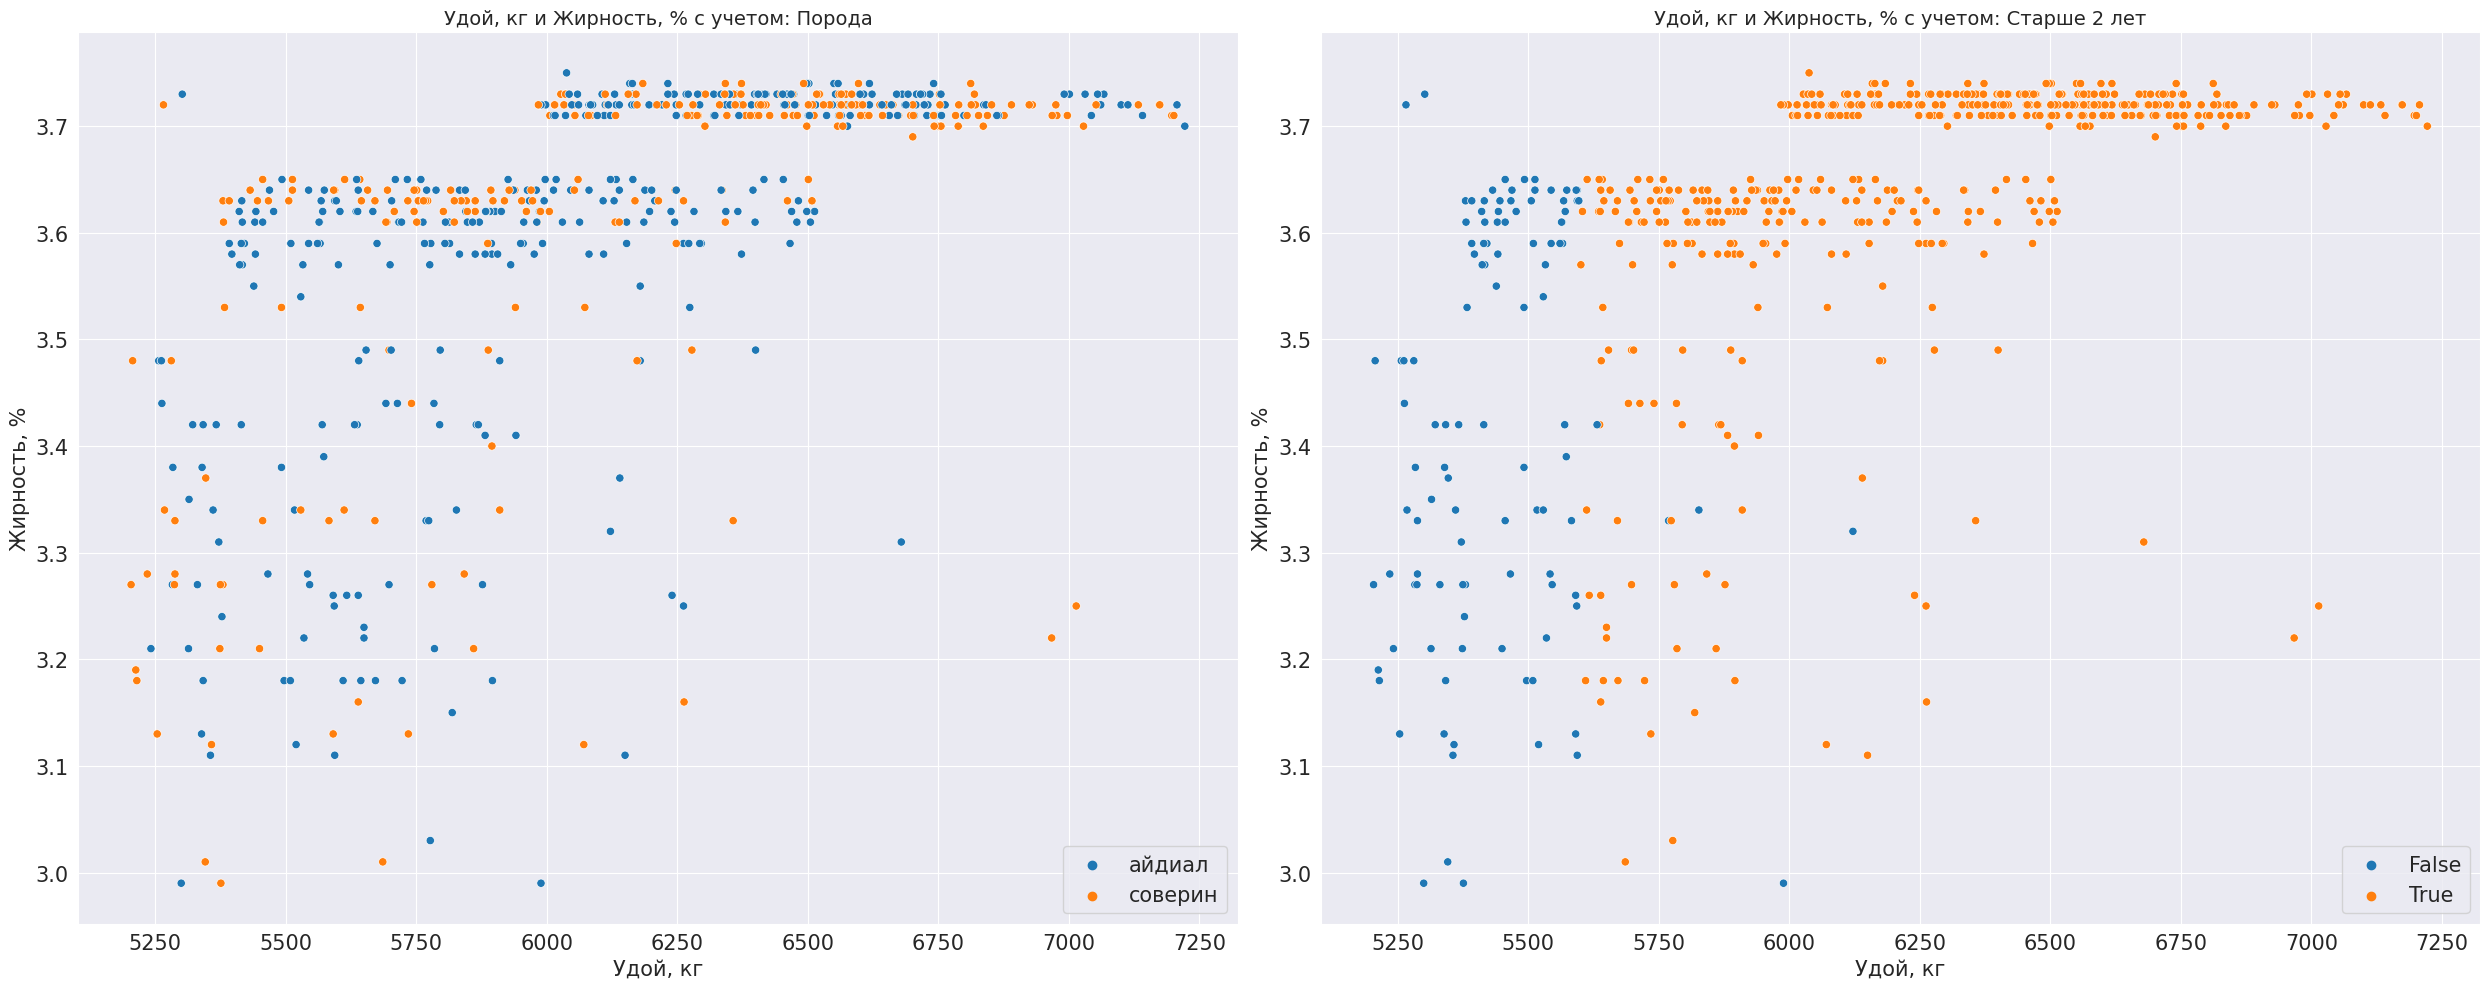

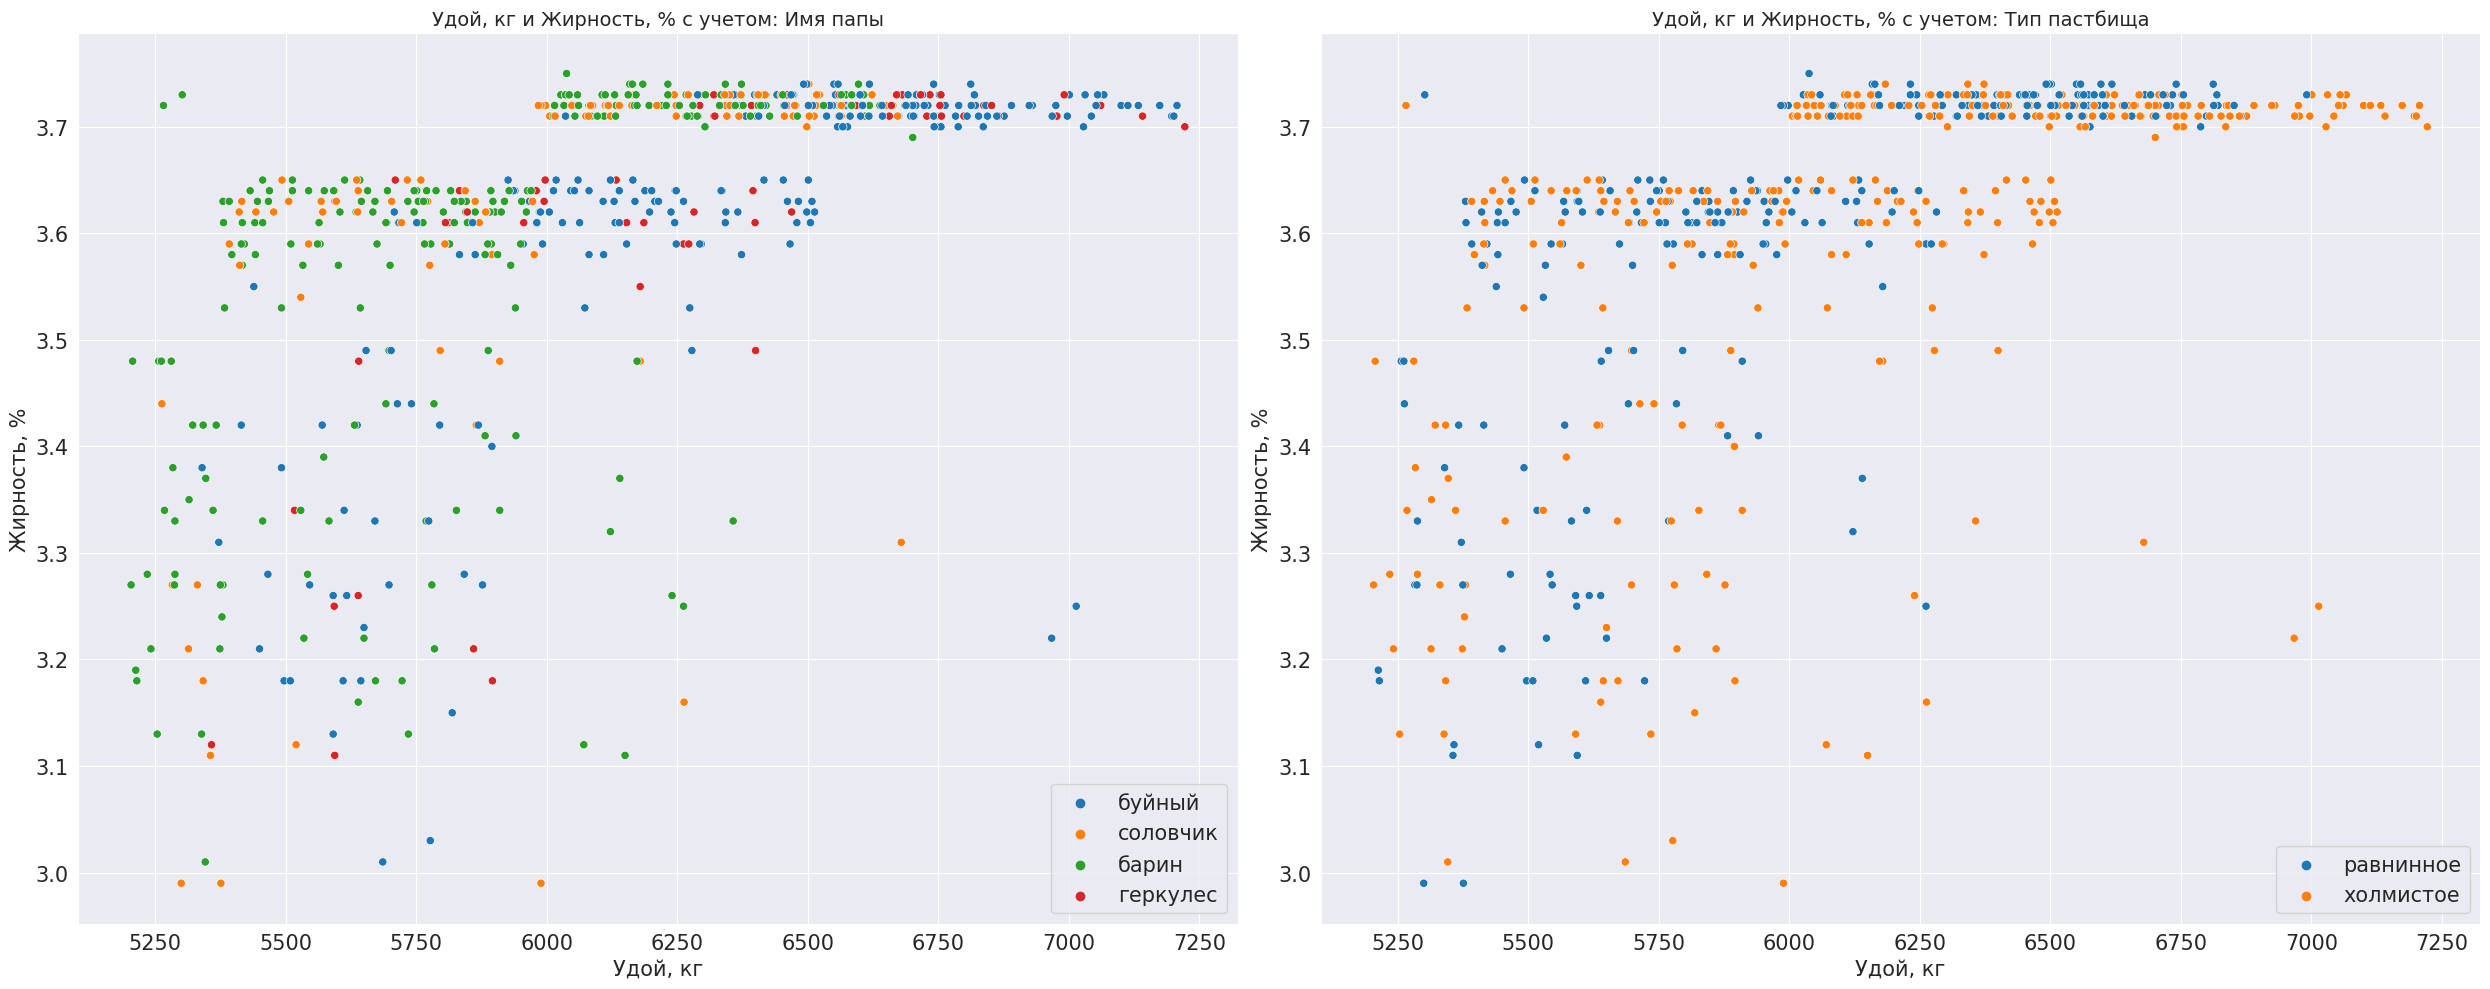

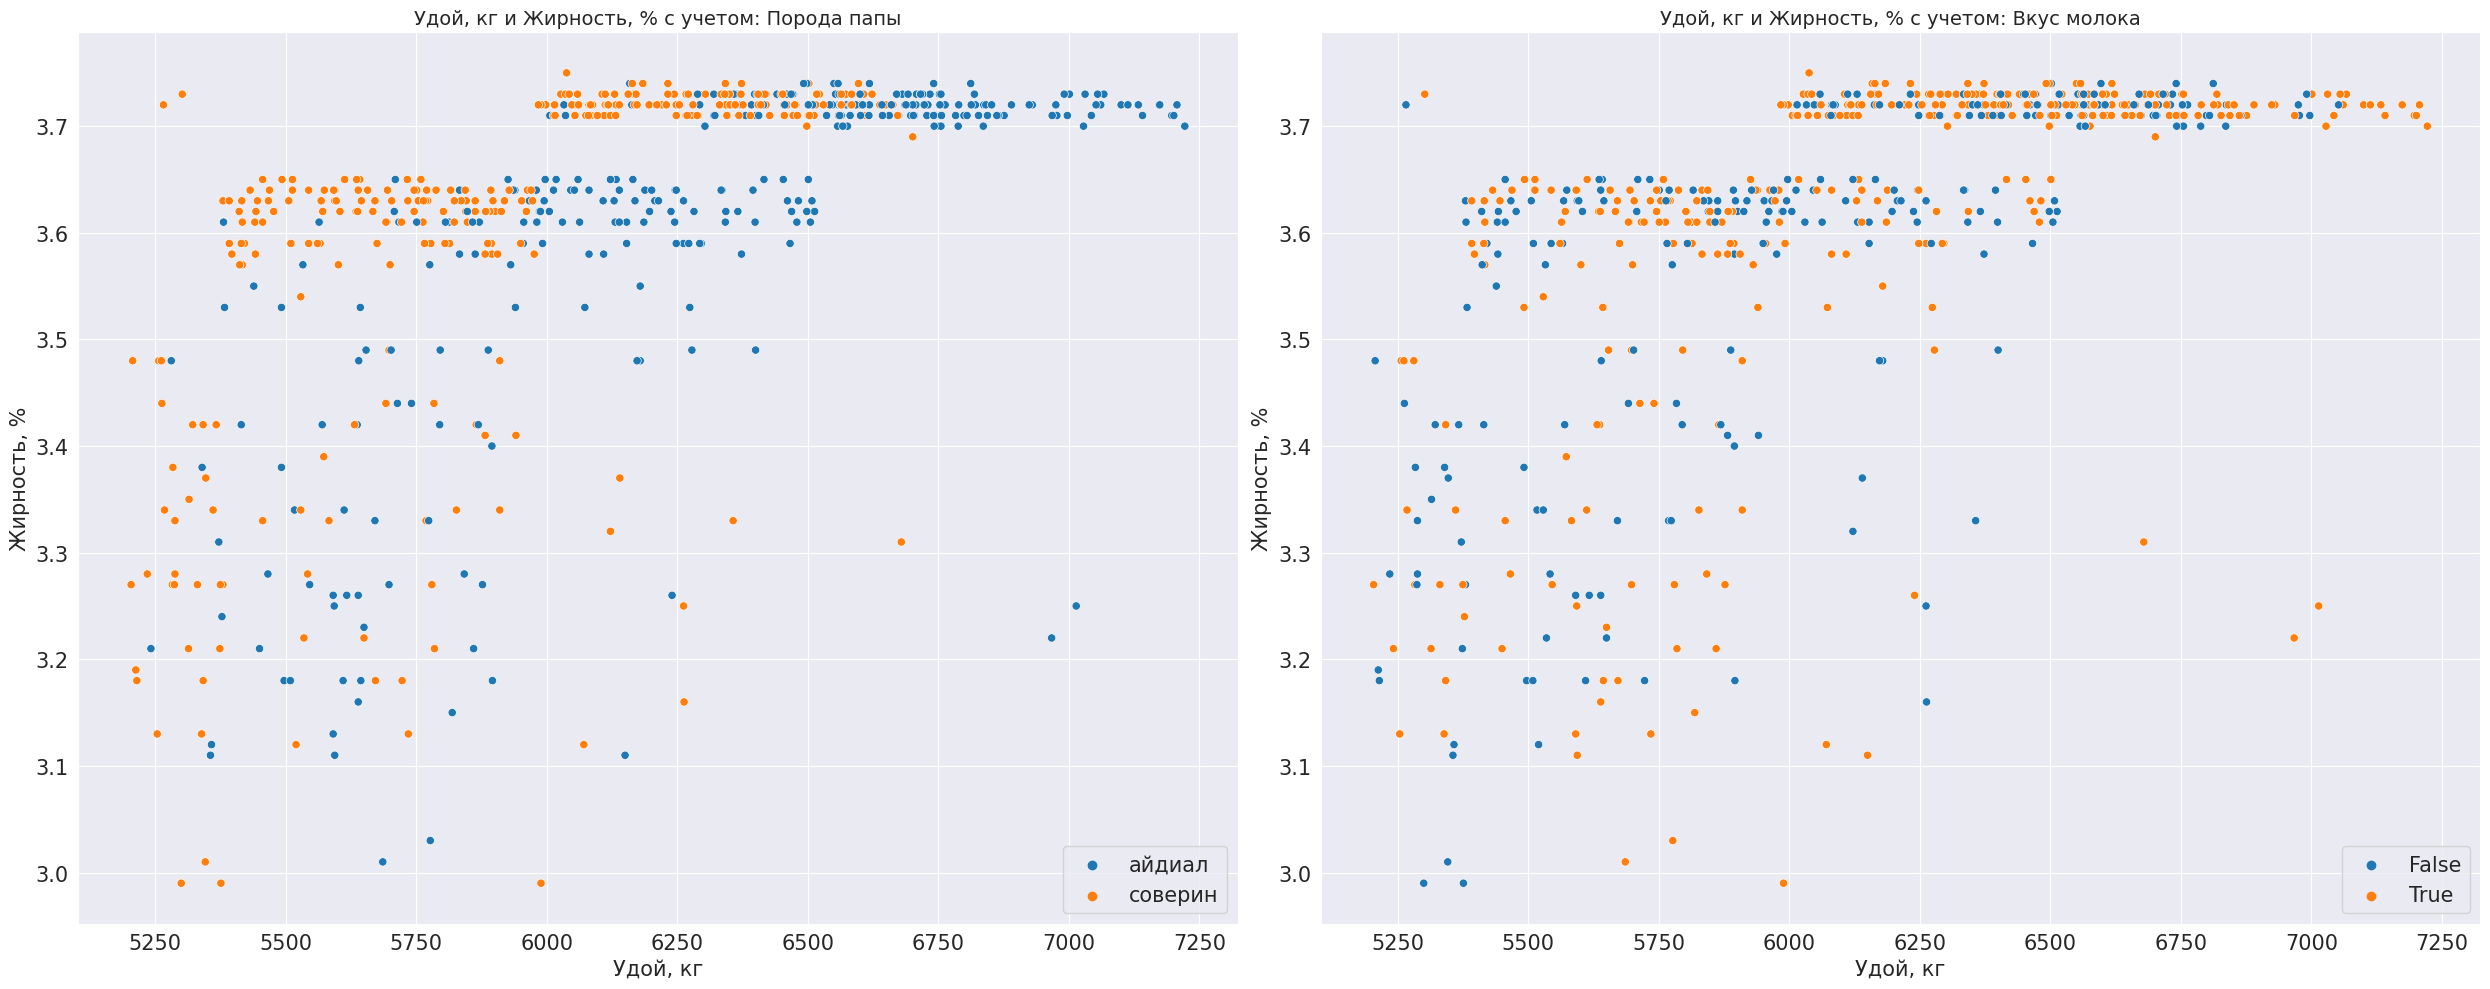

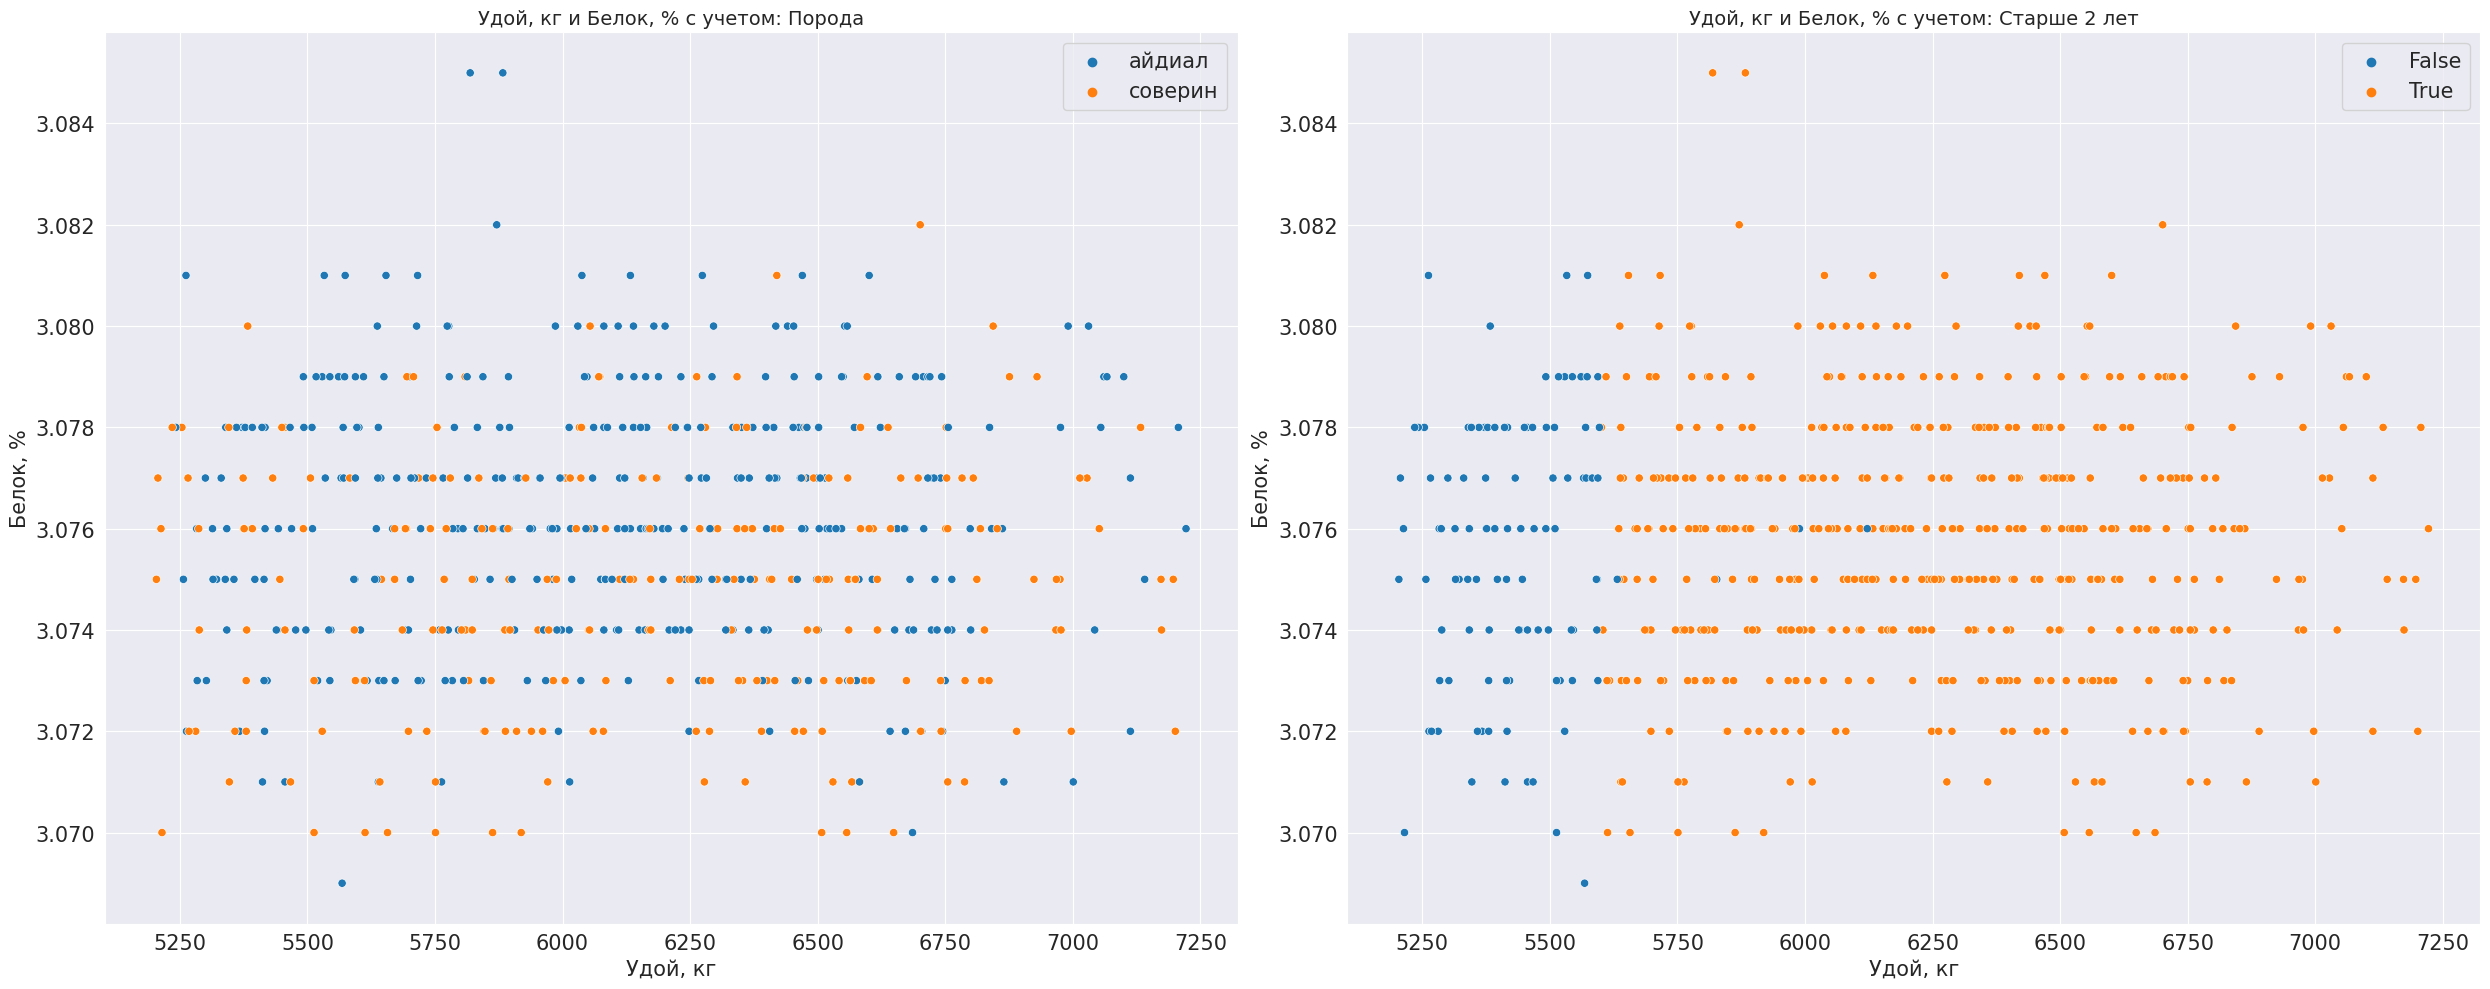

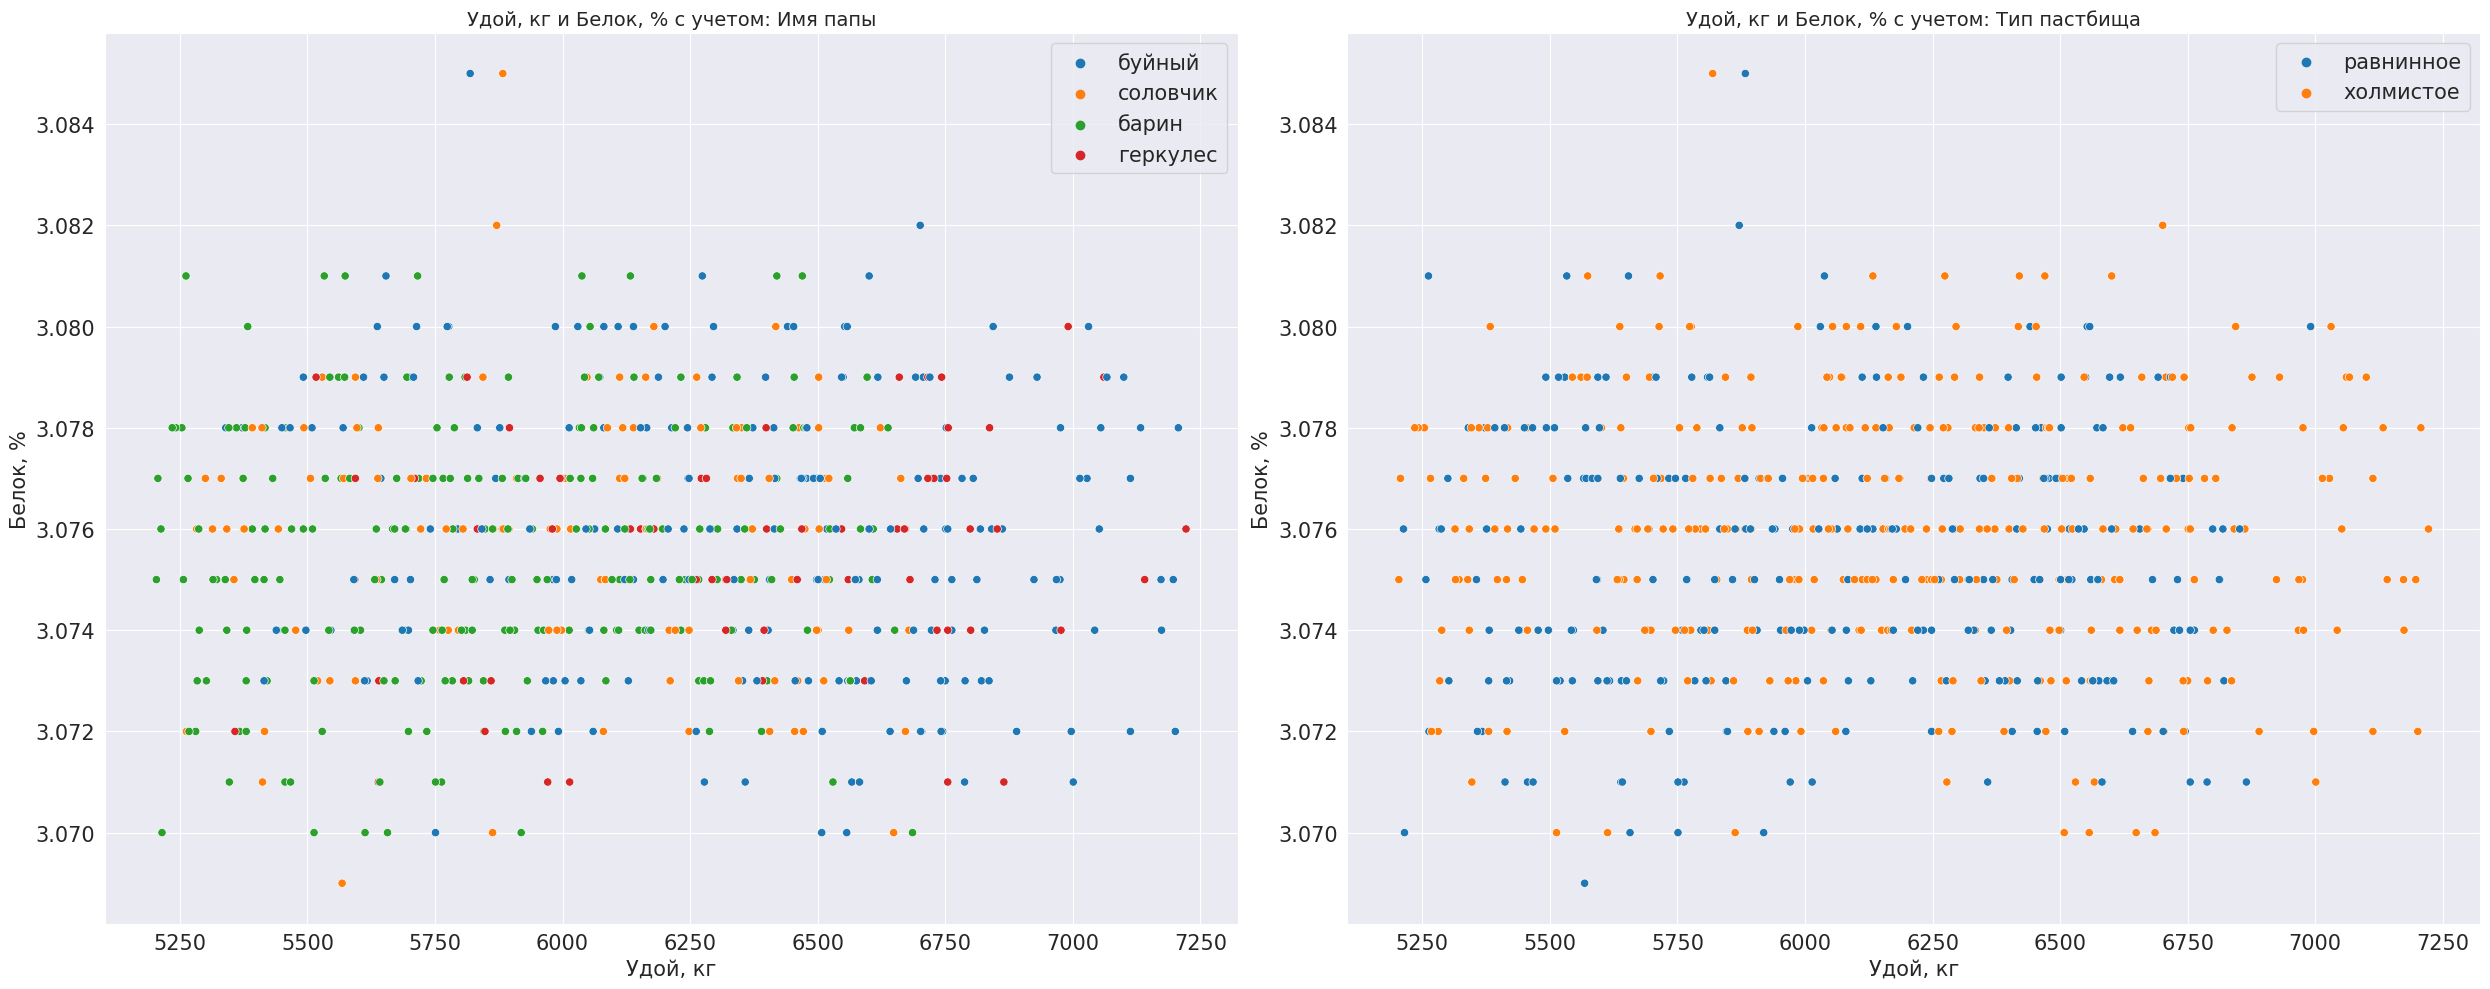

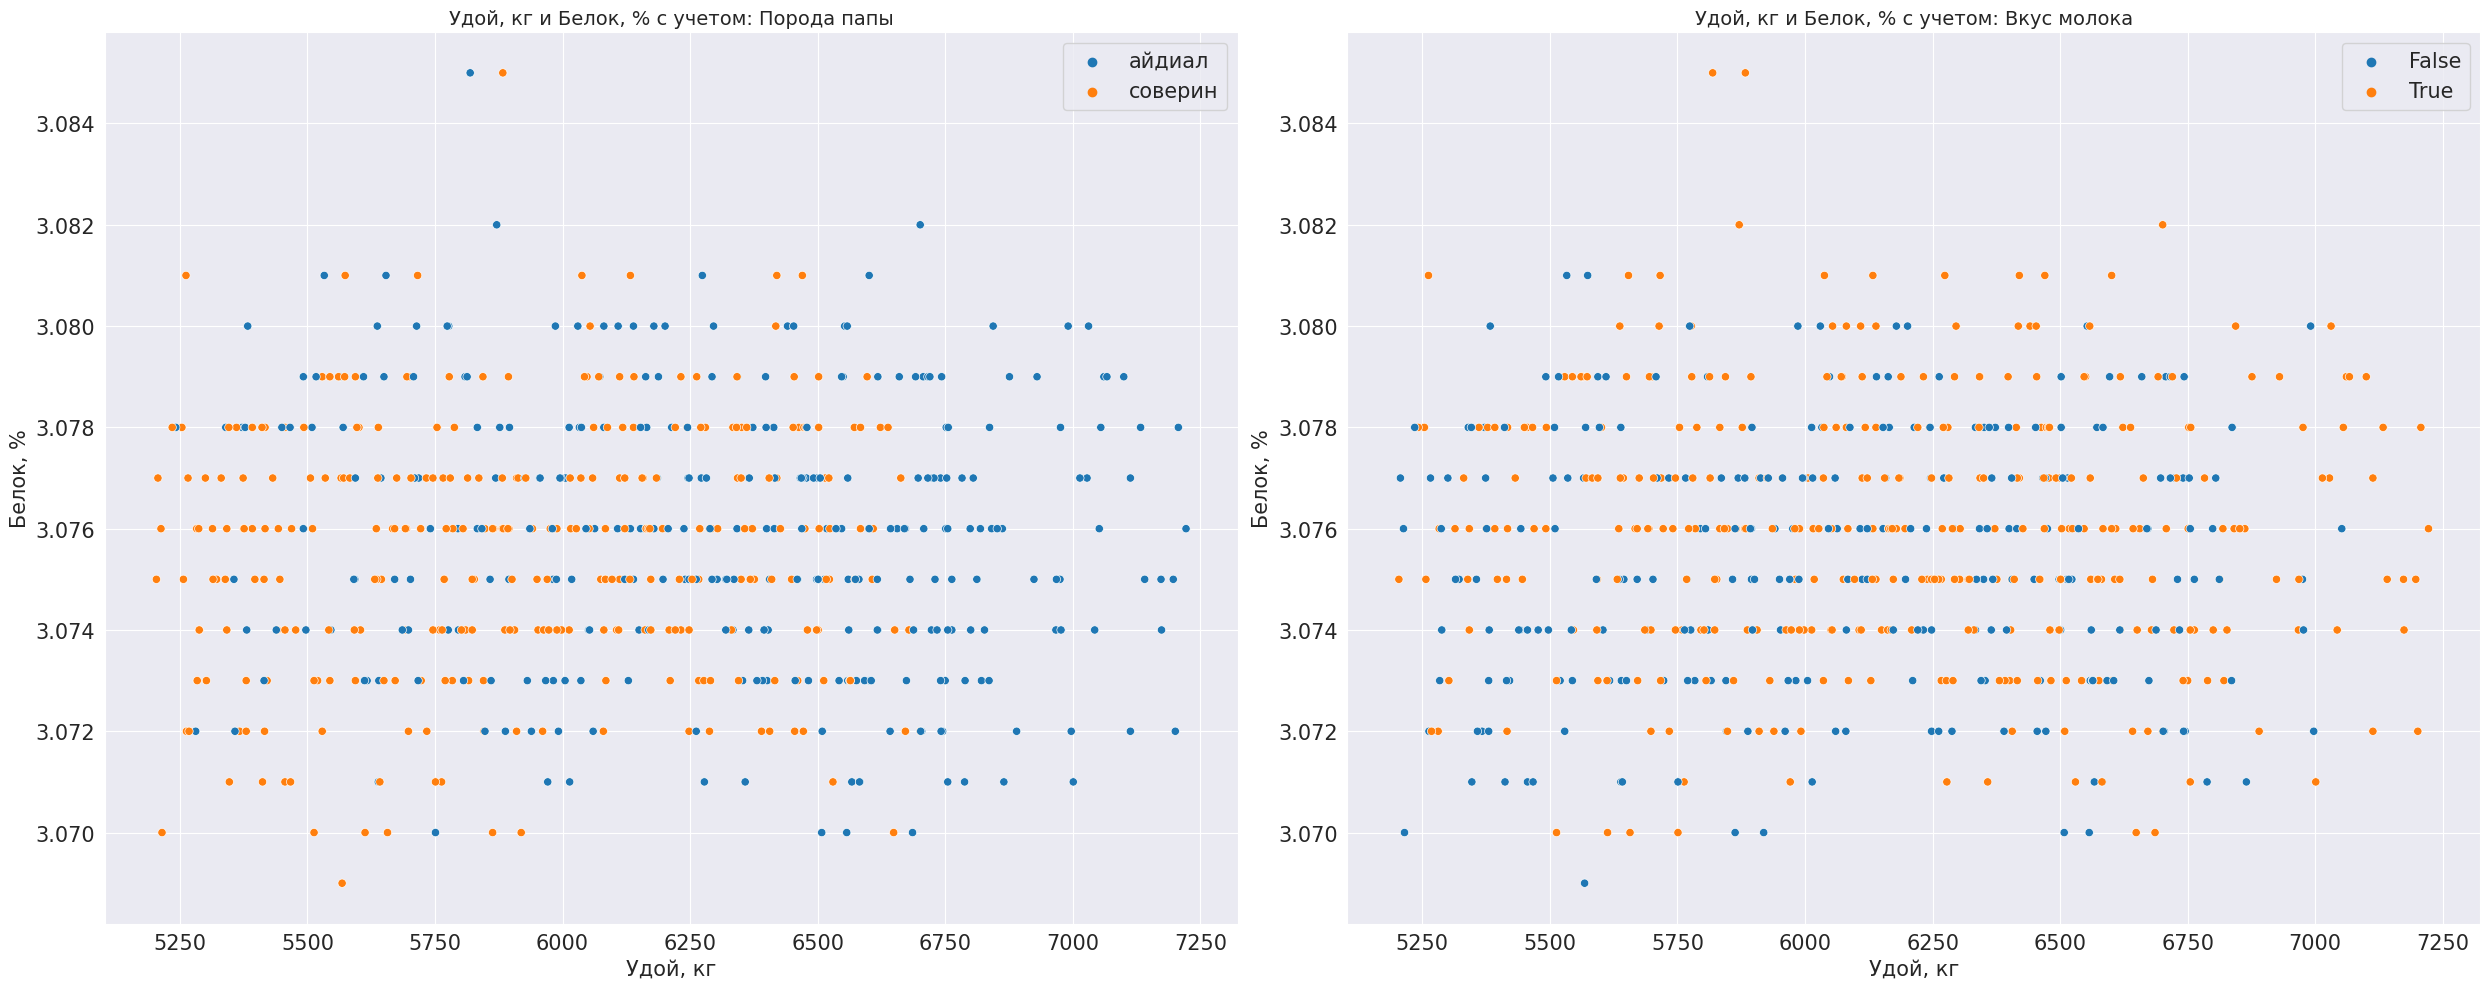

In [46]:
farm_main_numerical_features = ['raw_protein_g', 'sugar_protein_ratio', 'energy_feed_unit', 'fat_percentage', 'protein_percentage']
farm_main_categorical_features = ['cow_breed', 'over_2_years_old', 'dad_name', 'pasture_type', 'dad_cow_breed', 'is_milk_tasty']

farm_main_numerical_features_rus = {'raw_protein_g': 'Сырой протеин, г', 'sugar_protein_ratio': 'Сахаро-протеиновое соотношение', 'energy_feed_unit': 'Энергетическая кормовая единица', 'fat_percentage': 'Жирность, %', 'protein_percentage': 'Белок, %'}
farm_main_categorical_features_rus = {'cow_breed': 'Порода', 'over_2_years_old': 'Старше 2 лет', 'dad_name': 'Имя папы', 'pasture_type': 'Тип пастбища', 'dad_cow_breed': 'Порода папы', 'is_milk_tasty': 'Вкус молока'}

for num_feature in farm_main_numerical_features:
    for i in range(0, len(farm_main_categorical_features), 2):
        fig, axs = plt.subplots(1, 2, figsize=(25, 10))
        for j, cat_feature in enumerate(farm_main_categorical_features[i:i+2]):
            if j < len(axs):
                sns.scatterplot(data=farm_main_data, x='milk_yield_kg', y=num_feature, hue=cat_feature, ax=axs[j])
                axs[j].set_title(f'Удой, кг и {farm_main_numerical_features_rus[num_feature]} с учетом: {farm_main_categorical_features_rus[cat_feature]}', fontsize=14)
                axs[j].set_xlabel('Удой, кг', fontsize=15)
                axs[j].set_ylabel(farm_main_numerical_features_rus[num_feature], fontsize=15)
                axs[j].grid(True)

                axs[j].legend(fontsize=15)
                axs[j].tick_params(labelsize=15)
                
        plt.tight_layout()
        plt.show()

### Вывод по корреляционному анализу признаков

Вывод по диаграммам рассеяния:
- Порода коровы не влияет на вид связи между удоем молока и количественными признаками.
- Возраст коровы уже влияет на вид связи, если корова старше двух лет, то удой молока увеличивается. Также корреляция между удоем молока и количественными признаками увеличивается, но на это конечно влияет и то, что коров старше двух лет значительно больше. Отмечу, что тип связи между удоем молока и белком в молоке у коров не меняется в зависимости от возраста.
- Имя папы коровы существенно не влияет на вид связи между удоем молока и количественными признаками.
- Тип пастбища также не влияет на вид связи между удоем молока и количественными признаками.
- Порода папы коровы не влияет на вид связи между удоем молока и количественными признаками, но видно, что если порода папы Айдиал, то удой молока увеличивается.
- Вкус молока не влияет на вид связи между удоем молока и количественными признаками.

Типы связей между удоем молока и количественными признаками:
- Сырой протеин, г - слабая линейная зависимость, отмечу, что если коровы младше двух лет, то зависимость становится квадратичной.
- Сахаро-протеиновое соотношение - сильная нелинейная зависимость, также из графика видно, что этот признак можно категоризировать на 2 группы.
- Энергетическая кормовая единица - сильная квадратичная зависимость, это можно увидеть на графике, который больше напоминает параболу.
- Жирность, % - средняя нелинейная зависимость, признак можно категоризировать на 2 группы.
- Белок, % - зависимость отсутствует.

Мультиколлинеарность наблюдается между сахаро-протеиновым соотношением и энергетической кормовой единицей - это подтверждается тем, что в обоих случаях там сильная корреляция с удоем. Это логично, так как чем больше сахара, тем больше энергии в корме.

## Обучение модели линейной регрессии

Для начала создам функцию, которая будет создавать модель линейной регрессии, обучать её и выводить метрики качества.

In [47]:
def make_linreg_model(data, category_features, num_features):
    features = category_features + num_features
    target = 'milk_yield_kg'
    
    X = data[features]
    y = data[target]
    RANDOM_STATE = 42
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
    
    preprocessor = make_column_transformer(
        (StandardScaler(), num_features),
        (OneHotEncoder(), category_features)
    )
    
    model = make_pipeline(preprocessor, LinearRegression())
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    return model, y_test, y_pred

def calc_quality_metrics(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    print(f'R^2 score: {r2}')
    print(f'MSE: {mse}')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    
    _, axs = plt.subplots(1, 2, figsize=(15, 6))
    
    
    sns.scatterplot(x=y_pred, y=y_test - y_pred, ax=axs[0])
    axs[0].hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r')
    axs[0].set_xlabel('Прогнозные значения', fontsize=14)
    axs[0].set_ylabel('Остатки', fontsize=14)
    axs[0].set_title('Остатки модели', fontsize=16)
    axs[0].grid(True)
    
    sns.histplot(y_test - y_pred, bins=20, edgecolor='black', kde=True, ax=axs[1])
    axs[1].set_title('Гистограмма остатков', fontsize=16)
    axs[1].axvline(0, color='r')
    axs[1].set_xlabel('Остатки', fontsize=14)
    axs[1].set_ylabel('Частота', fontsize=14)
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()

Начну с обучения модели линейной регрессии на датасете ferma_main.csv.

Целевым признаком будет `milk_yield_kg`, а признаками для обучения возьму:
- `energy_feed_unit` - энергетическая кормовая единица, так как это характеристика корма коровы, что по логике должно влиять на удой молока, так же мы видим высокую корреляцию удоя с этим признаком.
- `sugar_protein_ratio` - сахаро-протеиновое соотношение характеристика корма коровы, что опять же должно влиять на удой молока, так же мы видим высокую корреляцию удоя с этим признаком.
- `over_2_years_old` -  возраст коровы, так как по графикам видно, что если корова старше 2-ух лет, то удой молока увеличивается.

R^2 score: 0.7464062874203277
MSE: 51622.79509911058
MAE: 182.203526171091
RMSE: 227.2065032060275


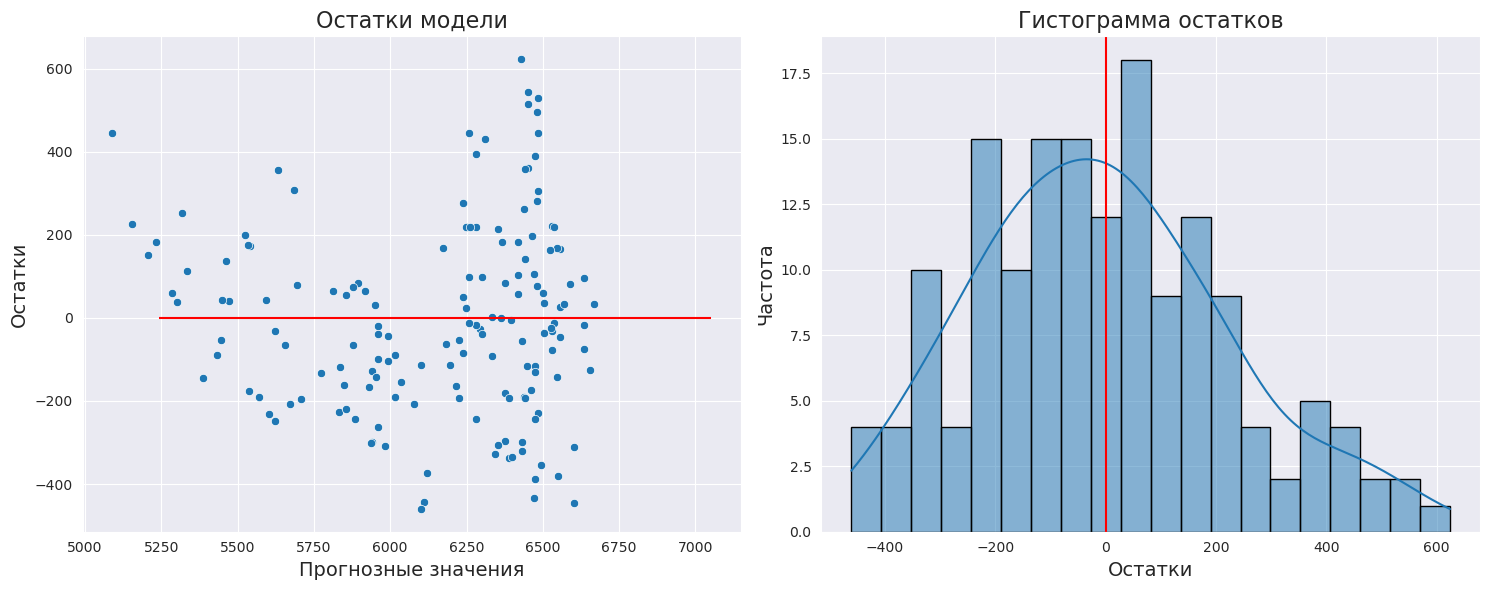

In [48]:
first_model, first_y_test, first_y_pred  = make_linreg_model(farm_main_data, category_features=['over_2_years_old'], num_features=['energy_feed_unit', 'sugar_protein_ratio'])

calc_quality_metrics(first_y_test, first_y_pred)

Первая модель линейной регрессии на датасете ferma_main.csv показала не самый выдающийся результат:
- R^2 score: ~0.75
- MSE: ~51623
- MAE: ~182
- RMSE: ~227
- Остатки модели распределены равномерно относительно нуля до значения 6000, затем дисперсия остатков немного увеличивается.
- Гистограмма остатков показывает, что остатки распределены с небольшим смещением вправо относительно нуля, что является негативным моментом.
- Считаю, что нужно посмотреть как будет вести себя модель при изменении параметров, например добавить категориальные признаки, которые влияют на удой молока.

Катетеризирую `sugar_protein_ratio` на 2 группы, чтобы улучшить качество признаков.

Если `sugar_protein_ratio` будет больше 0.92 (включительно), то это будет высокое значение, меньше 0.92 (не включительно) - низкое значение.

In [49]:
farm_main_data_new = farm_main_data.copy()

bins_sugar_protein_ratio = [0, 0.92, np.inf]
labels_sugar_protein_ratio = ['low', 'high']
farm_main_data_new['sugar_protein_ratio_cat'] = pd.cut(farm_main_data['sugar_protein_ratio'], bins=bins_sugar_protein_ratio, labels=labels_sugar_protein_ratio)

Проверю, что категоризация прошла успешно.
Для этого сгруппирую данные по новым категориям и выведу минимальное и максимальное значение признаков для каждой категории.

In [50]:
display(farm_main_data_new.groupby('sugar_protein_ratio_cat')['sugar_protein_ratio'].agg(['min', 'max']))

min   max
sugar_protein_ratio_cat            
low                      0.84  0.90
high                     0.93  0.96

Так как энергетическая кормовая единица связано нелинейно, а квадратично с удоем молока, то можно возвести признак в квадрат и качество модели должно улучшиться.

In [51]:
farm_main_data_new['energy_feed_unit_squared'] = farm_main_data['energy_feed_unit'] ** 2

Проверю, что признак возвёлся в квадрат успешно.

In [52]:
farm_main_data_new[['energy_feed_unit', 'energy_feed_unit_squared']].head()

energy_feed_unit  energy_feed_unit_squared
0              14.2                    201.64
1              12.8                    163.84
2              14.0                    196.00
3              12.4                    153.76
4              12.8                    163.84

Теперь обучу модель линейной регрессии на датасете ferma_main.csv с новыми признаками.

R^2 score: 0.7938029369105533
MSE: 41974.497828137915
MAE: 160.1973149872863
RMSE: 204.87678694312325


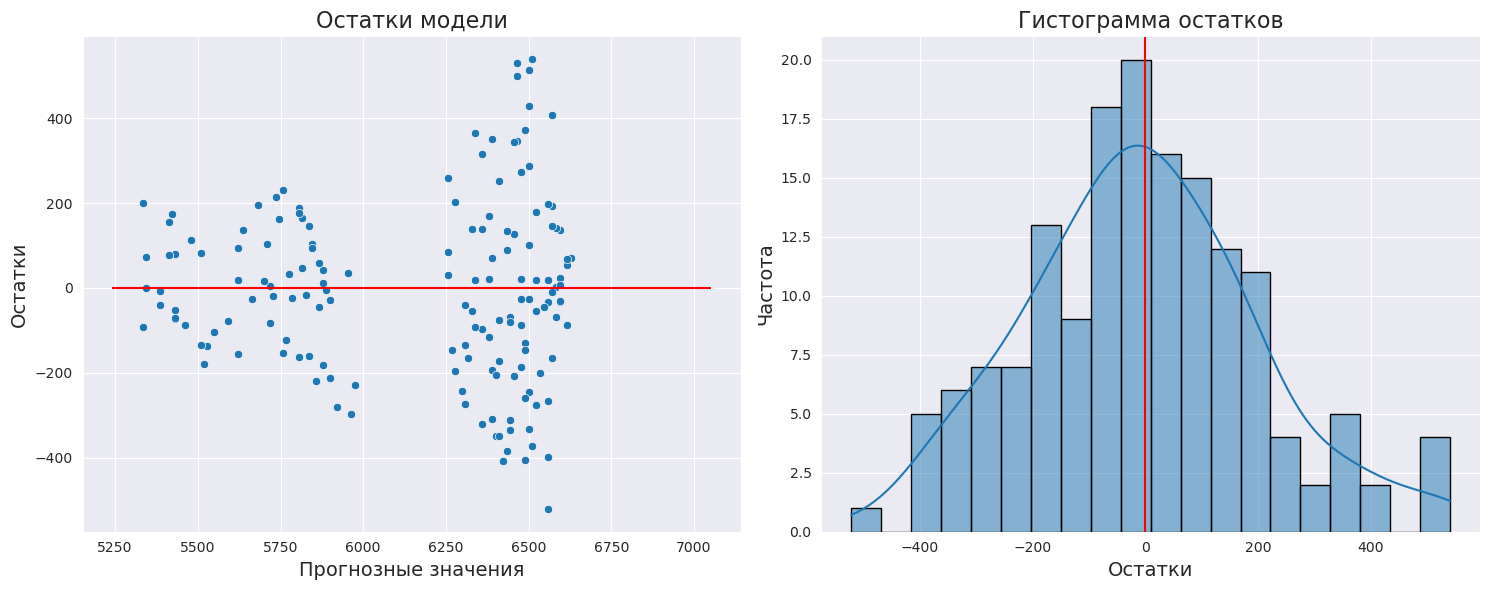

In [53]:
second_model, second_y_test, second_y_pred = make_linreg_model(farm_main_data_new, category_features=['over_2_years_old', 'sugar_protein_ratio_cat'], num_features=['energy_feed_unit_squared'])

calc_quality_metrics(second_y_test, second_y_pred)

Вторая модель линейной регрессии на датасете ferma_main.csv показала результат получше, чем первая:
- R^2 score: ~0.79
- MSE: ~41974
- MAE: ~160
- RMSE: ~205
- Остатки модели распределены равномерно относительно нуля до значения 6000, затем дисперсия остатков увеличивается, разброс становится похож на рупор, что плохо. Изменения не пошли на пользу для данного графика.
- Гистограмма остатков стала, наоборот, лучше, распределение нормальное, но есть небольшое количество выбросов, как слева, так и справа. Но это уже лучше, чем было.

Попробую добавить новый категориальный признак `dad_name` и посмотрю, как это повлияет на качество модели.

R^2 score: 0.8185094219643841
MSE: 36945.123075195464
MAE: 149.40119945336056
RMSE: 192.2111419122093


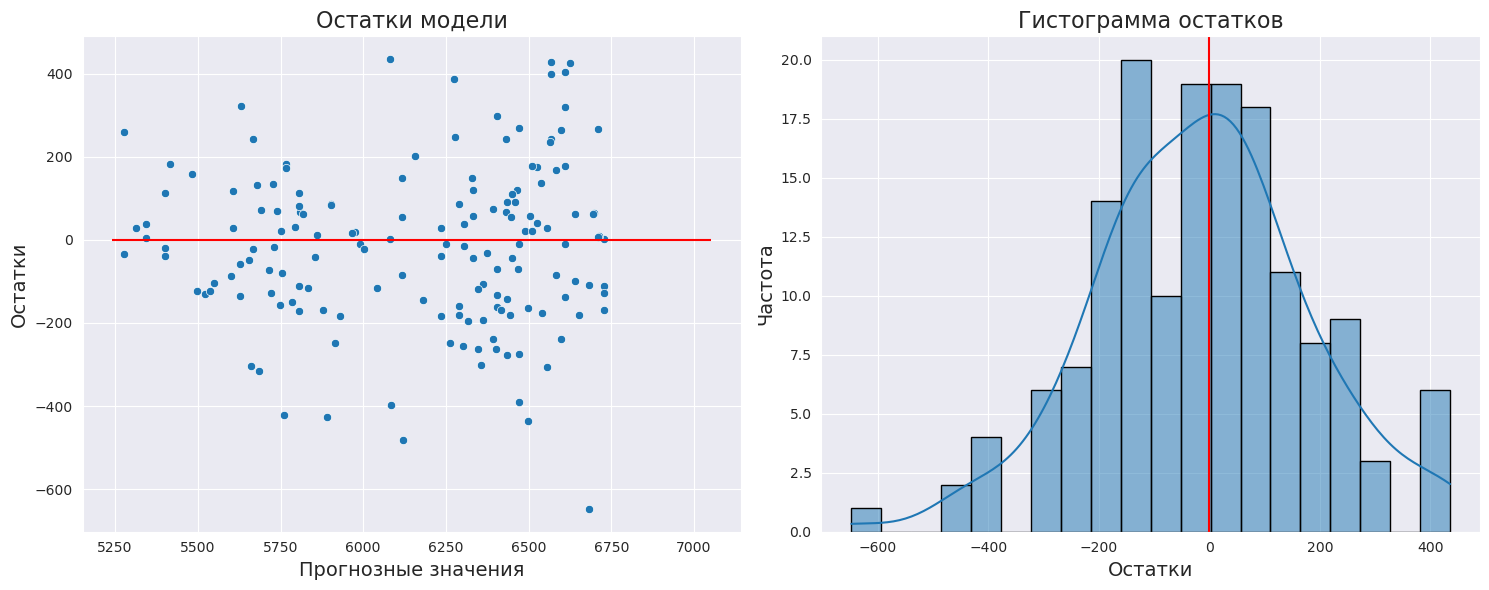

In [54]:
third_model, third_y_test, third_y_pred = make_linreg_model(farm_main_data_new, category_features=['over_2_years_old', 'sugar_protein_ratio_cat', 'dad_name'], num_features=['energy_feed_unit_squared'])

calc_quality_metrics(third_y_test, third_y_pred)

Третья модель линейной регрессии на датасете ferma_main.csv показала результат лучше, чем вторая:
- R^2 score: ~0.82
- MSE: ~36945
- MAE: ~149
- RMSE: ~192
- Остатки модели распределены равномерно относительно нуля, теперь и после 6000, что хорошо.
- Гистограмма остатков немного ухудшилась, так как слева появился один выброс, который показывает остаток -600. Также есть выбросы слева и справа на значениях -400 и 400. Скорее всего это связано с тем, что коров возрастом меньше двух лет гораздо меньше. Потому модель плохо предсказывает удой молока для коров младше двух лет. Нужно больше данных, чтобы уменьшить или исключить выбросы.

Укажу доверительный интервал прогноза лучшей модели. Для этого рассчитаю квантили ошибки модели на тренировочных данных.

In [55]:
def calc_prediction_interval(y_test, y_pred):
    residuals = y_test - y_pred
    quantiles = np.quantile(residuals, [0.025, 0.975])
    
    return quantiles

print(f"""Квантили первой модели: {calc_prediction_interval(first_y_test, first_y_pred)}
Квантили второй модели: {calc_prediction_interval(second_y_test, second_y_pred)}
Квантили третьей модели: {calc_prediction_interval(third_y_test, third_y_pred)}""")

Квантили первой модели: [-393.5100381   497.96192692]
Квантили второй модели: [-386.71224191  436.90760776]
Квантили третьей модели: [-421.04202954  399.00160418]


С помощью квантилей ошибки модели я могу понять, что ошибка модели с 95% вероятностью будет находиться в указанном диапазоне. Для этого я взял перцентили 0.025 и 0.975 - Байесовский доверительный интервал.

В нашем случае лучшие значение доверительного интервала те, где положительная ошибка будет меньше всего. Положительная ошибка означает, что модель переоценила удой молока. Если удой молока будет переоценен, то тогда фермер понесёт убытки, так как в запросе чётко указано, что надой должен быть не меньше 6000 кг. Поэтому лучше, чтобы модель недооценивала удой молока, чем переоценивала, так как упущенная прибыль лучше, чем убытки.

По таким критериям подходит третья модель линейной регрессии с доверительным интервалом от \~-421 до \~399

Если сравнивать модели между собой, то лучше всего себя показала третья модель линейной регрессии. Она показала лучшие результаты по метрикам качества (R^2, MSE, MAE и RMSE), ошибки данной модели распределены лучше всего, а также она имеет подходящий доверительный интервал прогноза. Поэтому я буду использовать именно эту модель для прогнозирования удоя молока коров.

Перед тем, как приступить к прогнозированию удоя молока коров "ЭкоФермы", я добавлю недостающие признаки в датасет cow_buy.csv, чтобы модель могла предсказывать удой молока для коров "ЭкоФермы".

In [56]:
energy_feed_unit_cow_buy = farm_main_data['energy_feed_unit'].mean() * 1.05
sugar_protein_ratio_cow_buy = farm_main_data['sugar_protein_ratio'].mean() * 1.05

cow_buy_data['energy_feed_unit'] = energy_feed_unit_cow_buy
cow_buy_data['sugar_protein_ratio'] = sugar_protein_ratio_cow_buy

cow_buy_data['sugar_protein_ratio_cat'] = pd.cut(cow_buy_data['sugar_protein_ratio'], bins=bins_sugar_protein_ratio, labels=labels_sugar_protein_ratio)
cow_buy_data['energy_feed_unit_squared'] = cow_buy_data['energy_feed_unit'] ** 2

Проверю, что признаки добавились успешно.

In [57]:
cow_buy_data.head()

cow_breed pasture_type dad_cow_breed  dad_name  fat_percentage  \
0    айдиал    холмистое        айдиал  геркулес            3.58   
1    айдиал    равнинное       соверин    буйный            3.54   
2   соверин    равнинное       соверин     барин            3.59   
3   соверин    холмистое        айдиал    буйный            3.40   
4   соверин    равнинное        айдиал    буйный            3.64   

   protein_percentage  over_2_years_old  energy_feed_unit  \
0               3.076              True         15.276162   
1               3.081             False         15.276162   
2               3.074              True         15.276162   
3               3.061              True         15.276162   
4               3.074              True         15.276162   

   sugar_protein_ratio sugar_protein_ratio_cat  energy_feed_unit_squared  
0             0.958744                    high                233.361138  
1             0.958744                    high                233.361138  
2             0.958744                    high                233.361138  
3             0.958744                    high                233.361138  
4             0.958744                    high                233.361138

Теперь прогнозирую удой молока для коров "ЭкоФермы" с помощью третьей модели линейной регрессии.

In [59]:
cow_buy_data['milk_yield_kg'] = third_model.predict(cow_buy_data[['over_2_years_old', 'sugar_protein_ratio_cat', 'dad_name', 'energy_feed_unit_squared']])
cow_buy_data.query('milk_yield_kg >= 6000')

cow_breed pasture_type dad_cow_breed  dad_name  fat_percentage  \
0     айдиал    холмистое        айдиал  геркулес            3.58   
1     айдиал    равнинное       соверин    буйный            3.54   
2    соверин    равнинное       соверин     барин            3.59   
3    соверин    холмистое        айдиал    буйный            3.40   
4    соверин    равнинное        айдиал    буйный            3.64   
5    соверин    равнинное       соверин  геркулес            3.63   
6     айдиал    холмистое        айдиал  геркулес            3.58   
7     айдиал    равнинное       соверин    буйный            3.57   
8    соверин    равнинное       соверин     барин            3.59   
9    соверин    холмистое        айдиал    буйный            3.40   
10    айдиал    холмистое       соверин  соловчик            3.73   
11   соверин    равнинное       соверин  геркулес            3.73   
12    айдиал    холмистое        айдиал  геркулес            3.68   
13    айдиал    холмистое       соверин     барин            3.42   
14   соверин    равнинное       соверин     барин            3.59   
15   соверин    холмистое        айдиал    буйный            3.40   
16    айдиал    холмистое       соверин  соловчик            3.73   
17   соверин    равнинное       соверин  геркулес            3.77   
18    айдиал    равнинное       соверин    буйный            3.34   
19   соверин    равнинное        айдиал    буйный            3.64   

    protein_percentage  over_2_years_old  energy_feed_unit  \
0                3.076              True         15.276162   
1                3.081             False         15.276162   
2                3.074              True         15.276162   
3                3.061              True         15.276162   
4                3.074              True         15.276162   
5                3.053             False         15.276162   
6                3.076              True         15.276162   
7                3.079              True         15.276162   
8                3.074              True         15.276162   
9                3.079             False         15.276162   
10               3.055              True         15.276162   
11               3.073              True         15.276162   
12               3.046              True         15.276162   
13               3.075             False         15.276162   
14               3.074              True         15.276162   
15               3.065              True         15.276162   
16               3.079              True         15.276162   
17               3.053             False         15.276162   
18               3.069              True         15.276162   
19               3.074              True         15.276162   

    sugar_protein_ratio sugar_protein_ratio_cat  energy_feed_unit_squared  \
0              0.958744                    high                233.361138   
1              0.958744                    high                233.361138   
2              0.958744                    high                233.361138   
3              0.958744                    high                233.361138   
4              0.958744                    high                233.361138   
5              0.958744                    high                233.361138   
6              0.958744                    high                233.361138   
7              0.958744                    high                233.361138   
8              0.958744                    high                233.361138   
9              0.958744                    high                233.361138   
10             0.958744                    high                233.361138   
11             0.958744                    high                233.361138   
12             0.958744                    high                233.361138   
13             0.958744                    high                233.361138   
14             0.958744                    high                233.361138   
15             0.9

По прогнозу модели линейной регрессии, удой молока не меньше 6000 кг у 10 из 20 коров "ЭкоФермы". Это значит, что фермеру стоит приобрести этих коров.
Далее я обучу модель логистической регрессии, чтобы предсказать вкус молока коровы из "ЭкоФермы" и сузить выбор коров для покупки.

## Обучение модели логистической регрессии

## Итоговые выводы

Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:
id — уникальный идентификатор коровы.
Удой, кг — масса молока, которую корова даёт в год (в килограммах).
ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
Сырой протеин, г — содержание сырого протеина в корме (в граммах).
СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
Порода — порода коровы.
Тип пастбища — ландшафт лугов, на которых паслась корова.
порода папы_быка — порода папы коровы.
Жирность,% — содержание жиров в молоке (в процентах).
Белок,% — содержание белков в молоке (в процентах).
Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Признаки в датасете ferma_main.csv можно разделить на группы.
Характеристики коровы: id, Порода, порода папы_быка, Возраст.
Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
Характеристика пастбища: Тип пастбища.
Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.
Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.

Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:
id — уникальный идентификатор коровы.
Имя Папы — имя папы коровы.
Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
Порода — порода коровы.
Тип пастбища — ландшафт лугов, на которых паслась корова.
порода папы_быка — порода папы коровы.
Имя_папы — имя папы коровы.
Текущая_жирность,% — содержание жиров в молоке (в процентах).
Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.
Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

Шаг 1. Загрузите и изучите данные

Изучите данные. Определите, соответствуют ли они описанию задачи и изученным в прошлых спринтах стандартам оформления данных. При необходимости переименуйте столбцы.

Шаг 2. Предобработка данных
Проверьте данные на наличие пропусков и дубликатов. Узнайте, корректны ли типы данных у каждого признака. При необходимости устраните все проблемы с данными.

Шаг 3. Исследовательский анализ данных
Проведите статистический анализ всех признаков.
Постройте графики для каждого признака. Помните, что количественным и категориальным признакам подходят разные графики.
Сделайте выводы о данных:
напишите, заметили ли вы выбросы, необычное распределение количественных признаков или другие особенности;
расскажите, как вы планируете улучшить данные.

Шаг 4. Проведите корреляционный анализ признаков в датасете ferma_main.csv
Изучите взаимосвязь между признаками: рассчитайте коэффициенты корреляции между всеми признаками.
Постройте диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков. Пример: диаграмма рассеяния для Удой, кг и Сырой протеин, г, цвет точек диаграммы отображает признак Порода. Учитывайте, что виды связи в подгруппах могут различаться — например, для разных пород.
Сделайте выводы о взаимосвязи признаков.
Какой тип взаимосвязи между целевым и входными признаками?
Есть ли нелинейные связи между целевым и входными признаками? Нужно ли вводить в модель дополнительные признаки, чтобы это учесть?
Наблюдается ли мультиколлинеарность между входными признаками?

Шаг 5. Задача регрессии
Вам предстоит обучить три модели простой линейной регрессии.
Подготовьте данные датасета ferma_main.csv и обучите на них первую модель LinearRegression.
Используйте в качестве целевого признак Удой, кг.
Отберите признаки, которые подходят для модели линейной регрессии, аргументируйте выбор. Опирайтесь не только на наличие или отсутствие линейной связи между признаками, но и на причинно-следственные связи между удоем коров и группами признаков из описания датасета.
Разбейте данные на тренировочную и тестовую выборки.
Кодируйте категориальные признаки с помощью OneHotEncoder.
Масштабируйте количественные признаки с помощью StandardScaler.
Обучите модель линейной регрессии на подготовленных данных.
Оцените качество модели на тестовой выборке: рассчитайте R², проанализируйте остатки с помощью графиков.
Оформите выводы, укажите:
значение R² модели;
какие выводы следуют из анализа остатков;
нужны ли дополнительные исследования.
Подготовьте данные с учётом связи входных признаков с целевым и обучите на них вторую модель LinearRegression.
Посмотрите на диаграммы рассеяния: на них можно увидеть, что некоторые входные признаки связаны с целевым нелинейно. Исключите нелинейность, чтобы эти признаки были информативны для линейной регрессии. Вот несколько способов, которыми это можно сделать:
Вы обнаружите, что СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуйте СПО в категориальный бинарный признак, использовав эту границу.
Вы обнаружите, что ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.
Повторите шаги из пункта 1 и создайте вторую модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.
Добавьте в данные новый признак и обучите на них третью модель LinearRegression.
Добавьте признак Имя Папы из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу.
Устраните нелинейность между признаками.
Повторите шаги из пункта 1 и создайте третью модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.
Сравните качество трёх моделей линейной регрессии, сопоставьте их R² и остатки.
Оцените качество каждой модели по трём метрикам: MSE, MAE, RMSE. Используйте функции для расчёта метрик.
Выберите лучшую модель;
Укажите доверительный интервал прогноза лучшей модели. Для этого рассчитайте квантили ошибки модели на тренировочных данных.
С помощью лучшей модели спрогнозируйте удой коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.
Добавьте недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): возьмите из датасета ferma_main.csv средние значения каждого из признаков и увеличьте их на 5%.
Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
Получите прогноз удоя коров.

Шаг 6. Задача классификации
Подготовьте данные датасета ferma_main.csv и обучите на них модель LogisticRegression.
Используйте в качестве целевого признак Вкус молока.
При необходимости преобразуйте имеющиеся или добавьте новые признаки.
Разбейте данные на тренировочную и тестовую выборки.
Кодируйте категориальные признаки с помощью OneHotEncoder.
Масштабируйте количественные признаки с помощью StandardScaler.
Обучите модель логистической регрессии на подготовленных данных.
Оцените качество модели на тестовой выборке: рассчитайте метрики accuracy, recall, precision.
Постройте матрицу ошибок.
Проанализируйте модель логистической регрессии.
Объясните, какая ошибка критичнее всего при покупке коров: первого или второго рода. Помните, что главное для заказчика — вкусное молоко. Сформулируйте ответ с учётом метрик recall и precision, выберите более важную из них.
Сведите критичную ошибку к нулю: для этого измените порог принадлежности к классам. Ещё раз рассчитайте значения метрик recall и precision. Какое значение порога вы выбрали? Как изменились значения метрик?
Оформите выводы: скажите, что нужно сделать дальше, исходя из анализа модели?
С помощью обученной модели спрогнозируйте вкус молока коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.
Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
Получите прогноз вкуса молока коров.

Шаг 7. Итоговые выводы

Добавьте прогнозы вкуса молока и удоя коров «ЭкоФермы» в датафрейм с коровами, покупку которых рассматривает фермер.
Отберите коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.
Коротко опишите результаты работы моделей для фермера.
Сколько коров он может купить из стада на продажу с минимальным риском для себя? Почему?
Какие ещё рекомендации можно ему дать?
Сделайте выводы о моделях линейной регрессии и логистической регрессии.
Какие способы улучшения качества регрессионной модели вы использовали в этой задаче?
Возможно ли ещё улучшить результаты регрессионной модели? Если можно, то как? Если нет, то почему?
Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов?